In [1]:
from google.colab import drive
drive.mount('/content/drive')                                                                                                                                                                                     

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
    process = psutil.Process(os.getpid())
    print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
    print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7410 sha256=dd61228714e00686a0435958d776bc9e6539eefb21774cb8a0654c1507c52877
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 26.4 GB  | Proc size: 155.9 MB
GPU RAM Free: 16280MB | Used: 0MB | Util   0% | Total 16280MB


In [3]:
!git clone --recursive https://github.com/Microsoft/LightGBM
%cd /content/LightGBM/
!mkdir build
!cmake -DUSE_GPU=1 #avoid ..
!make -j$(nproc)
!sudo apt-get -y install python-pip
!sudo -H pip install setuptools pandas numpy scipy scikit-learn -U
%cd ./python-package
!sudo python setup.py install --precompile

Cloning into 'LightGBM'...
remote: Enumerating objects: 15588, done.
remote: Total 15588 (delta 0), reused 0 (delta 0), pack-reused 15588
Receiving objects: 100% (15588/15588), 10.57 MiB | 30.48 MiB/s, done.
Resolving deltas: 100% (11290/11290), done.
Submodule 'include/boost/compute' (https://github.com/boostorg/compute) registered for path 'compute'
Cloning into '/content/LightGBM/compute'...
remote: Enumerating objects: 21728, done.        
remote: Total 21728 (delta 0), reused 0 (delta 0), pack-reused 21728        
Receiving objects: 100% (21728/21728), 8.51 MiB | 28.56 MiB/s, done.
Resolving deltas: 100% (17565/17565), done.
Submodule path 'compute': checked out '36c89134d4013b2e5e45bc55656a18bd6141995a'
/content/LightGBM
-- The C compiler identification is GNU 7.4.0
-- The CXX compiler identification is GNU 7.4.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - do

In [4]:
#%cp -rp '/content/drive/My Drive/ta-lib/' ~/
%cd ~
!rm -rf ta-lib*
#!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!wget https://sourceforge.net/projects/ta-lib/files/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
#%cd '/content/drive/My Drive/ta-lib'
#%cd ta-lib
import os
#os.chdir('/content/drive/My Drive/ta-lib') # Can't use !cd in co-lab
os.chdir('ta-lib') # Can't use !cd in co-lab
#%cd ~/ta-lib
!./configure --prefix=/usr
#! '/content/drive/My Drive/ta-lib/configure' --prefix=/usr
!make
!make install
!pip install Ta-Lib
%cd /content

/root
--2020-01-05 05:53:38--  https://sourceforge.net/projects/ta-lib/files/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving sourceforge.net (sourceforge.net)... 216.105.38.13
Connecting to sourceforge.net (sourceforge.net)|216.105.38.13|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://sourceforge.net/projects/ta-lib/files/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz/ [following]
--2020-01-05 05:53:38--  https://sourceforge.net/projects/ta-lib/files/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz/
Connecting to sourceforge.net (sourceforge.net)|216.105.38.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://sourceforge.net/projects/ta-lib/files/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz/download [following]
--2020-01-05 05:53:39--  https://sourceforge.net/projects/ta-lib/files/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz/download
Reusing existing connection to sourceforge.net:443.
HTTP request sent, awaiting response... 302 Found
Loc

In [5]:
!pip install optuna
!pip install joblib
!pip install catboost
!pip install six
!pip install bayesian-optimization
#!pip --no-cache-dir install lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/local/cuda/include/" --install-option="--opencl-library=/usr/local/cuda/lib64/libOpenCL.so"
#!pip install lightgbm --install-option=--GPU
#!sudo pip --no-cache-dir install -I lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/local/cuda/include/" --install-option="--opencl-library=/usr/local/cuda/lib64/libOpenCL.so"

import lightgbm as lgb
import xgboost as xgb
import catboost as cat
from catboost import Pool
from catboost import CatBoost
from sklearn import datasets
import dateutil
import copy
import sqlite3
from bayes_opt import BayesianOptimization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import pickle
import csv
import matplotlib.pyplot as plt
from scipy.spatial.distance import correlation
import numpy as np
import pandas as pd
#from multiprocessing import Pool, Value, Array
import multiprocessing as multi
from joblib import Parallel, delayed
import talib as ta
from datetime import datetime, timedelta, timezone
import sklearn.metrics
from sklearn.model_selection import train_test_split
from functools import partial
import optuna
import joblib
from joblib import Parallel, delayed
import time
import random

     |████████████████████████████████| 133kB 2.8MB/s 
     |████████████████████████████████| 1.1MB 45.3MB/s 
     |████████████████████████████████| 81kB 9.5MB/s 
     |████████████████████████████████| 471kB 46.1MB/s 
     |████████████████████████████████| 112kB 33.6MB/s 
     |████████████████████████████████| 112kB 51.4MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
  Created wheel for optuna: filename=optuna-0.19.0-cp36-none-any.whl size=170198 sha256=1a7841c9d99e185533c4ef6d6c14761a578afb33d6fccdc7f11ef19684cd37af
  Stored in directory: /root/.cache/pip/wheels/49/bf/47/090a43457caeff74397397da1c98a8aaed685257c16a5ba1f0
  Created wheel for alembic: filename=alembic-1.3.2-py2.py3-none-any.whl size=151128 sha256=5565e96c777ec6d225b8495772543648635b9257fbd26fb842922a8a7088b74a
  Stored in directory: /root/.cache/pip/wheels/5c/66/53/e0633382ac8625ab1c099db6a290d1b6b24f849a4666a57105
  Created wheel for Mako: filename=Mako-1.1.0-cp36-none-any.whl size=75363 sha256=9256569

In [0]:
class OneMinData:
    def initialize(self):
        self.func_dict = {}  # key = [func_name + term], val = (function object, term)
        self.index_data_dict = {}  # key= [func_name + term]], val = [index data]
        self.unix_time = []
        self.dt = []
        self.open = []
        self.high = []
        self.low = []
        self.close = []
        self.open_change = []
        self.high_change = []
        self.low_change = []
        self.close_change = []
        self.size = []
        self.future_side = []

    def cut_data(self, num_data):
        for k in self.index_data_dict:
            self.index_data_dict[k] = self.index_data_dict[k][-num_data:]
        self.unix_time = self.unix_time[-num_data:]
        self.dt = self.dt[-num_data:]
        self.open = self.open[-num_data:]
        self.high = self.high[-num_data:]
        self.low = self.low[-num_data:]
        self.close = self.close[-num_data:]
        self.open_change = self.open_change[-num_data:]
        self.high_change = self.high_change[-num_data:]
        self.low_change = self.low_change[-num_data:]
        self.close_change = self.close_change[-num_data:]
        self.size = self.size[-num_data:]
        #self.future_side = self.future_side[-num_data:] 多分future_sideはここでサイズ変えたらダメ

    def cut_data2(self, from_ind, to_ind):
        for k in self.index_data_dict:
            self.index_data_dict[k] = self.index_data_dict[k][from_ind:to_ind]
        self.unix_time = self.unix_time[from_ind:to_ind]
        self.dt = self.dt[from_ind:to_ind]
        self.open = self.open[from_ind:to_ind]
        self.high = self.high[from_ind:to_ind]
        self.low = self.low[from_ind:to_ind]
        self.close = self.close[from_ind:to_ind]
        self.open_change = self.open_change[from_ind:to_ind]
        self.high_change = self.high_change[from_ind:to_ind]
        self.low_change = self.low_change[from_ind:to_ind]
        self.close_change = self.close_change[from_ind:to_ind]
        self.size = self.size[from_ind:to_ind]
        self.future_side = self.future_side[from_ind:to_ind]

    def del_data(self, num_remain_data):
        if len(self.dt) > num_remain_data:
            for k in self.index_data_dict:
                del self.index_data_dict[k][:-num_remain_data]
            del self.unix_time[:-num_remain_data]
            del self.dt[:-num_remain_data]
            del self.open[:-num_remain_data]
            del self.high[:-num_remain_data]
            del self.low[:-num_remain_data]
            del self.close[:-num_remain_data]
            del self.open_change[:-num_remain_data]
            del self.high_change[:-num_remain_data]
            del self.low_change[:-num_remain_data]
            del self.close_change[:-num_remain_data]
            del self.size[:-num_remain_data]
            #del self.future_side[:-num_remain_data]

    def extract_data(self, ex_from, to):
        if len(self.dt) > ex_from:
            for k in self.index_data_dict:
                del self.index_data_dict[k][-ex_from:-to]
            del self.unix_time[-ex_from:-to]
            del self.dt[-ex_from:-to]
            del self.open[-ex_from:-to]
            del self.high[-ex_from:-to]
            del self.low[-ex_from:-to]
            del self.close[-ex_from:-to]
            del self.open_change[-ex_from:-to]
            del self.high_change[-ex_from:-to]
            del self.low_change[-ex_from:-to]
            del self.close_change[-ex_from:-to]
            del self.size[-ex_from:-to]
            #del self.future_side[-ex_from:-to]

    def add_and_pop(self, unix_time, dt, open, high, low, close, size):
        self.unix_time.append(unix_time)
        self.unix_time.pop(0)
        self.dt.append(dt)
        self.dt.pop(0)
        self.open.append(open)
        self.open.pop(0)
        self.high.append(high)
        self.high.pop(0)
        self.low.append(low)
        self.low.pop(0)
        self.close.append(close)
        self.close.pop(0)
        self.open_change.append(open)
        self.open_change.pop(0)
        self.high_change.append(high)
        self.high_change.pop(0)
        self.low_change.append(low)
        self.low_change.pop(0)
        self.close_change.append(close)
        self.close_change.pop(0)
        self.size.append(size)
        self.size.pop(0)

In [0]:
class OneMinMarketData:
    @classmethod
    def initialize_for_bot(cls, num_term, from_ind, to_ind, kijun_ratio, kijun_period, production_data_len):
        cls.num_term = num_term
        cls.kijun_ratio = kijun_ratio #0.001 - 0.1
        cls.kijun_period = kijun_period
        cls.term_list = cls.generate_term_list2(num_term)
        cls.ohlc = cls.read_from_csv('/content/drive/My Drive/mex_data.csv')
        if production_data_len == 0:
            print('normal cut data')
            cls.ohlc.cut_data2(from_ind, to_ind)
        else: #[-production_data_len:]のデータを使う。
            print('production use cut data')
            cls.ohlc.cut_data2(-production_data_len, -1)
        cls.__generate_all_func_dict()
        cls.__calc_all_index_dict()
        
    @classmethod
    def update_for_bot(cls):
        cls.__calc_all_index()
        

    @classmethod
    def read_from_csv(cls, file_name):
        ohlc = OneMinData()
        ohlc.initialize()
        df = pd.read_csv(file_name)
        ohlc.dt = list(map(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'), list(df['dt'])))
        ohlc.unix_time = list(df['timestamp'])
        ohlc.open = list(df['open'])
        ohlc.high = list(df['high'])
        ohlc.low = list(df['low'])
        ohlc.close = list(df['close'])
        ohlc.size = list(df['volume'])
        return ohlc
    
    
    @classmethod
    def write_all_func_dict(cls):
        with open('/content/drive/My Drive/Model/bpsp_cols.csv', 'w') as file:
            writer = csv.writer(file, lineterminator='\n')
            writer.writerow(list(cls.ohlc.func_dict.keys()))
        print('completed write bpsp columns')
        
        
    @classmethod
    def read_func_dict(cls):
        #read from func / term list
        cols = []
        with open('/content/drive/My Drive/Model/bpsp_cols.csv', 'r') as f:
            reader = csv.reader(f)
            for r in reader:
                cols.append(r)
        #copy matched key func val
        func_obj= {}
        for col in cols[0]:
            if col not in ['open', 'high', 'low', 'close']:
                func_obj[col] = cls.ohlc.func_dict[col]
        #replace ohlc.func_dict
        cls.ohlc.func_dict = func_obj
    
    
    
    '''
    generate all func / term as a dict
    calc all index as a dict
    generate df from the index data dict
    calc correlation
    remove correlated columns
    renew fund / term dict with non-correlated func / term
    calc index data of the renewed dict
    '''
    
    @classmethod
    def __generate_all_func_dict(cls):
        for term in cls.term_list:
            cls.ohlc.func_dict['ema:'+str(term)] = (OneMinMarketData.calc_ema,term)
            cls.ohlc.func_dict['ema_size:'+str(term)] = (OneMinMarketData.calc_ema_size,term)
            cls.ohlc.func_dict['ema_kairi:'+str(term)] = (OneMinMarketData.calc_ema_kairi,term)
            cls.ohlc.func_dict['ema_gra:'+str(term)] = (OneMinMarketData.calc_ema_gra,term)
            cls.ohlc.func_dict['dema:'+str(term)] = (OneMinMarketData.calc_dema,term)
            cls.ohlc.func_dict['dema_kairi:'+str(term)] = (OneMinMarketData.calc_dema_kairi,term)
            cls.ohlc.func_dict['dema_gra:'+str(term)] = (OneMinMarketData.calc_dema_gra,term)
            cls.ohlc.func_dict['momentum:'+str(term)] = (OneMinMarketData.calc_momentum,term)
            cls.ohlc.func_dict['momentum_size:'+str(term)] = (OneMinMarketData.calc_momentum_size,term)
            cls.ohlc.func_dict['rate_of_change:'+str(term)] = (OneMinMarketData.calc_rate_of_change,term)
            cls.ohlc.func_dict['rsi:'+str(term)] = (OneMinMarketData.calc_rsi,term)
            cls.ohlc.func_dict['williams_R:'+str(term)] = (OneMinMarketData.calc_williams_R,term)
            cls.ohlc.func_dict['beta:'+str(term)] = (OneMinMarketData.calc_beta,term)
            cls.ohlc.func_dict['time_series_forecast:'+str(term)] = (OneMinMarketData.calc_time_series_forecast,term)
            cls.ohlc.func_dict['correl:'+str(term)] = (OneMinMarketData.calc_correl,term)
            cls.ohlc.func_dict['linear_reg:'+str(term)] = (OneMinMarketData.calc_linear_reg,term)
            cls.ohlc.func_dict['linear_reg_angle:'+str(term)] = (OneMinMarketData.calc_linear_reg_angle,term)
            cls.ohlc.func_dict['linear_reg_intercept:'+str(term)] = (OneMinMarketData.calc_linear_reg_intercept,term)
            cls.ohlc.func_dict['linear_reg_slope:'+str(term)] = (OneMinMarketData.calc_linear_reg_slope,term)
            cls.ohlc.func_dict['stdv:'+str(term)] = (OneMinMarketData.calc_stdv,term)
            cls.ohlc.func_dict['stdv_size:'+str(term)] = (OneMinMarketData.calc_stdv_size,term)
            cls.ohlc.func_dict['var:'+str(term)] = (OneMinMarketData.calc_var,term)
            cls.ohlc.func_dict['adx:'+str(term)] = (OneMinMarketData.calc_adx,term)
            cls.ohlc.func_dict['aroon_os:'+str(term)] = (OneMinMarketData.calc_aroon_os,term)
            cls.ohlc.func_dict['cci:'+str(term)] = (OneMinMarketData.calc_cci,term)
            cls.ohlc.func_dict['dx:'+str(term)] = (OneMinMarketData.calc_dx,term)
            if term >= 10:
                cls.ohlc.func_dict['macd:'+str(term)] = (OneMinMarketData.calc_macd,term)
                cls.ohlc.func_dict['macd_signal:'+str(term)] = (OneMinMarketData.calc_macd_signal,term)
                cls.ohlc.func_dict['macd_hist:'+str(term)] = (OneMinMarketData.calc_macd_hist,term)
            if term <= 300:
                cls.ohlc.func_dict['calc_high_kairi:'+str(term)] = (OneMinMarketData.calc_high_kairi,term)
                cls.ohlc.func_dict['calc_low_kairi:'+str(term)] = (OneMinMarketData.calc_low_kairi,term)
                
            '''
            cls.ohlc.func_dict['makairi_momentum:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_momentum, term)
            cls.ohlc.func_dict['makairi_rate_of_change:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_rate_of_change, term)
            cls.ohlc.func_dict['makairi_rsi:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_rsi, term)
            cls.ohlc.func_dict['makairi_williams_R:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_williams_R, term)
            cls.ohlc.func_dict['makairi_beta:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_beta, term)
            cls.ohlc.func_dict['makairi_time_series_forecast:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_time_series_forecast, term)
            cls.ohlc.func_dict['makairi_correl:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_correl, term)
            cls.ohlc.func_dict['makairi_linear_reg:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_linear_reg, term)
            cls.ohlc.func_dict['makairi_linear_reg_angle:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_linear_reg_angle, term)
            cls.ohlc.func_dict['makairi_linear_reg_intercept:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_linear_reg_intercept, term)
            cls.ohlc.func_dict['makairi_linear_reg_slope:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_linear_reg_slope, term)
            cls.ohlc.func_dict['makairi_stdv:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_stdv, term)
            cls.ohlc.func_dict['makairi_var:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_var, term)
            cls.ohlc.func_dict['makairi_adx:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_adx, term)
            cls.ohlc.func_dict['makairi_aroon_os:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_aroon_os, term)
            cls.ohlc.func_dict['makairi_cci:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_cci, term)
            cls.ohlc.func_dict['makairi_dx:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_dx, term)
            
            cls.ohlc.func_dict['diff_momentum:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_momentum, term)
            cls.ohlc.func_dict['diff_rate_of_change:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_rate_of_change, term)
            cls.ohlc.func_dict['diff_rsi:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_rsi, term)
            cls.ohlc.func_dict['diff_williams_R:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_williams_R, term)
            cls.ohlc.func_dict['diff_beta:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_beta, term)
            cls.ohlc.func_dict['diff_time_series_forecast:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_time_series_forecast, term)
            cls.ohlc.func_dict['diff_correl:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_correl, term)
            cls.ohlc.func_dict['diff_linear_reg:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_linear_reg, term)
            cls.ohlc.func_dict['diff_linear_reg_angle:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_linear_reg_angle, term)
            cls.ohlc.func_dict['diff_linear_reg_intercept:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_linear_reg_intercept, term)
            cls.ohlc.func_dict['diff_linear_reg_slope:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_linear_reg_slope, term)
            cls.ohlc.func_dict['diff_stdv:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_stdv, term)
            cls.ohlc.func_dict['diff_var:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_var, term)
            cls.ohlc.func_dict['diff_adx:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_adx, term)
            cls.ohlc.func_dict['diff_aroon_os:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_aroon_os, term)
            cls.ohlc.func_dict['diff_cci:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_cci, term)
            cls.ohlc.func_dict['diff_dx:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_dx, term)
            '''

        cls.ohlc.func_dict['normalized_ave_true_range:'+str(0)] = (OneMinMarketData.calc_normalized_ave_true_range,0)
        cls.ohlc.func_dict['three_outside_updown:'+str(0)] = (OneMinMarketData.calc_three_outside_updown,0)
        cls.ohlc.func_dict['breakway:'+str(0)] = (OneMinMarketData.calc_breakway,0)
        cls.ohlc.func_dict['dark_cloud_cover:'+str(0)] = (OneMinMarketData.calc_dark_cloud_cover,0)
        cls.ohlc.func_dict['dragonfly_doji:'+str(0)] = (OneMinMarketData.calc_dragonfly_doji,0)
        cls.ohlc.func_dict['updown_sidebyside_white_lines:'+str(0)] = (OneMinMarketData.calc_updown_sidebyside_white_lines,0)
        cls.ohlc.func_dict['haramisen:'+str(0)] = (OneMinMarketData.calc_haramisen,0)
        cls.ohlc.func_dict['hikkake_pattern:'+str(0)] = (OneMinMarketData.calc_hikkake_pattern,0)
        cls.ohlc.func_dict['neck_pattern:'+str(0)] = (OneMinMarketData.calc_neck_pattern,0)
        cls.ohlc.func_dict['upsidedownside_gap_three_method:'+str(0)] = (OneMinMarketData.calc_upsidedownside_gap_three_method,0)
        cls.ohlc.func_dict['sar:'+str(0)] = (OneMinMarketData.calc_sar,0)
        cls.ohlc.func_dict['bop:'+str(0)] = (OneMinMarketData.calc_bop,0)
        cls.ohlc.func_dict['uwahige:'+str(0)] = (OneMinMarketData.calc_uwahige_length,0)
        cls.ohlc.func_dict['shitahige:'+str(0)] = (OneMinMarketData.calc_shitahige_length,0)
        
    
    '''

    '''
    @classmethod
    def __calc_all_index_dict(cls):
        print('calculating all index dict')
        start_time = time.time()
        for k in cls.ohlc.func_dict:
            if int(k.split(':')[1]) > 0:
                if k.split('_')[0] != 'makairi' and k.split('_')[0] != 'diff' and k.split(':')[0] not in ['ema_kairi', 'ema_gra', 'dema_kairi', 'dema_gra']:
                    cls.ohlc.index_data_dict[k] = cls.ohlc.func_dict[k][0](cls.ohlc.func_dict[k][1])
            else:
                cls.ohlc.index_data_dict[k] = cls.ohlc.func_dict[k][0]()
        print('completed non makairi diff index. time=', time.time() - start_time)

        start_time = time.time()
        for k in cls.ohlc.func_dict:
            if k.split('_')[0] == 'makairi':
                data = cls.ohlc.func_dict[k][1](cls.ohlc.func_dict[k][2])
                cls.ohlc.index_data_dict[k] = cls.ohlc.func_dict[k][0](data, cls.ohlc.func_dict[k][2])
            elif k.split('_')[0] == 'diff':
                data = cls.ohlc.func_dict[k][1](cls.ohlc.func_dict[k][2])
                cls.ohlc.index_data_dict[k] = cls.ohlc.func_dict[k][0](data)
            elif k.split(':')[0] in ['ema_kairi', 'ema_gra', 'dema_kairi', 'dema_gra']:
                cls.ohlc.index_data_dict[k] = cls.ohlc.func_dict[k][0](cls.ohlc.func_dict[k][1])

        cls.ohlc.future_side = cls.calc_future_side2()
        print('completed calc makairi diff index. time=', time.time() - start_time)

            
            
    @classmethod
    def genrate_df_from_dict(cls):
        start_time = time.time()
        cut_size = cls.term_list[-1] + 1
        end = len(cls.ohlc.close) - cls.kijun_period #to ajust to index size of future_side
        OneMinMarketData.ohlc.index_data_dict['dt'] = cls.ohlc.dt
        OneMinMarketData.ohlc.index_data_dict['size'] = cls.ohlc.size
        OneMinMarketData.ohlc.index_data_dict['close'] = cls.ohlc.close
        df = pd.DataFrame(OneMinMarketData.ohlc.index_data_dict)
        '''
        df = df.assign(dt=cls.ohlc.dt)
        df = df.assign(open=cls.ohlc.open)
        df = df.assign(high=cls.ohlc.high)
        df = df.assign(low=cls.ohlc.low)
        df = df.assign(close=cls.ohlc.close)
        df = df.assign(open_change=cls.ohlc.open_change)
        df = df.assign(high_change=cls.ohlc.high_change)
        df = df.assign(low_change=cls.ohlc.low_change)
        df = df.assign(close_change=cls.ohlc.close_change)
        df = df.assign(size=cls.ohlc.size)
        '''
        df = df.iloc[cut_size:end] 
        #df['future_side'] = cls.ohlc.future_side[cut_size:]
        df = df.assign(future_side=cls.ohlc.future_side[cut_size:])
        print('completed generate df from dict. time=', time.time() - start_time)
        return df


    @classmethod
    def remove_cols_contains_nan(cls,  df):
        start_time = time.time()
        remove_cols = []
        tmp = df.copy()
        for col in tmp.columns:
            for ind,d in enumerate(tmp[col]):
                if str(d) =='nan':
                    remove_cols.append(col)
                    break
        if len(remove_cols) > 0:
            df.drop(remove_cols, axis=1, inplace=True)
            print('removed ', len(remove_cols), ' cols contains nan.')
        print('completed remove cols contains nan. time=', time.time() - start_time)
        return df
        
    @classmethod
    def remove_cols_contains_nan2(cls, df):
        start_time = time.time()
        pre_n = len(df.columns)
        after_n = len(df.dropna(axis = 1, how = 'any').columns)
        print('removed ', pre_n - after_n, 'cols contains nan.')
        print('completed remove cols contains nan. time=', time.time() - start_time)
        return df.dropna(axis = 1, how = 'any')

    @classmethod
    def __calc_all_index(cls):
        start_time = time.time()
        cls.ohlc.ave_price = cls.calc_ave_price(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
        for term in cls.term_list:
            cls.ohlc.ema[term] = cls.calc_ema(term, cls.ohlc.close)
            cls.ohlc.ema_kairi[term] = cls.calc_ema_kairi(cls.ohlc.close, cls.ohlc.ema[term])
            cls.ohlc.ema_gra[term] = cls.calc_ema_gra(cls.ohlc.ema[term])
            cls.ohlc.dema[term] = cls.calc_dema(term, cls.ohlc.close)
            cls.ohlc.dema_kairi[term] = cls.calc_dema_kairi(cls.ohlc.close, cls.ohlc.dema[term])
            cls.ohlc.dema_gra[term] = cls.calc_dema_gra(cls.ohlc.dema[term])
            cls.ohlc.momentum[term] = cls.calc_momentum(term, cls.ohlc.close)
            cls.ohlc.rate_of_change[term] = cls.calc_rate_of_change(term, cls.ohlc.close)
            cls.ohlc.rsi[term] = cls.calc_rsi(term, cls.ohlc.close)
            cls.ohlc.williams_R[term] = cls.calc_williams_R(term, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
            cls.ohlc.beta[term] = cls.calc_beta(term, cls.ohlc.high, cls.ohlc.low)
            cls.ohlc.tsf[term] = cls.calc_time_series_forecast(term, cls.ohlc.close)
            cls.ohlc.correl[term] = cls.calc_correl(term, cls.ohlc.high, cls.ohlc.low)
            cls.ohlc.linear_reg[term] = cls.calc_linear_reg(term, cls.ohlc.close)
            cls.ohlc.linear_reg_angle[term] = cls.calc_linear_reg_angle(term, cls.ohlc.close)
            cls.ohlc.linear_reg_intercept[term] = cls.calc_linear_reg_intercept(term, cls.ohlc.close)
            cls.ohlc.linear_reg_slope[term] = cls.calc_linear_reg_slope(term, cls.ohlc.close)
            cls.ohlc.stdv[term] = cls.calc_stdv(term, cls.ohlc.close)
            cls.ohlc.var[term] = cls.calc_var(term, cls.ohlc.close)
            cls.ohlc.linear_reg_ave[term] = cls.calc_linear_reg(term, cls.ohlc.ave_price)
            cls.ohlc.linear_reg_angle_ave[term] = cls.calc_linear_reg_angle(term, cls.ohlc.ave_price)
            cls.ohlc.linear_reg_intercept_ave[term] = cls.calc_linear_reg_intercept(term, cls.ohlc.ave_price)
            cls.ohlc.linear_reg_slope_ave[term] = cls.calc_linear_reg_slope(term, cls.ohlc.ave_price)
            cls.ohlc.stdv_ave[term] = cls.calc_stdv(term, cls.ohlc.ave_price)
            cls.ohlc.var_ave[term] = cls.calc_var(term, cls.ohlc.ave_price)
            cls.ohlc.adx[term] = cls.calc_adx(term, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
            cls.ohlc.aroon_os[term] = cls.calc_aroon_os(term, cls.ohlc.high, cls.ohlc.low)
            cls.ohlc.cci[term] = cls.calc_cci(term, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
            cls.ohlc.dx[term] = cls.calc_dx(term, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
            if term >= 10:
                cls.ohlc.macd[term], cls.ohlc.macdsignal[term], cls.ohlc.macdhist[term] = cls.calc_macd(cls.ohlc.close, int(float(term) / 2.0), term, int(float(term) / 3.0))
                cls.ohlc.macd[term] = list(cls.ohlc.macd[term])
                cls.ohlc.macdsignal[term] = list(cls.ohlc.macdsignal[term])
                cls.ohlc.macdhist[term] = list(cls.ohlc.macdhist[term])
                cls.ohlc.macd_ave[term], cls.ohlc.macdsignal_ave[term], cls.ohlc.macdhist_ave[term] = cls.calc_macd(cls.ohlc.ave_price, int(float(term) / 2.0), term,int(float(term) / 3.0))
                cls.ohlc.macd_ave[term] = list(cls.ohlc.macd_ave[term])
                cls.ohlc.macdsignal_ave[term] = list(cls.ohlc.macdsignal_ave[term])
                cls.ohlc.macdhist_ave[term] = list(cls.ohlc.macdhist_ave[term])
        cls.ohlc.normalized_ave_true_range = cls.calc_normalized_ave_true_range(cls.ohlc.high, cls.ohlc.low,
                                                                                cls.ohlc.close)
        cls.ohlc.three_outside_updown = cls.calc_three_outside_updown(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low,
                                                                      cls.ohlc.close)
        cls.ohlc.breakway = cls.calc_breakway(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
        cls.ohlc.dark_cloud_cover = cls.calc_dark_cloud_cover(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low,
                                                              cls.ohlc.close)
        cls.ohlc.dragonfly_doji = cls.calc_dragonfly_doji(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
        cls.ohlc.updown_sidebyside_white_lines = cls.calc_updown_sidebyside_white_lines(cls.ohlc.open, cls.ohlc.high,
                                                                                        cls.ohlc.low, cls.ohlc.close)
        cls.ohlc.haramisen = cls.calc_haramisen(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
        cls.ohlc.hikkake_pattern = cls.calc_hikkake_pattern(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
        cls.ohlc.neck_pattern = cls.calc_neck_pattern(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
        cls.ohlc.upsidedownside_gap_three_method = cls.calc_upsidedownside_gap_three_method(cls.ohlc.open,
                                                                                            cls.ohlc.high, cls.ohlc.low,
                                                                                            cls.ohlc.close)
        cls.ohlc.sar = cls.calc_sar(cls.ohlc.high, cls.ohlc.low, 0.02, 0.2)
        cls.ohlc.bop = cls.calc_bop(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
        #cls.ohlc.bp, cls.ohlc.sp = cls.calc_pl_ls_points()

        #generate various index
        for term in cls.term_list:
            cls.ohlc.various_makairi['emakairi'+str(term)] = cls.ohlc.ema_kairi[term]
            cls.ohlc.various_makairi['demakairi' + str(term)] = cls.ohlc.dema_kairi[term]
            cls.ohlc.various_diff['emadiff'+str(term)] = cls.ohlc.ema_kairi[term]
            cls.ohlc.various_diff['demadiff' + str(term)] = cls.ohlc.dema_kairi[term]
            cls.ohlc.various_makairi['momkairi' + str(term)] = cls.ohlc.momentum[term]
            cls.ohlc.various_diff['momdiff' + str(term)] = cls.ohlc.momentum[term]
            cls.ohlc.various_makairi['rsikairi' + str(term)] = cls.ohlc.rsi[term]
            cls.ohlc.various_diff['rsidiff' + str(term)] = cls.ohlc.rsi[term]
            cls.ohlc.various_makairi['williams_Rkairi' + str(term)] = cls.ohlc.williams_R[term]
            cls.ohlc.various_diff['williams_Rdiff' + str(term)] = cls.ohlc.williams_R[term]
            cls.ohlc.various_makairi['betakairi' + str(term)] = cls.ohlc.beta[term]
            cls.ohlc.various_diff['betadiff' + str(term)] = cls.ohlc.beta[term]
            cls.ohlc.various_makairi['linear_regkairi' + str(term)] = cls.ohlc.linear_reg[term]
            cls.ohlc.various_diff['linear_regdiff' + str(term)] = cls.ohlc.linear_reg[term]
            cls.ohlc.various_makairi['linear_reg_slopekairi' + str(term)] = cls.ohlc.linear_reg_slope[term]
            cls.ohlc.various_diff['linear_reg_slopediff' + str(term)] = cls.ohlc.linear_reg_slope[term]
            cls.ohlc.various_makairi['adxkairi' + str(term)] = cls.ohlc.adx[term]
            cls.ohlc.various_diff['adxdiff' + str(term)] = cls.ohlc.adx[term]
            cls.ohlc.various_makairi['aroon_oskairi' + str(term)] = cls.ohlc.aroon_os[term]
            cls.ohlc.various_diff['aroon_osdiff' + str(term)] = cls.ohlc.aroon_os[term]
            cls.ohlc.various_makairi['ccikairi' + str(term)] = cls.ohlc.cci[term]
            cls.ohlc.various_diff['ccidiff' + str(term)] = cls.ohlc.cci[term]
            if term >= 10:
                cls.ohlc.various_makairi['macdkairi' + str(term)] = cls.ohlc.macd[term]
                cls.ohlc.various_diff['macddiff' + str(term)] = cls.ohlc.macd[term]
                cls.ohlc.various_makairi['macdsignalkairi' + str(term)] = cls.ohlc.macdsignal[term]
                cls.ohlc.various_diff['macdsignaldiff' + str(term)] = cls.ohlc.macdsignal[term]
                cls.ohlc.various_makairi['macdhistkairi' + str(term)] = cls.ohlc.macdhist[term]
                cls.ohlc.various_diff['macdhistdiff' + str(term)] = cls.ohlc.macdhist[term]
        cls.ohlc.future_side = cls.calc_future_side()
        print('calc all index1 time={}'.format(time.time() - start_time))


    @classmethod
    def generate_raw_df(cls):
        def __change_dict_key(d, col_name):
            newd = dict(map(lambda k: (col_name + str(k), d[k][:]), d.keys()))
            return newd
        '''data_dict = {'dt':cls.ohlc.dt[:], 'open':cls.ohlc.open[:], 'high':cls.ohlc.high[:],'low':cls.ohlc.low[:],
                    'close':cls.ohlc.close[:], 'size':cls.ohlc.size[:], 'normalized_ave_true_range':cls.ohlc.normalized_ave_true_range[:],
                    'sar':cls.ohlc.sar[:],'bop':cls.ohlc.bop[:]}'''
        data_dict = {'dt': cls.ohlc.dt[:], 'open': cls.ohlc.open[:], 'high': cls.ohlc.high[:], 'low': cls.ohlc.low[:],
                     'close': cls.ohlc.close[:], 'size': cls.ohlc.size[:],
                     'normalized_ave_true_range': cls.ohlc.normalized_ave_true_range[:],
                     'three_outside_updown': cls.ohlc.three_outside_updown[:], 'breakway': cls.ohlc.breakway[:],
                     'dark_cloud_cover': cls.ohlc.dark_cloud_cover[:],
                     'dragonfly_doji': cls.ohlc.dragonfly_doji[:],
                     'three_oupdown_sidebyside_white_linesutside_updown': cls.ohlc.updown_sidebyside_white_lines[:],
                     'haramisen': cls.ohlc.haramisen[:], 'haramhikkake_patternisen': cls.ohlc.hikkake_pattern[:],
                     'neck_pattern': cls.ohlc.neck_pattern[:],
                     'upsidedownside_gap_three_method': cls.ohlc.upsidedownside_gap_three_method[:],
                     'sar': cls.ohlc.sar[:], 'bop': cls.ohlc.bop[:]}
        data_dict = {**data_dict, **__change_dict_key(cls.ohlc.ema, 'ema'),
                     **__change_dict_key(cls.ohlc.ema_ave, 'ema_ave'),
                     **__change_dict_key(cls.ohlc.ema_kairi, 'ema_kairi'),
                     **__change_dict_key(cls.ohlc.dema_kairi, 'dema_kairi'),
                     **__change_dict_key(cls.ohlc.ema_gra, 'ema_gra'), **__change_dict_key(cls.ohlc.dema, 'dema'),
                     **__change_dict_key(cls.ohlc.dema_ave, 'dema_ave'),
                     **__change_dict_key(cls.ohlc.dema_gra, 'dema_gra'),
                     **__change_dict_key(cls.ohlc.midprice, 'midprice'),
                     **__change_dict_key(cls.ohlc.momentum, 'momentum'),
                     **__change_dict_key(cls.ohlc.momentum_ave, 'momentum_ave'),
                     **__change_dict_key(cls.ohlc.rate_of_change, 'rate_of_change'),
                     **__change_dict_key(cls.ohlc.rsi, 'rsi'), **__change_dict_key(cls.ohlc.williams_R, 'williams_R'),
                     **__change_dict_key(cls.ohlc.beta, 'beta'), **__change_dict_key(cls.ohlc.tsf, 'tsf'),
                     **__change_dict_key(cls.ohlc.correl, 'correl'),
                     **__change_dict_key(cls.ohlc.linear_reg, 'linear_reg'),
                     **__change_dict_key(cls.ohlc.linear_reg_angle, 'linear_reg_angle'),
                     **__change_dict_key(cls.ohlc.linear_reg_intercept, 'linear_reg_intercept'),
                     **__change_dict_key(cls.ohlc.linear_reg_slope, 'linear_reg_slope'),
                     **__change_dict_key(cls.ohlc.stdv, 'stdv'), **__change_dict_key(cls.ohlc.var, 'var'),
                     **__change_dict_key(cls.ohlc.linear_reg_ave, 'linear_reg_ave'),
                     **__change_dict_key(cls.ohlc.linear_reg_angle_ave, 'linear_reg_angle_ave'),
                     **__change_dict_key(cls.ohlc.linear_reg_intercept_ave, 'linear_reg_intercept_ave'),
                     **__change_dict_key(cls.ohlc.linear_reg_slope_ave, 'linear_reg_slope_ave'),
                     **__change_dict_key(cls.ohlc.stdv_ave, 'stdv_ave'),
                     **__change_dict_key(cls.ohlc.var_ave, 'var_ave'), **__change_dict_key(cls.ohlc.adx, 'adx'),
                     **__change_dict_key(cls.ohlc.aroon_os, 'aroon_os'),
                     **__change_dict_key(cls.ohlc.cci, 'cci'), **__change_dict_key(cls.ohlc.dx, 'dx'),
                     **__change_dict_key(cls.ohlc.macd, 'macd'),
                     **__change_dict_key(cls.ohlc.macdsignal, 'macdsignal'),
                     **__change_dict_key(cls.ohlc.macdhist, 'macdhist'),
                     **__change_dict_key(cls.ohlc.macd_ave, 'macd_ave'),
                     **__change_dict_key(cls.ohlc.macdsignal_ave, 'macdsignal_ave'),
                     **__change_dict_key(cls.ohlc.macdhist_ave, 'macdhist_ave'),
                     ** __change_dict_key(cls.ohlc.various_makairi, 'various_makairi'),
                     **__change_dict_key(cls.ohlc.various_diff, 'various_diff')}
        df = pd.DataFrame.from_dict(data_dict)
        return df

    '''
    dema, adx, macdはnum_term * 2くらいnanが発生する
    print(df.isnull().sum())
    '''

    @classmethod
    def generate_df(cls):
        def __change_dict_key(d, col_name):
            newd = dict(map(lambda k: (col_name + '_'+str(k), d[k][cut_size:end]), d.keys()))
            return newd

        start_time = time.time()
        cut_size = cls.term_list[-1] * 2
        end = len(cls.ohlc.close) - 10 #remove last 700min data as future bp / sp maybe not precise in
        data_dict = {'dt': cls.ohlc.dt[cut_size:end], 'open': cls.ohlc.open[cut_size:end],
                     'high': cls.ohlc.high[cut_size:end], 'low': cls.ohlc.low[cut_size:end],
                     'close': cls.ohlc.close[cut_size:end], 'size': cls.ohlc.size[cut_size:end],
                     'normalized_ave_true_range': cls.ohlc.normalized_ave_true_range[cut_size:end],
                     'three_outside_updown': cls.ohlc.three_outside_updown[cut_size:end],
                     'breakway': cls.ohlc.breakway[cut_size:end],
                     'dark_cloud_cover': cls.ohlc.dark_cloud_cover[cut_size:end],
                     'dragonfly_doji': cls.ohlc.dragonfly_doji[cut_size:end],
                     'three_oupdown_sidebyside_white_linesutside_updown': cls.ohlc.updown_sidebyside_white_lines[
                                                                          cut_size:end],
                     'haramisen': cls.ohlc.haramisen[cut_size:end],
                     'haramhikkake_patternisen': cls.ohlc.hikkake_pattern[cut_size:end],
                     'neck_pattern': cls.ohlc.neck_pattern[cut_size:end],
                     'upsidedownside_gap_three_method': cls.ohlc.upsidedownside_gap_three_method[cut_size:end],
                     'sar': cls.ohlc.sar[cut_size:end], 'bop': cls.ohlc.bop[cut_size:end]}
        data_dict = {**data_dict, **__change_dict_key(cls.ohlc.ema, 'ema'),
                     **__change_dict_key(cls.ohlc.ema_ave, 'ema_ave'),
                     **__change_dict_key(cls.ohlc.ema_kairi, 'ema_kairi'),
                     **__change_dict_key(cls.ohlc.dema_kairi, 'dema_kairi'),
                     **__change_dict_key(cls.ohlc.ema_gra, 'ema_gra'), **__change_dict_key(cls.ohlc.dema, 'dema'),
                     **__change_dict_key(cls.ohlc.dema_ave, 'dema_ave'),
                     **__change_dict_key(cls.ohlc.dema_gra, 'dema_gra'),
                     **__change_dict_key(cls.ohlc.midprice, 'midprice'),
                     **__change_dict_key(cls.ohlc.momentum, 'momentum'),
                     **__change_dict_key(cls.ohlc.momentum_ave, 'momentum_ave'),
                     **__change_dict_key(cls.ohlc.rate_of_change, 'rate_of_change'),
                     **__change_dict_key(cls.ohlc.rsi, 'rsi'), **__change_dict_key(cls.ohlc.williams_R, 'williams_R'),
                     **__change_dict_key(cls.ohlc.beta, 'beta'), **__change_dict_key(cls.ohlc.tsf, 'tsf'),
                     **__change_dict_key(cls.ohlc.correl, 'correl'),
                     **__change_dict_key(cls.ohlc.linear_reg, 'linear_reg'),
                     **__change_dict_key(cls.ohlc.linear_reg_angle, 'linear_reg_angle'),
                     **__change_dict_key(cls.ohlc.linear_reg_intercept, 'linear_reg_intercept'),
                     **__change_dict_key(cls.ohlc.linear_reg_slope, 'linear_reg_slope'),
                     **__change_dict_key(cls.ohlc.stdv, 'stdv'), **__change_dict_key(cls.ohlc.var, 'var'),
                     **__change_dict_key(cls.ohlc.linear_reg_ave, 'linear_reg_ave'),
                     **__change_dict_key(cls.ohlc.linear_reg_angle_ave, 'linear_reg_angle_ave'),
                     **__change_dict_key(cls.ohlc.linear_reg_intercept_ave, 'linear_reg_intercept_ave'),
                     **__change_dict_key(cls.ohlc.linear_reg_slope_ave, 'linear_reg_slope_ave'),
                     **__change_dict_key(cls.ohlc.stdv_ave, 'stdv_ave'),
                     **__change_dict_key(cls.ohlc.var_ave, 'var_ave'), **__change_dict_key(cls.ohlc.adx, 'adx'),
                     **__change_dict_key(cls.ohlc.aroon_os, 'aroon_os'),
                     **__change_dict_key(cls.ohlc.cci, 'cci'), **__change_dict_key(cls.ohlc.dx, 'dx'),
                     **__change_dict_key(cls.ohlc.macd, 'macd'),
                     **__change_dict_key(cls.ohlc.macdsignal, 'macdsignal'),
                     **__change_dict_key(cls.ohlc.macdhist, 'macdhist'),
                     **__change_dict_key(cls.ohlc.macd_ave, 'macd_ave'),
                     **__change_dict_key(cls.ohlc.macdsignal_ave, 'macdsignal_ave'),
                     **__change_dict_key(cls.ohlc.macdhist_ave, 'macdhist_ave'),
                     **__change_dict_key(cls.ohlc.various_makairi, 'various_makairi'),
                     **__change_dict_key(cls.ohlc.various_diff, 'various_diff')}
        data_dict['bpsp'] = cls.ohlc.bpsp[cut_size:end]
#        data_dict['bp'] = cls.ohlc.bp[cut_size:end]
#        data_dict['sp'] = cls.ohlc.sp[cut_size:end]
        df = pd.DataFrame.from_dict(data_dict)
        return df

    @classmethod
    def generate_term_list(cls, num):
        term_list = []
        category_n = [5, 50, 200]
        term_list.extend(list(np.round(np.linspace(category_n[0], category_n[0] * num, num))))
        term_list.extend(list(np.round(np.linspace(category_n[1] + (category_n[0] * num),category_n[1] + (category_n[0] * num) + category_n[1] * num), num)))
        term_list.extend(list(np.round(np.linspace(category_n[2] + category_n[1] + (category_n[0] * num) + (category_n[1] * num),category_n[2] + (category_n[1] * num) + category_n[2] * num), num)))
        return list(map(int, term_list))

    @classmethod
    def generate_term_list2(cls, max_term):
        term_list = []
        term_list = list(np.linspace(10, max_term, num=int(round((max_term-10)/20))))
        return list(map(int, term_list))

    @classmethod
    def detect_max_term(cls):
        max_term = 0
        cols = []
        with open("./Model/bpsp_cols.csv", "r") as f:
            reader = csv.reader(f)
            for r in reader:
                cols.append(r)
        for col in cols[0]:
            if col not in ['open', 'high', 'low', 'close']:
                if max_term < int(col.split(':')[1]):
                    max_term = int(col.split(':')[1])
        return max_term


    @classmethod
    def calc_ohlc_change(cls):
        cls.ohlc.open_change.append(0)
        cls.ohlc.high_change.append(0)
        cls.ohlc.low_change.append(0)
        cls.ohlc.close_change.append(0)
        for i in range(len(cls.ohlc.close)-1):
            close = cls.ohlc.close[i]
            cls.ohlc.open_change.append(round(cls.ohlc.open[i+1] / close,5))
            cls.ohlc.high_change.append(round(cls.ohlc.high[i + 1] / close, 5))
            cls.ohlc.low_change.append(round(cls.ohlc.low[i + 1] / close, 5))
            cls.ohlc.close_change.append(round(cls.ohlc.close[i + 1] / close,5))


     #kairi of data
    @classmethod
    def generate_makairi(cls, data, ma_term):
        ma = np.array(list(ta.MA(np.array(data, dtype='f8'), timeperiod=ma_term)),dtype='f8')
        return list(map(lambda c, e: (c - e) / e, np.array(data, dtype='f8'), ma))

    @classmethod
    def generate_diff(cls, data):
        return list(ta.ROC(np.array(data, dtype='f8'), timeperiod=1))
        #return [0] + list(np.diff(np.array(data, dtype='f8')))
    
    

    @classmethod
    def calc_future_side2(cls):
        future_side = []
        num_buy = 0
        num_sell = 0
        num_no = 0
        num_both = 0
        for i in range(len(cls.ohlc.close) - cls.kijun_period):
            buy_max = 0
            sell_max = 0
            entry_p = cls.ohlc.close[i]
            kijun_price = cls.ohlc.close[i] * cls.kijun_ratio
            for j in range(cls.kijun_period):
                buy_max = max(buy_max, cls.ohlc.close[i+j] - entry_p)
                sell_max = max(sell_max, entry_p - cls.ohlc.close[i+j])
            if buy_max >= kijun_price and sell_max >= kijun_price:
                future_side.append('both')
                num_both += 1
            elif buy_max >= kijun_price and sell_max < kijun_price:
                future_side.append('buy')
                num_buy += 1
            elif buy_max < kijun_price and sell_max >= kijun_price:
                future_side.append('sell')
                num_sell += 1
            elif buy_max < kijun_price and sell_max < kijun_price:
                future_side.append('no')
                num_no += 1

        print('future_side allocation in Market Data:')
        tsum = float(len(future_side))
        print('no:', round(float(num_no) / tsum, 4), 'buy:', round(float(num_buy) / tsum, 4), 'sell:', round(float(num_sell) / tsum, 4), 'both:', round(float(num_both) / tsum, 4))
        return future_side



    @classmethod
    def remove_all_correlated_cols(cls, df, corr_kijun):
        def remove_high_corr_cols(df, col_name, kijun):
            remove_cols = []
            num_corr = 0
            for i in range(len(df.columns) - 1):
                if df.columns[i] != col_name and df.columns[i] != 'dt':
                    corr = df[col_name].corr(df[df.columns[i]])
                    if corr > kijun and df.columns[i] not in ['open', 'high', 'low', 'close', 'size', 'future_side']:
                        num_corr += 1
                        remove_cols.append(df.columns[i])
            if len(remove_cols) > 0:
                df.drop(remove_cols, axis = 1, inplace = True)
                print('removed '+str(num_corr) + 'cols', ' total cols='+str(len(df.columns)))
            print('completed remove all correlated cols. time=', time.time() - start_time)
            return df

        nt= 0
        df2 = df.copy()
        while True:
            if len(df2.columns) <= nt:
                print('kita')
                break
            elif df2.columns[nt] != 'dt':
                df2 = remove_high_corr_cols(df2, df2.columns[nt], corr_kijun)
            nt += 1
        return df2

    
    @classmethod
    def remove_all_correlated_cols2(self, df, corr_kijun):
        print('removing all correlated columns..')
        df2 = df.copy()
        df3 = df.copy()
        df2.drop(['dt'], axis=1, inplace=True)
        #corrs = np.corrcoef(np.array(df2).transpose())
        corrs = np.corrcoef(np.array(df2))
        remove_cols = []
        cols = list(df2.columns)
        for cor in corrs:
            for i in range(len(cor)):
                if cor[i] != 1.0 and cor[i] > corr_kijun:
                    if cols[i] not in remove_cols and cols[i] not in ['open', 'high', 'low', 'close', 'size', 'future_side']:
                        remove_cols.append(cols[i])
        df3.drop(remove_cols, axis=1, inplace=True)
        print('removed '+str(len(remove_cols))+' colums')
        print(remove_cols)
        return df3, corrs
    
    @classmethod
    def remove_all_correlated_cols3(self, df, corr_kijun):
        print('removing all correlated columns..')
        start_time = time.time()
        df2 = df.copy()
        df3 = df.copy()
        df2.drop(['dt','future_side'], axis=1, inplace=True)
        corrs = np.corrcoef(np.array(df2).transpose())

        # 1. 0番目から0.9以上のindexを検索
        def check_corr_kijun(cor, cor_ind, kijun):
            rem = []
            for i, c in enumerate(cor):
                if c >= kijun and i != cor_ind:
                    rem.append(i)
            return rem

        tmp_remo = []
        for i, cor in enumerate(corrs):
            if i not in tmp_remo:  # 3. 該当indexを除いて次のindexを対象に1の操作を実行
                # 2. 該当したindexをtmp_remoに記録
                tmp_remo.extend(check_corr_kijun(cor, i, corr_kijun))
        
        cols = list(df2.columns)
        for col in cols:
            cor = 1 - correlation(df2['close'], df2[col])
            if cor >= corr_kijun:
                tmp_remo.extend(col)

        # 4. tmp_remoに記録されたindexのcolumnをdfから削除
        target_col = []
        cols = list(df2.columns)
        for tr in tmp_remo:
            target_col.append(cols[tr])
        excludes = ['dt', 'open', 'high', 'low', 'close', 'close_change', 'dt', 'future_side']
        for ex in excludes:
            if ex in target_col:
                target_col.remove(ex)
        df3.drop(target_col, axis=1, inplace=True)
        print('removed ' + str(len(target_col)) + ' colums', 'remaining col=' + str(len(df3.columns)))
        print('completed remove all correlated cols3. time=', time.time() - start_time)
        return df3, corrs
                    

    @classmethod
    def remove_all_correlated_cols4(cls, df, corr_kijun):
        print('removing all correlated columns..')
        start_time = time.time()
        dff = df.copy()
        dff.drop(['dt','future_side'], axis=1, inplace=True)
        cols = list(dff.columns)
        df_res = df.copy()
        corr_matrix = np.corrcoef(np.array(dff).transpose())
        df_new = pd.DataFrame(data=corr_matrix, index=cols, columns=cols, dtype='float')
        upper = df_new.where(np.triu(np.ones(df_new.shape), k=1).astype(np.bool))
        to_drop = [column for column in upper.columns if any(upper[column] > corr_kijun)]
        excludes = ['dt', 'open', 'high', 'low', 'close', 'close_change', 'future_side', 'size']
        for ex in excludes:
            if ex in to_drop:
                to_drop.remove(ex)
        df_res.drop(to_drop, axis=1, inplace=True)
        print('removed ' + str(len(to_drop)) + ' colums', 'remaining col=' + str(len(df_res.columns)))
        print('completed remove all correlated cols4. time=', time.time() - start_time)
        return df_res


    @classmethod
    def remove_price_dependent_cols(cls, df):
        print('removing all price dependent columns..')
        max_ind = np.array(list(df['close'])).argmax()
        min_ind = np.array(list(df['close'])).argmin()
        cols = list(df.columns)
        target_cols = []
        for col in cols:
            if abs(np.array(df[col]).argmax() - max_ind) <= 10 and abs(np.array(df[col]).argmin() - min_ind) <= 10:
                target_cols.append(col)
        excludes = ['dt', 'open', 'high', 'low', 'close', 'close_change', 'future_side']
        for ex in excludes:
            if ex in target_cols:
                target_cols.remove(ex)
        df.drop(target_cols, axis=1, inplace=True)
        print('removed ' + str(len(target_cols)) + ' colums', 'remaining col=' + str(len(df.columns)))
        return df

    @classmethod
    def remove_price_dependent_cols2(cls, df, corr_kijun):
        print('removing all price dependent columns..')
        dff = df.copy()
        df_res = df.copy()
        dff.drop(['dt','future_side'], axis=1, inplace=True)
        cols = list(dff.columns)
        to_drop = []
        for col in cols:
            corr = np.corrcoef(dff['close'], dff[col], rowvar=False)[1][0]
            if corr > corr_kijun:
                to_drop.append(col)
        excludes = ['dt', 'open', 'high', 'low', 'close', 'future_side', 'size']
        for ex in excludes:
            if ex in to_drop:
                to_drop.remove(ex)
        df_res.drop(to_drop, axis=1, inplace=True)
        print('removed ' + str(len(to_drop)) + ' colums', 'remaining col=' + str(len(df.columns)))
        return df_res


    #5min, 15min, 1hの足でのヒゲにしたほうがいい
    @classmethod
    def calc_uwahige_length(cls):
        return list(map(lambda i: (cls.ohlc.high[i] - cls.ohlc.close[i])/ cls.ohlc.open[i] if cls.ohlc.close[i] > cls.ohlc.open[i] else (cls.ohlc.high[i] - cls.ohlc.open[i]) / cls.ohlc.open[i], range(0, len(cls.ohlc.close))))

    @classmethod
    def calc_5min_uwahige_length(cls):
        return list(map(lambda i: (cls.ohlc.high[i] - cls.ohlc.close[i])/ cls.ohlc.open[i] if cls.ohlc.close[i] > cls.ohlc.open[i] else (cls.ohlc.high[i] - cls.ohlc.open[i]) / cls.ohlc.open[i], range(0, len(cls.ohlc.close))))

    @classmethod
    def calc_shitahige_length(cls):
        return list(map(lambda i: (cls.ohlc.open[i] - cls.ohlc.low[i])/ cls.ohlc.open[i] if cls.ohlc.close[i] > cls.ohlc.open[i] else (cls.ohlc.close[i] - cls.ohlc.low[i]) / cls.ohlc.open[i], range(0, len(cls.ohlc.close))))

    @classmethod
    def calc_high_kairi(cls, term):
        max_list = []
        max_list = list(map(lambda i: max(cls.ohlc.high[i:i+term]), range(0, len(cls.ohlc.high)-term)))
        kairi = [0] * term
        kairi.extend(list(map(lambda i: max_list[i]/cls.ohlc.close[i+term], range(0,len(max_list)))))
        return kairi

    @classmethod
    def calc_low_kairi(cls, term):
        low_list = []
        low_list = list(map(lambda i: max(cls.ohlc.low[i:i+term]), range(0, len(cls.ohlc.low)-term)))
        kairi = [0] * term
        kairi.extend(list(map(lambda i: low_list[i]/cls.ohlc.close[i+term], range(0,len(low_list)))))
        return kairi


    @classmethod
    def calc_ema(cls, term):
        return list(ta.EMA(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_ema_size(cls, term):
        return list(ta.EMA(np.array(cls.ohlc.size, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_ema_kairi(cls, term):
        return list(map(lambda c, e: (c - e) / e, np.array(cls.ohlc.close, dtype='f8'), np.array(cls.ohlc.index_data_dict['ema:'+str(term)], dtype='f8')))

    @classmethod
    def calc_dema_kairi(cls, term):
        return list(map(lambda c, d: (c - d) / d, np.array(cls.ohlc.close, dtype='f8'), np.array(cls.ohlc.index_data_dict['dema:'+str(term)], dtype='f8')))

    @classmethod
    def calc_ema_gra(cls, term):
        return list(pd.Series(cls.ohlc.index_data_dict['ema:'+str(term)]).diff())

    @classmethod
    def calc_dema_gra(cls, term):
        return list(pd.Series(cls.ohlc.index_data_dict['dema:'+str(term)]).diff())

    @classmethod
    def calc_dema(cls, term):
        return list(ta.DEMA(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    #termの2倍くらいnanが続く
    @classmethod
    def calc_adx(cls, term):
        return list(
            ta.ADX(np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'), np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_aroon_os(cls, term):
        return list(ta.AROONOSC(np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_cci(cls, term):
        return list(
            ta.CCI(np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'), np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_dx(cls, term):
        return list(
            ta.DX(np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'), np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_midprice(cls, term, high, low):
        return list(ta.MIDPRICE(np.array(high, dtype='f8'), np.array(low, dtype='f8'), timeperiod=term))

    
    @classmethod
    def calc_macd(cls, term):
        slowperiod = term
        fastperiod= int(term / 2.0)
        signalperiod=int(term / 3.0)
        macd, signal, hist =  ta.MACD(np.array(cls.ohlc.close, dtype='f8'), np.array(fastperiod, dtype='i8'), np.array(slowperiod, dtype='i8'), np.array(signalperiod, dtype='i8'))
        return macd
    
    @classmethod
    def calc_macd_signal(cls, term):
        slowperiod = term
        fastperiod= int(term / 2.0)
        signalperiod=int(term / 3.0)
        macd, signal, hist =  ta.MACD(np.array(cls.ohlc.close, dtype='f8'), np.array(fastperiod, dtype='i8'), np.array(slowperiod, dtype='i8'),
                       np.array(signalperiod, dtype='i8'))
        return signal
    
    @classmethod
    def calc_macd_hist(cls, term):
        slowperiod = term
        fastperiod= int(term / 2.0)
        signalperiod=int(term / 3.0)
        macd, signal, hist = ta.MACD(np.array(cls.ohlc.close, dtype='f8'), np.array(fastperiod, dtype='i8'), np.array(slowperiod, dtype='i8'),
                       np.array(signalperiod, dtype='i8'))
        return hist

    @classmethod
    def calc_momentum(cls, term):
        return list(ta.MOM(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_momentum_size(cls, term):
        return list(ta.MOM(np.array(cls.ohlc.size, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_rate_of_change(cls, term):
        return list(ta.ROC(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))


    @classmethod
    def calc_rsi(cls, term):
        return list(ta.RSI(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_williams_R(cls, term):
        return list(ta.WILLR(np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'), np.array(cls.ohlc.close, dtype='f8'),timeperiod=term))

    @classmethod
    def calc_beta(cls, term):
        return list(ta.BETA(np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_time_series_forecast(cls, term):
        return list(ta.TSF(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_correl(cls, term):
        return list(ta.CORREL(np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_linear_reg(cls, term):
        return list(ta.LINEARREG(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_linear_reg_angle(cls, term):
        return list(ta.LINEARREG_ANGLE(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_linear_reg_intercept(cls, term):
        return list(ta.LINEARREG_SLOPE(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_linear_reg_slope(cls, term):
        return list(ta.LINEARREG_INTERCEPT(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_stdv(cls, term):
        return list(ta.STDDEV(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term, nbdev=1))

    @classmethod
    def calc_stdv_size(cls, term):
        return list(ta.STDDEV(np.array(cls.ohlc.size, dtype='f8'), timeperiod=term, nbdev=1))

    @classmethod
    def calc_var(cls, term):
        return list(ta.VAR(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term, nbdev=1))

    @classmethod
    def calc_normalized_ave_true_range(cls):
        return list(ta.NATR(np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'), np.array(cls.ohlc.close, dtype='f8')))

    @classmethod
    def calc_three_outside_updown(cls):
        return list(ta.CDL3OUTSIDE(np.array(cls.ohlc.open, dtype='f8'), np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'),
                                   np.array(cls.ohlc.close, dtype='f8')))

    @classmethod
    def calc_breakway(cls):
        return list(ta.CDLBREAKAWAY(np.array(cls.ohlc.open, dtype='f8'), np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'),
                                    np.array(cls.ohlc.close, dtype='f8')))

    @classmethod
    def calc_dark_cloud_cover(cls):
        return list(ta.CDLDARKCLOUDCOVER(np.array(cls.ohlc.open, dtype='f8'), np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'),
                                 np.array(cls.ohlc.close, dtype='f8'), penetration=0))

    @classmethod
    def calc_dragonfly_doji(cls):
        return list(ta.CDLDRAGONFLYDOJI(np.array(cls.ohlc.open, dtype='f8'), np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'),
                                np.array(cls.ohlc.close, dtype='f8')))

    @classmethod
    def calc_updown_sidebyside_white_lines(cls):
        return list(
            ta.CDLGAPSIDESIDEWHITE(np.array(cls.ohlc.open, dtype='f8'), np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'),
                                   np.array(cls.ohlc.close, dtype='f8')))

    @classmethod
    def calc_haramisen(cls):
        return list(ta.CDLHARAMI(np.array(cls.ohlc.open, dtype='f8'), np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'), np.array(cls.ohlc.close, dtype='f8')))

    @classmethod
    def calc_hikkake_pattern(cls):
        return list(ta.CDLHIKKAKEMOD(np.array(cls.ohlc.open, dtype='f8'), np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'),np.array(cls.ohlc.close, dtype='f8')))

    @classmethod
    def calc_neck_pattern(cls):
        return list(ta.CDLINNECK(np.array(cls.ohlc.open, dtype='f8'), np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'), np.array(cls.ohlc.close, dtype='f8')))

    @classmethod
    def calc_sar(cls):
        accelation = 0.02
        maximum = 0.2
        return list(ta.SAR(np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'), np.array(accelation, dtype='f8'), np.array(maximum, dtype='f8')))

    @classmethod
    def calc_bop(cls):
        return list(ta.BOP(np.array(cls.ohlc.open, dtype='f8'), np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'),np.array(cls.ohlc.close, dtype='f8')))

    @classmethod
    def calc_upsidedownside_gap_three_method(cls):
        return list(ta.CDLXSIDEGAP3METHODS(np.array(cls.ohlc.open, dtype='f8'), np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'),np.array(cls.ohlc.close, dtype='f8')))

    @classmethod
    def check_matched_index(cls, test_x):
        test = list(test_x['open'])
        op = cls.ohlc.open
        for i in range(len(op)):
            flg = True
            for j in range(30):
                if test[j] != op[i + j]:
                    flg = False
                    break
            if flg:
                return i
        print('no matche index found!')
        return -1


    @classmethod
    def check_matched_index_change(cls, test_x):
        test = list(test_x['close_change'])
        op = cls.ohlc.close_change
        for i in range(len(op)):
            flg = True
            for j in range(30):
                if test[j] != op[i + j]:
                    flg = False
                    break
            if flg:
                return i
        print('no matche index found!')
        return -1

    @classmethod
    def check_matched_dt(cls, test_x, df2):
        col = list(test_x.columns)[0]
        test_data = list(test_x[col].iloc[0:30])

        for ind,data in enumerate(df2[col]):
            if data == test_data[0]:
                if test_data == list(df2[col].iloc[ind:ind+30]):
                    return cls.ohlc.dt.index(df2['dt'].iloc[ind])
        print('matched index was not found')
        return -1

In [0]:
'''
send order with current ohlc (t)
executed with open price of (t+1), send order with ohlc(t+1)
executed with open price of (t+2), send order with ohlc(t+2)

・消す order idを記録しておいて、move to nextの最後で対象を全部消す。
・
'''


class SimAccount:
    def __init__(self):
        self.__initialize_order()
        self.__initialize_holding()

        self.log_data_list = []
        self.log_data_df = pd.DataFrame()

        self.base_margin_rate = 1.2
        self.leverage = 4.0
        self.slip_page = 0
        self.taker_fee = 0.00075
        self.maker_fee = -0.00025
        self.force_loss_cut_rate = 0.5
        self.initial_asset = 1500000
        self.order_cancel_delay = 1
        self.ls_penalty = 0

        self.pl_kijun = 0
        self.ls_kijun = 0

        self.total_pl = 0
        self.realized_pl = 0
        self.current_pl = 0
        self.total_fee = 0
        self.num_trade = 0
        self.num_sell = 0
        self.num_buy = 0
        self.num_win = 0
        self.win_rate = 0
        self.asset = self.initial_asset

        self.dt_log = []
        self.i_log = []
        self.order_log = []
        self.holding_log = []
        self.total_pl_log = []
        self.action_log = []
        self.price_log = []
        self.performance_total_pl_log = []
        self.performance_dt_log = []
        self.pl_stability = 0

        self.start_dt = ''
        self.end_dt = ''

    def __initialize_order(self):
        self.order_serial_num = 0
        self.order_serial_list = []
        self.order_serial = {}
        self.order_side ={}
        self.order_price = {}
        self.order_size = {}
        self.order_i = {}
        self.order_dt = {}
        self.order_ut = {}
        self.order_type = {}  # market / limit
        self.order_cancel = {} #True / False
        self.order_expire = {}

    def __del_order(self, target_serial):
        if target_serial in self.order_serial_list:
            self.order_serial_list.remove(target_serial)
            del self.order_serial[target_serial]
            del self.order_side[target_serial]
            del self.order_price[target_serial]
            del self.order_size[target_serial]
            del self.order_i[target_serial]
            del self.order_dt[target_serial]
            del self.order_ut[target_serial]
            del self.order_type[target_serial]  # market / limit
            del self.order_cancel[target_serial] #True / False
            del self.order_expire[target_serial]

    def __initialize_holding(self):
        self.holding_side = ''
        self.holding_price = 0
        self.holding_size = 0
        self.holding_i = 0
        self.holding_dt = ''
        self.holding_ut = 0


    def check_executions(self, i, dt, openp, high, low):
        #self.__check_loss_cut(i, dt, high, low)
        self.__check_execution(i, dt, openp, high, low)
        self.__check_cancel(i, dt)
        self.__check_pl(i, dt, high, low)
        self.__check_ls(i, dt, high, low)

    def move_to_next(self, i, dt, openp, high, low, close):
        if len(str(self.start_dt)) < 3:
            self.start_dt = dt
        if self.holding_side != '':
            self.current_pl = (close - self.holding_price) * self.holding_size if self.holding_side == 'buy' else (self.holding_price - close) * self.holding_size
        else:
            self.current_pl = 0
        self.total_pl = self.realized_pl + self.current_pl - self.total_fee
        if self.num_trade > 0:
            self.win_rate = round(float(self.num_win) / float(self.num_trade), 4)
        self.performance_total_pl_log.append(self.total_pl)
        self.performance_dt_log.append(dt)
        self.asset = self.initial_asset + self.total_pl
        self.price_log.append(close)
        self.__add_log('i:'+str(i)+' Move to next', i, dt)

    def last_day_operation(self, i, dt, openp, high, low, close):
        #self.__check_loss_cut(i, dt, high, low)
        self.__check_execution(i, dt, openp, high, low)
        self.__check_cancel(i, dt)
        if self.holding_side != '':
            self.__calc_executed_pl(close, self.holding_size, i)
        self.total_pl = self.realized_pl + self.current_pl - self.total_fee
        self.total_pl_log.append(self.total_pl)
        self.performance_total_pl_log.append(self.total_pl)
        self.performance_dt_log.append(dt)
        if self.num_trade > 0:
            self.win_rate = round(float(self.num_win) / float(self.num_trade), 4)
        self.__add_log('Sim Finished.', i, dt)
        self.end_dt = dt
        self.__calc_pl_stability()
        self.log_data_df = pd.DataFrame.from_dict(self.log_data_list, orient='columns')

    def entry_order(self, side, price, size, type, expire, pl, ls, i, dt):
        if side == 'buy':
            self.num_buy += 1
        elif side == 'sell':
            self.num_sell += 1
        self.order_serial[self.order_serial_num] = self.order_serial_num
        self.order_side[self.order_serial_num] =side
        self.order_price[self.order_serial_num] = price
        self.order_size[self.order_serial_num] = size
        self.order_i[self.order_serial_num] = i
        self.order_dt[self.order_serial_num] = dt
        self.order_ut[self.order_serial_num] = 0
        self.order_type[self.order_serial_num] = type  # limit, market
        self.order_cancel[self.order_serial_num] = False
        self.order_expire[self.order_serial_num] = expire
        self.pl_kijun = pl
        self.ls_kijun = ls
        self.order_serial_list.append(self.order_serial_num)
        self.order_serial_num += 1
        self.__add_log('entry order' + side + ' type=' + type, i, dt)

    def __calc_fee(self, size, price, maker_taker):
        if maker_taker == 'maker':
            self.total_fee += size * price * self.maker_fee
        elif maker_taker == 'taker':
            self.total_fee += size * price * self.taker_fee
        else:
            print('invalid maker_taker flg!')

    def __update_holding(self, side, price, size, pl, ls, i, dt):
        self.holding_side = side
        self.holding_price = price
        self.holding_size = size
        self.holding_i = i
        self.holding_dt = dt
        self.pl_kijun = pl
        self.ls_kijun = ls

    #always cancel latest order
    def cancel_order(self, i, dt):
        num = self.order_serial_list[-1]
        if self.order_type[num] != 'losscut' and self.order_cancel[num] == False:
            self.order_cancel[num] = True
            self.order_i[num] = i

    def __check_cancel(self, i, dt):
        ks = copy.copy(list(self.order_cancel.keys()))
        for k in ks:
            if self.order_cancel[k]:
                self.__del_order(k)
                self.__add_log('order cancelled.', i, dt)

    def __check_expiration(self, i, dt):
        ks = list(self.order_i.keys())
        for k in ks:
            if k in self.order_type[k]:
                if i - self.order_i[k] >= self.order_expire[k] and self.order_type[k] == 'limit':
                    self.__del_order(k)
                    self.__add_log('order expired.', i, dt)

    '''
    直前のpredictionが反対出なければpl判定させずにholdした方が効率的
    '''
    def __check_pl(self, i, dt, high, low):
        if self.holding_side != '' and self.pl_kijun > 0:
            if self.holding_side == 'buy' and self.holding_price + self.pl_kijun <= high:
                self.__add_log('pl executed.', i, dt)
                self.__calc_fee(self.holding_size, self.holding_price + self.pl_kijun, 'maker')
                self.__calc_executed_pl(self.holding_price + self.pl_kijun, self.holding_size, i)
                self.__initialize_holding()
                # self.__update_holding(self.holding_side, self.holding_price + self.pl_kijun + 100, self.holding_size, self.pl_kijun, self.ls_kijun, True, i, dt, ut)
            if self.holding_side == 'sell' and self.holding_price - self.pl_kijun >= low:
                self.__add_log('pl executed.', i, dt)
                self.__calc_fee(self.holding_size, self.holding_price + self.pl_kijun, 'maker')
                self.__calc_executed_pl(self.holding_price - self.pl_kijun, self.holding_size, i)
                self.__initialize_holding()
                # self.__update_holding(self.holding_side, self.holding_price - self.pl_kijun - 100, self.holding_size, self.pl_kijun, self.ls_kijun, True, i, dt, ut)

    def __check_ls(self, i, dt, high, low):
        if self.holding_side != '' and self.ls_kijun > 0:
            if self.holding_side == 'buy' and low - self.holding_price<= -self.ls_kijun:
                self.__add_log('ls executed.', i, dt)
                self.__calc_fee(self.holding_size, self.holding_price + self.pl_kijun, 'taker')
                self.__calc_executed_pl(self.holding_price - self.ls_kijun, self.holding_size, i)
                self.__initialize_holding()
            if self.holding_side == 'sell' and self.holding_price - high <= -self.ls_kijun:
                self.__add_log('ls executed.', i, dt)
                self.__calc_fee(self.holding_size, self.holding_price + self.pl_kijun, 'taker')
                self.__calc_executed_pl(self.holding_price + self.ls_kijun, self.holding_size, i)
                self.__initialize_holding()

    def __check_execution(self, i, dt, openp, high, low):
        ks = list(self.order_i.keys())
        for k in ks:
            if k in self.order_side:
                if self.order_side[k] != '' and self.order_i[k] < i:
                    if self.order_type[k] == 'market':
                        self.__process_execution(openp, self.order_type[k], i, dt, k)
                        self.__del_order(k)
                    elif self.order_type[k] == 'limit' and ((self.order_side[k] == 'buy' and self.order_price[k] >= low) or (self.order_side[k] == 'sell' and self.order_price[k] <= high)):
                        self.__process_execution(self.order_price[k], self.order_type[k], i, dt, k)
                        self.__del_order(k)
                    elif self.order_type[k] == 'losscut':
                        self.__process_execution(high if self.order_side[k] == 'sell' else 'low', self.order_type[k], i, dt, k)
                        self.__del_order(k)
                    elif self.order_type[k] != 'market' and self.order_type[k] != 'limit' and self.order_type[k] != 'losscut':
                        print('Invalid order type!' + self.order_type[k])
                        self.__add_log('invalid order type!' + self.order_type[k], i, dt)

    def __process_execution(self, exec_price, order_type, i, dt, k):
        if self.order_side[k] != '':
            if type != 'losscut':
                self.__calc_fee(self.order_size[k], exec_price, 'maker' if order_type == 'limit' else 'taker')
            else:
                self.__calc_fee(self.order_size[k], exec_price, 'taker')
            if self.holding_side == '':  # no position
                self.__update_holding(self.order_side[k], exec_price, self.order_size[k], self.pl_kijun, self.ls_kijun, i, dt)
                self.__add_log('New Entry:' + self.order_type[k], i, dt)
            else:
                if self.holding_side == self.order_side[k]:  # order side and position side is matched
                    ave_price = round(((self.holding_price * self.holding_size) + (exec_price * self.order_size[k])) / (self.order_size[k] + self.holding_size))  # averaged holding price
                    self.__update_holding(self.holding_side, ave_price, self.order_size[k] + self.holding_size, self.pl_kijun, self.ls_kijun, i, dt)
                    self.__add_log('Additional Entry:' + self.order_type[k], i, dt)
                elif self.holding_size > self.order_size[k]:  # side is not matched and holding size > order size
                    self.__calc_executed_pl(exec_price, self.order_size[k], i)
                    self.__update_holding(self.holding_side, self.holding_price, self.holding_size - self.order_size[k], self.pl_kijun, self.ls_kijun, i, dt)
                    self.__add_log('Exit Order (h>o):' + self.order_type[k], i, dt)
                elif self.holding_size == self.order_size[k]:
                    self.__add_log('Exit Order (h=o):' + self.order_type[k], i, dt)
                    self.__calc_executed_pl(exec_price, self.order_size[k], i)
                    self.__initialize_holding()
                else:  # in case order size is bigger than holding size
                    self.__calc_executed_pl(exec_price, self.holding_size, i)
                    self.__add_log('Exit & Entry Order (h<o):' + self.holding_side, i, dt)
                    self.__update_holding(self.order_side[k], exec_price, self.order_size[k] - self.holding_size, self.pl_kijun, self.ls_kijun, i, dt)

    def __calc_executed_pl(self, exec_price, size, i):  # assume all order size was executed
        #pl = (exec_price - self.holding_price * (self.fee + 1)) * size if self.holding_side == 'buy' else (self.holding_price * (1-self.fee) - exec_price) * size
        pl = (exec_price - self.holding_price) * size if self.holding_side == 'buy' else (self.holding_price - exec_price) * size
        self.realized_pl += round(pl,6)
        self.num_trade += 1
        if pl > 0:
            self.num_win += 1

    def __check_loss_cut(self, i, dt, high, low):
        if self.holding_side != '':
            price = high if self.holding_side == 'sell' else low
            req_collateral = self.holding_size * price / self.leverage
            pl = price - self.holding_price if self.holding_side == 'buy' else self.holding_price - price
            pl = pl * self.holding_size
            margin_rate = (self.initial_asset + self.realized_pl + pl) / req_collateral
            if margin_rate <= self.force_loss_cut_rate:
                self.__force_exit(i, dt)
                self.__add_log('Loss cut postion! margin_rate=' + str(margin_rate), i, dt)

    def __force_exit(self, i, dt):
        #self.__initialize_order()
        print('losscut!')
        #self.__process_execution(exec_price, order_type, i, dt, k):
        self.entry_order('buy' if self.holding_side == 'sell' else 'sell', 0, self.holding_size, 'losscut', 10, 9999, 9999, i, dt)
        
    def __calc_pl_stability(self):
        m = np.mean(np.diff(self.performance_total_pl_log))
        self.pl_stability = round(sum(map(lambda x: pow(m-x,2), np.diff(self.performance_total_pl_log))), 4)

    def __add_log(self, log, i, dt):
        self.total_pl_log.append(self.total_pl)
        self.action_log.append(log)
        self.holding_log.append(self.holding_side + ' @' + str(self.holding_price) + ' x' + str(self.holding_size))
        if len(self.order_i) > 0:
            k = self.order_serial_list[-1]
            self.order_log.append(self.order_side[k] + ' @' + str(self.order_price[k]) + ' x' + str(self.order_size[k]) + ' cancel=' + str(self.order_cancel[k]) + ' type=' + self.order_type[k])
        else:
            self.order_log.append('' + ' @' + '0' + ' x' + '0' + ' cancel=' + 'False' + ' type=' + '')
        self.i_log.append(i)
        self.dt_log.append(dt)
        if len(self.order_serial_list) > 0: 
            k=self.order_serial_list[-1]
            #print('i={}, dt={}, action={}, holding side={}, holding price={}, holding size={}, order side={}, order price={}, order size={}, pl={}, num_trade={}'
            #.format(i, dt, log, self.holding_side, self.holding_price, self.holding_size, self.order_side[k], self.order_price[k], self.order_size[k], self.total_pl, self.num_trade))
            self.log_data_list.append({'i':i, 'dt':dt, 'action':log, 'holding_side':self.holding_side,'holding_price':self.holding_price, 'holding_size':self.holding_size, 'order_side':self.order_side[k], 'order_price':self.order_price[k],
                                       'order_size':self.order_size[k], 'total_pl':self.total_pl, 'total_fee':self.total_fee, 'num_trade':self.num_trade})
        else:
            #print(';i={}, dt={}, action={}, holding side={}, holding price={}, holding size={}, order side={}, order price={}, order size={}, pl={}, num_trade={}'.format(i, dt, log, self.holding_side, self.holding_price, self.holding_size, '', '0', '0', self.total_pl, self.num_trade))
            self.log_data_list.append({'i':i, 'dt':dt, 'action':log, 'holding_side':self.holding_side, 'holding_price':self.holding_price, 'holding_size':self.holding_size, 'order_side':0, 'order_price':0, 
                                       'order_size':0, 'total_pl':self.total_pl, 'total_fee':self.total_fee, 'num_trade':self.num_trade})

In [0]:

class Strategy:
    @classmethod
    def model_prediction_onemin(cls, start_ind, prediction, pt_ratio, lc_ratio, i, ac):
        dd = DecisionData()
        omd = OneMinMarketData
        pred_side ={0: 'no', 1: 'buy', 2: 'sell', 3: 'both'}[prediction[i]]

        if ac.holding_side != pred_side:
            if ac.holding_side == '' and (pred_side == 'buy' or pred_side == 'sell'):  # no position
                dd.set_decision(pred_side, 0, cls.__calc_opt_size(OneMinMarketData.ohlc.open[start_ind + i], ac), omd.ohlc.close[i] * pt_ratio , omd.ohlc.close[i] * lc_ratio, 'market', False, 10)
            elif (ac.holding_side == 'buy' or ac.holding_side == 'sell') and (pred_side == 'buy' or pred_side == 'sell') and ac.holding_side != pred_side:
                dd.set_decision(pred_side, 0,ac.holding_size + cls.__calc_opt_size(OneMinMarketData.ohlc.open[start_ind + i], ac),omd.ohlc.close[i] * pt_ratio , omd.ohlc.close[i] * lc_ratio,'market', False, 10)  # exit and re-entry
        return dd
    
    @classmethod
    def model_prediction_onemin_limit_entry(cls, start_ind, prediction, pt_ratio, lc_ratio, i, ac):
        dd = DecisionData()
        omd = OneMinMarketData
        pred_side ={0: 'no', 1: 'buy', 2: 'sell', 3: 'both'}[prediction[i]]

        if ac.holding_side != pred_side:
            if ac.holding_side == '' and (pred_side == 'buy' or pred_side == 'sell') and len(ac.order_side) ==0:  # no position no order
                dd.set_decision(pred_side, 0, cls.__calc_opt_size(OneMinMarketData.ohlc.open[start_ind + i], ac), omd.ohlc.close[i] * pt_ratio , omd.ohlc.close[i] * lc_ratio, 'limit', False, 10)
            elif (ac.holding_side == 'buy' or ac.holding_side == 'sell') and (pred_side == 'buy' or pred_side == 'sell') and ac.holding_side != pred_side and len(ac.order_side) == 0:
                dd.set_decision(pred_side, 0,ac.holding_size + cls.__calc_opt_size(OneMinMarketData.ohlc.open[start_ind + i], ac),omd.ohlc.close[i] * pt_ratio , omd.ohlc.close[i] * lc_ratio, 'limit', False, 10)  # exit and re-entry
        return dd

    
    @classmethod
    def model_prediction_opt(cls, time_exit, zero_three_exit_loss, zero_three_exit_profit, stdata, i, ac: SimAccount):
        dd = DecisionData()
        pred_side ={0: 'no', 1: 'buy', 2: 'sell', 3: 'both'}[stdata.prediction[i]]
        if ac.holding_side == '' and ac.order_side == '' and (pred_side == 'buy' or pred_side == 'sell'):  # no position no order
            dd.set_decision(pred_side, 0, cls.__calc_opt_size(stdata.price[i], ac), 'market', False, 10)
        elif (ac.holding_side == 'buy' or ac.holding_side == 'sell') and (pred_side == 'buy' or pred_side == 'sell') and \
                ac.holding_side != pred_side and ac.order_side != '' and ac.order_side != ac.holding_side and ac.order_type == 'limit':  # holding side != pred side and pl ordering -> cancel pl order
            dd.set_decision(pred_side, 0, 0, '', True, 10)  # cancel order
        elif (ac.holding_side == 'buy' or ac.holding_side == 'sell') and (pred_side == 'buy' or pred_side == 'sell') and ac.holding_side != pred_side and ac.order_side == '':
            dd.set_decision(pred_side, 0, ac.holding_size + cls.__calc_opt_size(stdata.price[i], ac), 'market', False, 10)  # exit and re-entry
        elif time_exit >= 60 and ac.holding_side != '' and (stdata.ut[i] - ac.holding_ut) >= time_exit and (pred_side =='no' or pred_side =='both'):
            if ac.order_side != '':
                dd.set_decision(pred_side, 0, 0, '', True, 10)  # cancel order
            else:
                dd.set_decision('buy' if ac.holding_side == 'sell' else 'sell', 0, ac.holding_size, 'market', False, 10)
        elif zero_three_exit_loss and ac.holding_side != '' and ac.current_pl < 0 and (pred_side =='no' or pred_side =='both'):
            if ac.order_side != '':
                dd.set_decision(pred_side, 0, 0, '', True, 10)  # cancel order
            else:
                dd.set_decision('buy' if ac.holding_side == 'sell' else 'sell', 0, ac.holding_size, 'market', False, 10)
        elif zero_three_exit_profit and ac.holding_side != '' and ac.current_pl > 0 and (pred_side =='no' or pred_side =='both'):
            if ac.order_side != '':
                dd.set_decision(pred_side, 0, 0, '', True, 10)  # cancel order
            else:
                dd.set_decision('buy' if ac.holding_side == 'sell' else 'sell', 0, ac.holding_size, 'market', False, 10)
        return dd
            
            
    @classmethod
    def __calc_opt_size(cls, price, ac):
        return 0.01
#        return round((ac.asset * ac.leverage) / (price * 1.0 * ac.base_margin_rate), 2)

class DecisionData:
    def __init__(self):
        self.side = ''
        self.size = 0
        self.price = 0
        self.type = 0
        self.cancel = False
        self.expire = 0  #sec
        self.pt = 0
        self.lc = 0

    def set_decision(self, side, price, size, pt, lc, type, cancel, expire):
        self.side = side
        self.price = price
        self.size = size
        self.type = type
        self.cancel = cancel
        self.expire = expire
        self.pt = pt
        self.lc= lc

In [0]:
'''
'''
class Sim:
    @classmethod
    def sim_model_pred(cls, start_ind, bp, sp, pt, lc, ac):
        end_i = len(bp)
        for i in range(len(bp)-1):
            dd = Strategy.model_prediction(start_ind,bp,sp,i,ac)
            if dd.side != '':
                ac.entry_order(dd.side, dd.price, dd.size, dd.type, dd.expire, 0, 0, i, OneMinMarketData.ohlc.dt[start_ind + i])
            ac.move_to_next(i, OneMinMarketData.ohlc.dt[start_ind + i], OneMinMarketData.ohlc.open[start_ind + i], OneMinMarketData.ohlc.high[start_ind + i], OneMinMarketData.ohlc.low[start_ind + i],OneMinMarketData.ohlc.close[start_ind + i])
        ac.last_day_operation(end_i, omd.ohlc.dt[start_ind + end_i], OneMinMarketData.ohlc.open[start_ind + end_i], OneMinMarketData.ohlc.high[start_ind + end_i], OneMinMarketData.ohlc.low[start_ind + end_i], OneMinMarketData.ohlc.close[start_ind + end_i])
        return ac
    
    
    @classmethod
    def sim_model_pred_onemin(cls, start_ind, prediction, pt_ratio, lc_ratio, ac, last_day):
        omd = OneMinMarketData
        for i in range(len(prediction) - 1):
            ac.check_executions(i, omd.ohlc.dt[start_ind + i], omd.ohlc.open[start_ind + i], omd.ohlc.high[start_ind + i], omd.ohlc.low[start_ind + i])
            dd = Strategy.model_prediction_onemin(start_ind, prediction, pt_ratio, lc_ratio, i, ac)
            if dd.side != '':
                ac.entry_order(dd.side, dd.price, dd.size, dd.type, dd.expire, dd.pt, dd.lc, i, omd.ohlc.dt[start_ind + i])
            ac.move_to_next(i, omd.ohlc.dt[start_ind + i], omd.ohlc.open[start_ind + i],omd.ohlc.high[start_ind + i], omd.ohlc.low[start_ind + i],omd.ohlc.close[start_ind + i])
        end_i = len(prediction) - 1
        if last_day:
            ac.last_day_operation(end_i, omd.ohlc.dt[start_ind + end_i], omd.ohlc.open[start_ind + end_i],omd.ohlc.high[start_ind + end_i], omd.ohlc.low[start_ind + end_i], omd.ohlc.close[start_ind + end_i])
        else:
            ac.move_to_next(i, omd.ohlc.dt[start_ind + end_i], omd.ohlc.open[start_ind + end_i], omd.ohlc.high[start_ind + end_i], omd.ohlc.low[start_ind + end_i],omd.ohlc.close[start_ind + end_i])
        return ac

    
    '''
    limit entryする -> ok
    limit entryして約定する前にpredが変わった。buy/sell -> sell/buy (今のlimit entry orderをcancelして、sell side limit order)、cancel完了後に1loop経過しているので、その時点のpredはbuy/sellでは無くなっていることがあるため、statusを返す仕様に変更しないといけない。
    '''
    @classmethod
    def sim_model_pred_onemin_limit_entry(cls, start_ind, prediction, pt_ratio, lc_ratio, ac, last_day):
        omd = OneMinMarketData
        for i in range(len(prediction) - 1):
            ac.check_executions(i, omd.ohlc.dt[start_ind + i], omd.ohlc.open[start_ind + i], omd.ohlc.high[start_ind + i], omd.ohlc.low[start_ind + i])
            dd = Strategy.model_prediction_onemin(start_ind, prediction, pt_ratio, lc_ratio, i, ac)
            if dd.side != '':
                ac.entry_order(dd.side, dd.price, dd.size, dd.type, dd.expire, dd.pt, dd.lc, i, omd.ohlc.dt[start_ind + i])
            ac.move_to_next(i, omd.ohlc.dt[start_ind + i], omd.ohlc.open[start_ind + i],omd.ohlc.high[start_ind + i], omd.ohlc.low[start_ind + i],omd.ohlc.close[start_ind + i])
        end_i = len(prediction) - 1
        if last_day:
            ac.last_day_operation(end_i, omd.ohlc.dt[start_ind + end_i], omd.ohlc.open[start_ind + end_i],omd.ohlc.high[start_ind + end_i], omd.ohlc.low[start_ind + end_i],
                                omd.ohlc.close[start_ind + end_i])
        else:
            ac.move_to_next(i, omd.ohlc.dt[start_ind + end_i], omd.ohlc.open[start_ind + end_i], omd.ohlc.high[start_ind + end_i], omd.ohlc.low[start_ind + end_i],omd.ohlc.close[start_ind + end_i])
        return ac



    @classmethod
    def sim_model_pred_onemin_avert(cls, start_ind, prediction, pt_ratio, lc_ratio, ac, ac2, avert_period_kijun=120, avert_val_kijun=-0.005, last_day=True):
        omd = OneMinMarketData
        for i in range(len(prediction) - 1):
            ac.check_executions(i, omd.ohlc.dt[start_ind + i], omd.ohlc.open[start_ind + i], omd.ohlc.high[start_ind + i], omd.ohlc.low[start_ind + i])
            ac2.check_executions(i, omd.ohlc.dt[start_ind + i], omd.ohlc.open[start_ind + i], omd.ohlc.high[start_ind + i], omd.ohlc.low[start_ind + i])
            dd2 = Strategy.model_prediction_onemin(start_ind, prediction, pt_ratio, lc_ratio, i, ac2)
            dd = Strategy.model_prediction_onemin(start_ind, prediction, pt_ratio, lc_ratio, i, ac)
            if dd2.side == 'no' or dd2.side == 'both':
                print('invalid dd2side!')
                print(dd2.side)
            if ac.holding_size > 0.01:
                print('large holding!', ac.holding_size)
            if dd2.side != '':
                ac2.entry_order(dd2.side, dd2.price, dd2.size, dd2.type, dd2.expire, dd.pt, dd.lc, i, omd.ohlc.dt[start_ind + i]) #ac2は常にトレード
            if len(ac2.performance_total_pl_log) > avert_period_kijun: #pl_check_term以上のpl logが溜まったらcheckを開始
                #if ac2.performance_total_pl_log[-1] - ac2.performance_total_pl_log[-pl_check_term] > 0: #check pl of ac2
                if np.gradient(ta.MA(np.array(ac2.performance_total_pl_log[-avert_period_kijun:], dtype='f8'), timeperiod=avert_period_kijun))[-1] > avert_val_kijun:
                    if dd2.side != '':
                        if dd2.side != ac.holding_side and ac.holding_side != '':#ac2と同じポジションを取る
                            ac.entry_order('buy' if ac.holding_side=='sell' else 'sell', 0, 0.02, 'market', 10, dd.pt, dd.lc, i, omd.ohlc.dt[start_ind + i])
                        elif dd2.side != ac.holding_side and ac.holding_side == '':#ac2と同じポジションを取る
                            ac.entry_order(dd2.side, 0, 0.01, 'market', 10, dd.pt, dd.lc, i, omd.ohlc.dt[start_ind + i])
                        else: #ac2のddと同じときは何もしない
                            pass
                    else: #
                        pass
                        #if ac.holding_side != '': #ac2に合わせるためにexit all
                        #    ac.entry_order('buy' if ac.holding_side=='sell' else 'sell', 0, 0.01, 'market', 10, pt, lc, i, omd.ohlc.dt[start_ind + i])
                else: #ac2のpl_check_termにおけるplがマイナスの時はacでのトレードを停止
                    if ac.holding_side != '':
                        ac.entry_order('buy' if ac.holding_side=='sell' else 'sell', 0, 0.01, 'market', 10, dd.pt, dd.lc, i, omd.ohlc.dt[start_ind + i])
            else:#logがたまるまでは普通にトレード
                if dd.side != '':
                    ac.entry_order(dd.side, dd.price, dd.size, dd.type, dd.expire, dd.pt, dd.lc, i, omd.ohlc.dt[start_ind + i])
            ac.move_to_next(i, omd.ohlc.dt[start_ind + i], omd.ohlc.open[start_ind + i],omd.ohlc.high[start_ind + i], omd.ohlc.low[start_ind + i],omd.ohlc.close[start_ind + i])
            ac2.move_to_next(i, omd.ohlc.dt[start_ind + i], omd.ohlc.open[start_ind + i],omd.ohlc.high[start_ind + i], omd.ohlc.low[start_ind + i],omd.ohlc.close[start_ind + i])
        end_i = len(prediction) - 1
        if last_day:
            ac.last_day_operation(end_i, omd.ohlc.dt[start_ind + end_i], omd.ohlc.open[start_ind + end_i],omd.ohlc.high[start_ind + end_i], omd.ohlc.low[start_ind + end_i],omd.ohlc.close[start_ind + end_i])
        else:
            ac.move_to_next(i, omd.ohlc.dt[start_ind + end_i], omd.ohlc.open[start_ind + end_i], omd.ohlc.high[start_ind + end_i], omd.ohlc.low[start_ind + end_i],omd.ohlc.close[start_ind + end_i])
        return ac
    
    @classmethod
    def sim_lgbmodel(cls, stdata, pl_kijun, ac):
        print('sim length:'+str(stdata.dt[0]) + str(stdata.dt[-1]))
        for i in range(len(stdata.prediction)-1):
            dd = Strategy.model_prediction(pl_kijun, stdata,i,ac)
            if dd.cancel:
                ac.cancel_order(i, stdata.dt[i],stdata.ut[i])
            elif dd.side != '':
                ac.entry_order(dd.side,dd.price,dd.size,dd.type,dd.expire,i,stdata.dt[i],stdata.ut[i],stdata.price[i])
            ac.move_to_next(i,stdata.dt[i],stdata.ut[i],stdata.price[i])
        ac.last_day_operation(len(stdata.prediction)-1,stdata.dt[len(stdata.prediction)-1],stdata.ut[len(stdata.prediction)-1],stdata.price[len(stdata.prediction)-1])
        return ac
    
    
    @classmethod
    def sim_bp(cls, stdata, pl, ls, ac):
        print('sim length:'+str(stdata.dt[0]) + str(stdata.dt[-1]))
        for i in range(len(stdata.prediction)-1):
            dd = Strategy.model_bp_prediction(pl, ls, stdata,i,ac)
            if dd.side != '':
                ac.entry_order(dd.side,dd.price,dd.size,dd.type,dd.expire,pl,ls,i,stdata.dt[i],stdata.ut[i],stdata.price[i]) #ntry_order(self, side, price, size, type, expire, pl, ls, i, dt, ut, tick_price):
            ac.move_to_next(i,stdata.dt[i],stdata.ut[i],stdata.price[i])
        ac.last_day_operation(len(stdata.prediction)-1,stdata.dt[len(stdata.prediction)-1],stdata.ut[len(stdata.prediction)-1],stdata.price[len(stdata.prediction)-1])
        return ac
    
    @classmethod
    def sim_sp(cls, stdata, pl, ls, ac):
        print('sim length:'+str(stdata.dt[0]) + str(stdata.dt[-1]))
        for i in range(len(stdata.prediction)-1):
            dd = Strategy.model_sp_prediction(pl, ls, stdata,i,ac)
            if dd.side != '':
                ac.entry_order(dd.side,dd.price,dd.size,dd.type,dd.expire,pl,ls,i,stdata.dt[i],stdata.ut[i],stdata.price[i]) #ntry_order(self, side, price, size, type, expire, pl, ls, i, dt, ut, tick_price):
            ac.move_to_next(i,stdata.dt[i],stdata.ut[i],stdata.price[i])
        ac.last_day_operation(len(stdata.prediction)-1,stdata.dt[len(stdata.prediction)-1],stdata.ut[len(stdata.prediction)-1],stdata.price[len(stdata.prediction)-1])
        return ac
    
    @classmethod
    def sim_buysell(cls, stdata, pl, ls, ac):
        print('sim length:'+str(stdata.dt[0]) + str(stdata.dt[-1]))
        one_min_checker = 1
        for i in range(len(stdata.prediction)-1):
            if ac.suspension_flg  == False:
                dd = Strategy.model_buysell_prediction(pl, ls, stdata, i, ac)
                if dd.side != '':
                    ac.entry_order(dd.side,dd.price,dd.size,dd.type,dd.expire,pl,ls,i,stdata.dt[i],stdata.ut[i],stdata.price[i]) #ntry_order(self, side, price, size, type, expire, pl, ls, i, dt, ut, tick_price):
            if i > one_min_checker * 60:
                one_min_checker += 1
                ac.suspension_flg = False
            ac.move_to_next(i,stdata.dt[i],stdata.ut[i],stdata.price[i])
        ac.last_day_operation(len(stdata.prediction)-1,stdata.dt[len(stdata.prediction)-1],stdata.ut[len(stdata.prediction)-1],stdata.price[len(stdata.prediction)-1])
        return ac
    
    
    @classmethod
    def sim_lgbmodel_opt(cls, stdata, pl, losscut, time_exit, zero_three_exit_loss, zero_three_exit_profit, ac:SimAccount):
        print('sim length:' + str(stdata.dt[0]) + str(stdata.dt[-1]))
        one_min_checker = 1
        for i in range(len(stdata.prediction) -1):
            if ac.suspension_flg  == False:
                dd =Strategy.model_prediction_opt(time_exit, zero_three_exit_loss, zero_three_exit_profit, stdata, i, ac)
                if dd.cancel:
                    ac.cancel_order(i, stdata.dt[i], stdata.ut[i])
                elif dd.side != '':
                    ac.entry_order(dd.side,dd.price,dd.size,dd.type,dd.expire, pl, losscut, i, stdata.dt[i], stdata.ut[i], stdata.price[i])
            if i > one_min_checker * 60:
                one_min_checker += 1
                ac.suspension_flg = False
            ac.move_to_next(i, stdata.dt[i], stdata.ut[i], stdata.price[i])
        ac.last_day_operation(len(stdata.prediction) - 1, stdata.dt[len(stdata.prediction) - 1],stdata.ut[len(stdata.prediction) - 1], stdata.price[len(stdata.prediction) - 1])
        return ac
    
    @classmethod
    def sim_ema_trend_follow(cls, stdata, ac):
        print('sim length:'+str(stdata.dt[0]) + str(stdata.dt[-1]))
        for i in range(len(stdata.prediction)-1):
            dd = Strategy.ema_trend_follow(stdata,i,ac)
            if dd.side != '':
                ac.entry_order(dd.side,dd.price,dd.size,dd.type,dd.expire,i,stdata.dt[i],stdata.ut[i],stdata.price[i])
            ac.move_to_next(i,stdata.dt[i],stdata.ut[i],stdata.price[i])
        ac.last_day_operation(len(stdata.prediction)-1,stdata.dt[len(stdata.prediction)-1],stdata.ut[len(stdata.prediction)-1],stdata.price[len(stdata.prediction)-1])
        return ac
    
    
    @classmethod
    def sim_ema_trend_contrarian(cls, stdata, ac):
        print('sim length:'+str(stdata.dt[0]) + str(stdata.dt[-1]))
        for i in range(len(stdata.prediction)-1):
            dd = Strategy.ema_trend_contrarian(stdata,i,ac)
            if dd.side != '':
                ac.entry_order(dd.side,dd.price,dd.size,dd.type,dd.expire,i,stdata.dt[i],stdata.ut[i],stdata.price[i])
            ac.move_to_next(i,stdata.dt[i],stdata.ut[i],stdata.price[i])
        ac.last_day_operation(len(stdata.prediction)-1,stdata.dt[len(stdata.prediction)-1],stdata.ut[len(stdata.prediction)-1],stdata.price[len(stdata.prediction)-1])
        return ac
    
    @classmethod
    def sim_ema_tftc_switch(cls, stdata, ac, pl_sma_term):
        print('sim length:'+str(stdata.dt[0]) + str(stdata.dt[-1]))
        tf_ac = SimAccount()
        tc_ac = SimAccount()
        tf_pl_sma = []
        tc_pl_sma = []
        tf_pl_sum = 0
        tc_pl_sum = 0
        sim_min_count = 60
        switch_flg = 0 #0:tf, 1:tc
        for i in range(len(stdata.prediction)-1):
            #sim for tf
            dd = Strategy.ema_trend_follow(stdata,i,tf_ac)
            if dd.side != '':
                tf_ac.entry_order(dd.side,dd.price,dd.size,dd.type,dd.expire,i,stdata.dt[i],stdata.ut[i],stdata.price[i])
            tf_ac.move_to_next(i,stdata.dt[i],stdata.ut[i],stdata.price[i])
            #sim for tc
            dd = Strategy.ema_trend_contrarian(stdata,i,tc_ac)
            if dd.side != '':
                tc_ac.entry_order(dd.side,dd.price,dd.size,dd.type,dd.expire,i,stdata.dt[i],stdata.ut[i],stdata.price[i])
            tc_ac.move_to_next(i,stdata.dt[i],stdata.ut[i],stdata.price[i])
        return ac

In [0]:

import lightgbm as lgb
from sklearn import datasets
from sklearn.model_selection import train_test_split

from numba import jit
import numpy as np
import pandas as pd


class LgbModel:
    def load_model(self):
        with open('/content/drive/My Drive/Model/lgb_bpsp_model.dat', mode='rb') as f:
            self.model = pickle.load(f)

    def check_train_test_index_duplication(self, train_x, test_x):
        train_list = list(train_x.index.values)
        test_list = list(test_x.index.values)
        dupli = set(train_list) & set(test_list)
        if len(dupli) > 0:
            print('Index duplication in train and test df was found!')
            print(dupli)

    def generate_bpsp_data(self, train_df, test_df, valid_size, opt_len, rs, display=False):
        train_df['future_side'] = train_df['future_side'].map({'no': 0, 'buy': 1, 'sell': 2, 'both': 3}).astype(int)
        test_df['future_side'] = test_df['future_side'].map({'no': 0, 'buy': 1, 'sell': 2, 'both': 3}).astype(int)
        if display:
            print('train / valid period=', train_df['dt'].iloc[0], ' - ', train_df['dt'].iloc[-opt_len])
            print('opt period=', train_df['dt'].iloc[-opt_len], ' - ', train_df['dt'].iloc[-1])
            print('test period=', test_df['dt'].iloc[0], ' - ', test_df['dt'].iloc[-1])

        cols = list(train_df.columns)
        remove_cols = ['open', 'high', 'low', 'close', 'open_change', 'high_change' , 'low_change', 'close_change', 'dt', 'size']
        for col in remove_cols:
            if col in cols:
                cols.remove(col)
        cols.sort()
        
        train_df = train_df.loc[:,cols]
        opt_df = train_df.iloc[-opt_len:]
        train_df = train_df.iloc[:-opt_len]
        test_df = test_df.loc[:,cols]

        # generate training data to include same num of buy / sell bpsp
        buy_df = train_df[train_df.future_side == 1]
        sell_df = train_df[train_df.future_side == 2]
        no_df = train_df[train_df.future_side == 0]
        both_df = train_df[train_df.future_side == 3]
        max_data = max([len(buy_df), len(sell_df), len(no_df), len(both_df)])
        new_train_df = pd.DataFrame()
        new_train_df = new_train_df.append(buy_df)
        new_train_df = new_train_df.append(sell_df)
        new_train_df = new_train_df.append(no_df)
        new_train_df = new_train_df.append(both_df)

        new_train_df = new_train_df.sample(frac=1, random_state = rs)
        #train_x, valid_x = train_test_split(new_train_df.drop(['size', 'future_side'], axis=1), train_size=(1.0-valid_size), shuffle=False)
        #y = new_train_df['future_side']
        #y.columns = ['future_side']
        #train_y, valid_y = train_test_split(y, train_size=(1.0-valid_size), shuffle=False)
        train_ind = int(len(new_train_df) * (1.0-valid_size))
        train_x = new_train_df.iloc[:train_ind].drop(['future_side'], axis=1)
        train_y = new_train_df['future_side'].iloc[:train_ind]
        train_y.columns = ['future_side']
        valid_x = new_train_df.iloc[train_ind:].drop(['future_side'], axis=1)
        valid_y = new_train_df['future_side'].iloc[train_ind:]
        valid_y.columns = ['future_side']

        opt_x = opt_df.drop(['future_side'], axis=1)
        opt_y = opt_df['future_side']

        test_x = test_df.drop(['future_side'], axis=1)
        test_y = test_df['future_side']
        test_y.columns = ['future_side']

        self.check_train_test_index_duplication(train_x, test_x)
        if display:
            print('buy sell point data description:')
            print('train_x', train_x.shape)
            print('train_y', train_y.shape)
            print('test_x', test_x.shape)
            print('test_y', test_y.shape)
            print('valid_x', valid_x.shape)
            print('valid_y', valid_y.shape)
            print('opt_x', opt_x.shape)
            print('opt_y', opt_y.shape)
        return train_x, test_x, train_y, test_y, valid_x, valid_y, opt_x, opt_y


    def generate_bpsp_data2(self, train_df, test_df, opt_len, valid_size=0.2, rs=None, display=False):
        train_df['future_side'] = train_df['future_side'].map({'no': 0, 'buy': 1, 'sell': 2, 'both': 3}).astype(int)
        test_df['future_side'] = test_df['future_side'].map({'no': 0, 'buy': 1, 'sell': 2, 'both': 3}).astype(int)
        if display:
            print('train / valid period=', train_df['dt'].iloc[0], ' - ', train_df['dt'].iloc[-opt_len])
            print('opt period=', train_df['dt'].iloc[-opt_len], ' - ', train_df['dt'].iloc[-1])
            print('test period=', test_df['dt'].iloc[0], ' - ', test_df['dt'].iloc[-1])

        cols = list(train_df.columns)
        remove_cols = ['open', 'high', 'low', 'close', 'open_change', 'high_change' , 'low_change', 'close_change', 'dt', 'size']
        for col in remove_cols:
            if col in cols:
                cols.remove(col)
        cols.sort()
        
        train_df = train_df.loc[:,cols]
        opt_df = train_df.iloc[-opt_len:]
        train_df = train_df.iloc[:-opt_len]
        test_df = test_df.loc[:,cols]

        # generate training data to include same num of buy / sell bpsp
        buy_df = train_df[train_df.future_side == 1]
        sell_df = train_df[train_df.future_side == 2]
        no_df = train_df[train_df.future_side == 0]
        both_df = train_df[train_df.future_side == 3]
        max_data = max([len(buy_df), len(sell_df), len(no_df), len(both_df)])
        new_train_df = pd.DataFrame()

        if max_data > len(buy_df) and len(buy_df) > 0:
            selected = buy_df.sample(n=max_data - len(buy_df), replace=True, random_state = rs)
            new_train_df = new_train_df.append(selected)
            new_train_df = new_train_df.append(buy_df)
        elif len(buy_df) > 0:
            new_train_df = buy_df
        if max_data > len(sell_df)  and len(sell_df) > 0:
            selected = sell_df.sample(n=max_data - len(sell_df), replace=True, random_state = rs)
            new_train_df = new_train_df.append(selected)
            new_train_df = new_train_df.append(sell_df)
        elif len(sell_df) > 0:
            new_train_df = new_train_df.append(sell_df)
        if max_data > len(no_df) and len(no_df) > 0:
            selected = no_df.sample(n=max_data - len(no_df), replace=True, random_state = rs)
            new_train_df = new_train_df.append(selected)
            new_train_df = new_train_df.append(no_df)
        elif len(no_df) > 0:
            new_train_df = new_train_df.append(no_df)
        if max_data > len(both_df) and len(both_df) > 0:
            selected = both_df.sample(n=max_data - len(both_df), replace=True, random_state = rs)
            new_train_df = new_train_df.append(selected)
        elif len(both_df) > 0:
            new_train_df = new_train_df.append(both_df)
            new_train_df = new_train_df.append(both_df)

        new_train_df = new_train_df.sample(frac=1, random_state = rs)
        #train_x, valid_x = train_test_split(new_train_df.drop(['size', 'future_side'], axis=1), train_size=(1.0-valid_size), shuffle=False)
        #y = new_train_df['future_side']
        #y.columns = ['future_side']
        #train_y, valid_y = train_test_split(y, train_size=(1.0-valid_size), shuffle=False)
        train_ind = int(len(new_train_df) * (1.0-valid_size))

        train_x = new_train_df.iloc[:train_ind].drop(['future_side'], axis=1)
        train_y = new_train_df['future_side'].iloc[:train_ind]
        train_y.columns = ['future_side']
        valid_x = new_train_df.iloc[train_ind:].drop(['future_side'], axis=1)
        valid_y = new_train_df['future_side'].iloc[train_ind:]
        valid_y.columns = ['future_side']

        opt_x = opt_df.drop(['future_side'], axis=1)
        opt_y = opt_df['future_side']

        test_x = test_df.drop(['future_side'], axis=1)
        test_y = test_df['future_side']
        test_y.columns = ['future_side']

        self.check_train_test_index_duplication(train_x, test_x)
        if display:
            print('buy sell point data description:')
            print('train_x', train_x.shape)
            print('train_y', train_y.shape)
            print('test_x', test_x.shape)
            print('test_y', test_y.shape)
            print('valid_x', valid_x.shape)
            print('valid_y', valid_y.shape)
            print('opt_x', opt_x.shape)
            print('opt_y', opt_y.shape)
        return train_x, test_x, train_y, test_y, valid_x, valid_y, opt_x, opt_y
    
    
    def genrate_col_removed_data(self, train_x, test_x, valid_x, cols):
        return train_x[cols], test_x[cols], valid_x[cols]
    
    
    def generate_bsp_data_no_random(self, df:pd.DataFrame, side, train_size=0.6, valid_size = 0.2):
        dfx = None
        dfy = None
        col_name ='bp' if side =='buy' else 'sp'
        dfx = df.drop(['dt','size',col_name],axis = 1)
        dfy = df[col_name]
        dfy.columns = [col_name]
        train_x, test_x, train_y, test_y = train_test_split(dfx, dfy, train_size=train_size, shuffle = False)
        count_buy_in_train = train_y.values.sum()
        non_buy_list = []
        buy_list = []

        for i in range(len(train_y)): #train_y = 0のdataをリスト化
            if train_y.iloc[i] == 0:
                non_buy_list.append(train_x.iloc[i])
            elif train_y.iloc[i] == 1:
                    buy_list.append(train_x.iloc[i])
        if len(buy_list) != count_buy_in_train:
            print('len(buy_list) is not matched with count_buy_in_train !!')
        new_train_df = pd.DataFrame()
        new_train_df = new_train_df.append(non_buy_list)
        num = len(non_buy_list) // len(buy_list)
        for i in range(num):
            new_train_df = new_train_df.append(buy_list)
        num = len(non_buy_list) % len(buy_list)
        amari = int(round(len(buy_list) * num))
        new_train_df = new_train_df.append(buy_list[:amari])
        new_buy_points = [0] * len(non_buy_list)
        new_buy_points.extend([1] *  (len(new_train_df) - len(non_buy_list)))
        if side == 'buy':
            new_train_df = new_train_df.assign(bp=new_buy_points)
        else:
            new_train_df = new_train_df.assign(sp=new_buy_points)
        train_y = new_train_df[col_name]
        new_train_df = new_train_df.drop([col_name],axis = 1)
        train_xx, valid_x, train_yy, valid_y = train_test_split(new_train_df, train_y, train_size=1.0-valid_size, random_state=42)
        print('buy sell point data description:')
        print('side=',side)
        print('train_x', train_xx.shape)
        print('train_y', train_yy.shape)
        print('test_x', test_x.shape)
        print('test_y', test_y.shape)
        print('valid_x', valid_x.shape)
        print('valid_y', valid_y.shape)
        return train_xx, test_x, train_yy, test_y, valid_x, valid_y
    
    def select_important_cols(self, model, train_xb):
        importance = pd.DataFrame(model.feature_importance(), index=list(train_xb.columns), columns=['importance'])
        data = importance.sort_values('importance',ascending=False)

        col = list(data.columns)[0]
        indicies = list(data.index)
        kijun = 0.9 * data[col].sum()

        cols = []
        current_sum = 0
        target = kijun
        i = 0
        while current_sum < target:
            current_sum += data[col].iloc[i]
            cols.append(indicies[i])
            i += 1
        return cols
    
    def select_important_cols2(self, model, train_xb):
        importance = pd.DataFrame(model.feature_importance(), index=list(train_xb.columns), columns=['importance'])
        data = importance.sort_values('importance',ascending=False)

        col = list(data.columns)[0]
        indicies = list(data.index)
        print('selected 200 cols, total importance =', data[col].iloc[:200].sum())
        return indicies[:200]
    
    
    
    def train(self, train_x, train_y):
        #print('training data description')
        #print('train_x:',train_x.shape)
        #print('train_y:',train_y.shape)
        train_start_ind = OneMinMarketData.check_matched_index(train_x)
        print('train period:', OneMinMarketData.ohlc.dt[train_start_ind], OneMinMarketData.ohlc.dt[train_start_ind + len(train_y)])
        train = lgb.Dataset(train_x.values.astype(np.float32), train_y.values.astype(np.float32))
        lgbm_params = {
        'objective': 'multiclass',
        'num_class': 4,
            'boosting': 'dart',
            'tree_learner': 'data',
            'learning_rate':0.05,
            'num_iterations':200,
#            'device':'gpu',
        }
        model = lgb.train(lgbm_params, train)
        return model

    def train_refit(slef, model, train_x, train_y, decay_rate):
        return model.refit(train_x.values.astype(np.float32), train_y.values.astype(np.float32), decay_rate)
    
    def train_params(self, train_x, train_y, params):
        #print('training data description')
        #print('train_x:',train_x.shape)
        #print('train_y:',train_y.shape)
        train = lgb.Dataset(train_x.values.astype(np.float32), train_y.values.astype(np.float32))
        model = lgb.train(params, train)
        return model
    
    def load_model(self):
        model_buy = None
        model_sell = None
        with open('/content/drive/My Drive/Model/lgb_model_buy.dat', 'rb') as f:
            model_buy = pickle.load(f)
        with open('/content/drive/My Drive/Model/lgb_model_sell.dat', 'rb') as f:
            model_sell = pickle.load(f)
        return model_buy, model_sell
    
    def train_params_with_validations(self, train_x, train_y, valid_x, valid_y, params, verbose=None):
        #print('training data description')
        #print('train_x:',train_x.shape)
        #print('train_y:',train_y.shape)
        #train_start_ind = OneMinMarketData.check_matched_index(train_x)
        #print('train period:', OneMinMarketData.ohlc.dt[train_start_ind], OneMinMarketData.ohlc.dt[train_start_ind + len(train_y)])
        train = lgb.Dataset(train_x.values.astype(np.float32), train_y.values.astype(np.float32))
        lgb_eval = lgb.Dataset(valid_x.values.astype(np.float32), valid_y.values.astype(np.float32), reference=train)
        #train = lgb.Dataset(data=train_x, label=train_y, categorical_feature='auto')
        #lgb_eval = lgb.Dataset(data=valid_x, label=valid_y, reference=train, categorical_feature='auto')
        model = lgb.train(params, train, valid_sets = lgb_eval, verbose_eval=verbose)
        return model
    
    def bpsp_prediction(self, model, test_x, uppder_kijun):
        prediction = []
        pval = model.predict(test_x.values.astype(np.float32), num_iteration=model.best_iteration)
        
        for p in pval:
            res = list(map(lambda x: 1.0 if x >= uppder_kijun else 0, p))
            if (res[0] == 1 and res[1] == 0 and res[2] == 0 and res[3] == 0) or (res[0] == 0 and res[1] == 0 and res[2] == 0 and res[3] == 0):
                prediction.append(0)
            elif res[0] == 0 and res[1] == 1 and res[2] == 0 and res[3] == 0:
                prediction.append(1)
            elif res[0] == 0 and res[1] == 0 and res[2] == 1 and res[3] == 0:
                prediction.append(2)
            elif res[0] == 0 and res[1] == 0 and res[2] == 0 and res[3] == 1:
                prediction.append(3)
            else:
                prediction.append(0) #複数は発火した時は0にする
        return prediction


    def bpsp_prediction2(self, model, test_x):
        prediction = []
        pval = model.predict(test_x.values.astype(np.float32), num_iteration=model.best_iteration)
        for p in pval:
            prediction.append(np.argmax(p))
        return prediction

    def bpsp_prediction2_kai(self, model, test_x):
        return list(np.argmax(model.predict(test_x.values.astype(np.float32), num_iteration=model.best_iteration), axis=1))

    def bpsp_prediction3(self, model, test_x, pred_kijun):
        prediction = []
        pval = model.predict(test_x.values.astype(np.float32), num_iteration=model.best_iteration)
        for p in pval:
            if max(p) > pred_kijun:
                prediction.append(np.argmax(p))
            else:
                prediction.append(0)
        return prediction

    def bpsp_prediction4(self, model, test_x):
        return list(np.argmax(model.predict(test_x.values.astype(np.float32), num_iteration=model.best_iteration, raw_score=True), axis=1))


    def calc_bpsp_accuracy(self, prediction, test_y):
        num = len(prediction)
        matched = 0
        y = np.array(test_y)
        for i in range(len(prediction)):
            if prediction[i] == y[i]:
                matched += 1
        return round(float(matched) / float(num), 4)
                
    
    def bp_prediciton(self, model, test_x,  kijun):
        pred = model.predict(test_x, num_iteration=model.best_iteration)
        res = []
        for i in pred:
            if i >= kijun:
                res.append(1)
            else:
                res.append(0)
        return res
    
    def bp_buysell_prediction(self, prediction_buy, prediction_sell, upper_kijun, lower_kijun):
        if len(prediction_buy) == len(prediction_sell):
            res = []
            for i in range(len(prediction_buy)):
                if prediction_buy[i] >= upper_kijun and prediction_sell[i] <= lower_kijun:
                    res.append(1)
                elif prediction_sell[i] >= upper_kijun and prediction_buy[i] <= lower_kijun:
                    res.append(-1)
                else:
                    res.append(0)
            return res
        else:
            print('bp_buysell_prediction - buy prediction and sell predition num is not matched!!')
            return []
            
    
    def bp_buysell_prediction2(self, model_buy, model_sell, test_x, upper_kijun, lower_kijun):
        p_buy = model_buy.predict(test_x, num_iteration=model_buy.best_iteration)
        p_sell = model_sell.predict(test_x, num_iteration=model_sell.best_iteration)
        res = []
        for i in range(len(p_buy)):
            if p_buy[i] >= upper_kijun and p_sell[i] <= lower_kijun:
                res.append(1)
            elif p_sell[i] >= upper_kijun and p_buy[i] <= lower_kijun:
                res.append(-1)
            else:
                res.append(0)
        return res

    def calc_buysell_accuracy(self, predictions, test_y):
        num = predictions.count(1) + predictions.count(2)
        matched = 0
        y = np.array(test_y)
        for i in range(len(predictions)):
            if predictions[i] == 1 and y[i] == 1 or predictions[i] == 2 and y[i] == 2:
                matched += 1
        if num >0:
            return float(matched) / float(num)
        else:
            return 0
        
    def calc_total_accuracy(self, predictions, test_y):
        matched = 0
        y = np.array(test_y)
        for i in range(len(predictions)):
            if predictions[i] == y[i]:
                matched += 1
        return float(matched) / float(len(predictions))
            
    def calc_bp_accuracy(self, predictions, test_y):
        matched = 0
        y = np.array(test_y)
        for i in range(len(predictions)):
            if predictions[i] == 1 and y[i] ==1:
                matched += 1
        if sum(predictions) > 0:
            return float(matched) / float(sum(predictions))
        else:
            return 0
        
    
    
    #count only matched with test_y (0 or 1)
    def calc_bp_accuracy2(self, predictions, test_y):
        matched = 0
        y = np.array(test_y)
        for i in range(len(predictions)):
            if predictions[i] == y[i]:
                matched += 1
        if sum(predictions) > 0:
            return float(matched) / float(len(predictions))
        else:
            return 0

    def eval_multi_score(self, pred, test_y):
        correct = [0,0,0,0]
        for i in range(len(pred)):
            if pred[i] == test_y.iloc[i]:
                correct[pred[i]] += 1
        
        if correct[0] > 0:
            bar_val = [correct[0]/float((test_y==0).sum()),correct[1]/float((test_y==1).sum()),correct[2]/float((test_y==2).sum()),correct[3]/float((test_y==3).sum())]
        else:
            ar_val = 0
        plt.bar(['no','buy','sell','both'],bar_val)
        print('accuracy=',accuracy_score(pred, test_y))
        print('f1=',f1_score(pred, test_y, average='macro'))
        print('buy/sell accuracy=',np.mean([bar_val[1], bar_val[2]]))

In [0]:

class XgbModel:
    def train_valid_with_params(self, train_x, train_y, valid_x, valid_y, params):
        dtrain = xgb.DMatrix(train_x, label=train_y)
        dvalid = xgb.DMatrix(valid_x, label=valid_y)
        evals = [(dtrain, 'train'), (dvalid, 'eval')]
        evals_result = {}
        bst = xgb.train(params,
                    dtrain,
                    num_boost_round=1000,
                    early_stopping_rounds=50,
                    evals=evals,
                    evals_result=evals_result,
                    )
        return bst


    def train_valid_with_params_scikit(self, train_x, train_y, valid_x, valid_y, params):
        clf = xgb.XGBClassifier(params)
        return clf.fit()
    
    def bpsp_prediction(self, model, test_x, test_y):
        dtest = xgb.DMatrix(test_x, label=test_y)
        return model.predict(dtest)
        


    def bpsp_prediction2(self, model, test_x, test_y):
        prediction = []
        dtest = xgb.DMatrix(test_x, label=test_y)
        pval = model.predict(dtest)
        for p in pval:
            prediction.append(np.argmax(p))
        return prediction

    def bpsp_prediction2_kai(self, model, test_x, test_y):
        dtest = xgb.DMatrix(test_x, label=test_y)
        return list(np.argmax(pval = model.predict(dtest), axis=1))

    def bpsp_prediction3(self, model, test_x, test_y, pred_kijun):
        prediction = []
        dtest = xgb.DMatrix(test_x, label=test_y)
        pval = model.predict(dtest)
        for p in pval:
            if max(p) > pred_kijun:
                prediction.append(np.argmax(p))
            else:
                prediction.append(0)
        return prediction

In [0]:

class OptuningBP:
    def objective(trial):
        params = {'objective': 'multiclass', 'num_class':4, 'learning_rate':0.1, 'num_iterations':1000,'early_stopping_rounds':50, 'device_type':'gpu', 'metric':'multi_logloss'} 
        params['boosting'] = trial.suggest_categorical('boosting', ['gbdt', 'dart'])
        params['max_depth'] = trial.suggest_int('max_depth',2, 10)
        params['max_bin'] = trial.suggest_int('max_bin', 10, 250)
        params['num_leaves'] = trial.suggest_int('num_leaves', 10, 1000)
        params['min_data_in_leaf'] = trial.suggest_int('min_data_in_leaf', 0, 200)
        params['min_sum_hessian_in_leaf'] = trial.suggest_uniform('min_sum_hessian_in_leaf',1e-5, 1e+1)
        params['bagging_fraction'] = trial.suggest_uniform('bagging_fraction',1e-4, 1)
        params['bagging_freq'] = trial.suggest_int('bagging_freq',0, 100)
        params['feature_fraction'] = trial.suggest_uniform('feature_fraction', 0, 1)
        params['lambda_l1'] = trial.suggest_int('lambda_l1',0, 100)
        params['lambda_l2'] = trial.suggest_int('lambda_l2',0, 100)
        params['min_gain_to_split'] = trial.suggest_int('min_gain_to_split',0, 100)
        if params['boosting'] == 'dart':
            params['drop_rate'] = trial.suggest_uniform('drop_rate',0, 1.0)
            params['max_drop'] = trial.suggest_int('max_drop', 1, 10)
            params['skip_drop'] = trial.suggest_uniform('skip_drop',0, 1.0)
            params['xgboost_dart_mode'] = trial.suggest_categorical('xgboost_dart_mode', [True, False])
            params['uniform_drop'] = trial.suggest_categorical('uniform_drop', [True, False])
        #params['upper_kijun'] = trial.suggest_discrete_uniform('upper_kijun', 0.1, 0.95, 0.05)

        sum_accuracy = 0
        sum_pl_x_stability = 0
        for i in range(num_loop):
            sim = Sim()
            ac = SimAccount()
            ac2 = SimAccount()
            lgbmodel = LgbModel()
            train_df = df2.iloc[test_start_ind - train_len + (test_len * i):(test_len * i) + test_start_ind].copy()
            test_df = df2.iloc[kijun_period + (test_len * i) + test_start_ind:kijun_period + test_start_ind + (test_len * i) + test_len].copy()
            #train_xb, test_xb, train_yb, test_yb, valid_xb, valid_yb, opt_xb, opt_yb = lgbmodel.generate_bpsp_data(train_df, test_df, valid_size, opt_len, random_state)
            train_xb, test_xb, train_yb, test_yb, valid_xb, valid_yb, opt_xb, opt_yb = lgbmodel.generate_bpsp_data2(train_df, test_df, opt_len, valid_size, random_state)

            if list(train_xb.columns) == list(test_xb.columns) == list(valid_xb.columns):
                pass
            else:
                print('train col, test col, valid col are not matched!')

            model = lgbmodel.train_params_with_validations(train_xb, train_yb, valid_xb, valid_yb, params, verbose_eval)
            print(model.best_score)

            #prediction = lgbmodel.bpsp_prediction2(model, test_xb)
            prediction = lgbmodel.bpsp_prediction(model, test_xb, upper_kijun)
            #prediction = lgbmodel.bpsp_prediction4(model, test_xb)
            print('test accuracy={}'.format(lgbmodel.calc_bpsp_accuracy(prediction, test_yb)))

            start_ind = OneMinMarketData.check_matched_dt(test_xb, df2)
            #last_day = True if i == num_loop -1 else False
            last_day = True
            #ac = sim.sim_model_pred_onemin_avert(start_ind, prediction, pt_ratio, lc_ratio, ac, ac2, avert_period_kijun, avert_val_kijun, last_day)
            ac = sim.sim_model_pred_onemin(start_ind, prediction, pt_ratio, lc_ratio, ac, last_day)
            print('total pl={},num trade={},win rate={}, pl_stability={}, num_buy={}, num_sell={}'.format(ac.total_pl,ac.num_trade,ac.win_rate, ac.pl_stability, ac.num_buy, ac.num_sell))
            sum_accuracy += copy.copy(lgbmodel.calc_bpsp_accuracy(prediction, test_yb))
            sum_pl_x_stability += copy.copy(ac.total_pl) * copy.copy(ac.pl_stability)
            del sim, ac, ac2, lgbmodel, train_df, test_df
        return -sum_pl_x_stability


start = time.time()
num_term = 1500
upper_kijun = 0.7
corr_kijun = 0.7
from_ind = 100000
to_ind = 244000
production_data_len = 0 #set 0 when testing

train_len = 25000
test_len = 5000
opt_len = 1
test_start_ind = 25000 #should be larger than train_len
valid_size = 0.1
num_loop = 23

kijun_ratio =0.0075
kijun_period = 300
pt_ratio = kijun_ratio
lc_ratio = 0.03
random_state = None
lgb_random_state = None
verbose_eval = 0

avert_period_kijun = 480
avert_val_kijun = -0.003

OneMinMarketData.initialize_for_bot(num_term, from_ind, to_ind, kijun_ratio, kijun_period, production_data_len)
df = OneMinMarketData.genrate_df_from_dict()
df = OneMinMarketData.remove_cols_contains_nan2(df)
#df = OneMinMarketData.remove_all_correlated_cols4(df, corr_kijun)
df2 = OneMinMarketData.remove_price_dependent_cols2(df, corr_kijun)

#con = sqlite3.connect('/content/drive/My Drive/Model/optuna.db')
#study = optuna.create_study(study_name='opt_bpsp_11',storage='sqlite:///../content/drive/My Drive/Model/optuna.db')
study = optuna.study.load_study(study_name='opt_bpsp_11', storage='sqlite:///../content/drive/My Drive/Model/optuna.db')
f = partial(OptuningBP.objective)
optuna.logging.enable_default_handler()
study.optimize(f, n_trials=50)
print('time to calc data={}'.format(time.time() - start))
print('best params:',study.best_params)

normal cut data
calculating all index dict
completed non makairi diff index. time= 107.90477895736694
future_side allocation in Market Data:
no: 0.3469 buy: 0.2624 sell: 0.3007 both: 0.09
completed calc makairi diff index. time= 38.74367141723633
completed generate df from dict. time= 28.331595182418823
removed  205 cols contains nan.
completed remove cols contains nan. time= 1.5395317077636719
removing all price dependent columns..


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning:

invalid value encountered in true_divide



removed 334 colums remaining col=1989


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:148: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:153: UserWarning:

Found `early_stopping_rounds` in params. Will use it instead of argument



defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.688335599137209)])})
test accuracy=0.5168
total pl=0.575518446875,num trade=1,win rate=1.0, pl_stability=0.5989, num_buy=0, num_sell=1
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6008594710260018)])})
test accuracy=0.523
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.5420021533132968)])})
test accuracy=0.468
total pl=-2.549194640625,num trade=1,win rate=0.0, pl_stability=1.7539, num_buy=1, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.4950841250680469)])})
test accuracy=0.0152
total pl=-0.4419229312499998,num trade=6,win rate=0.8333, pl_stability=3.2139, num_buy=0, num_sell=6
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.58187294

[I 2020-01-05 12:56:43,995] Finished trial#59 resulted in value: 22.593379192089063. Current best value is -25.319397429713746 with parameters: {'bagging_fraction': 0.8685303100331077, 'bagging_freq': 93, 'boosting': 'gbdt', 'feature_fraction': 0.5681211829357593, 'lambda_l1': 32, 'lambda_l2': 65, 'max_bin': 201, 'max_depth': 7, 'min_data_in_leaf': 158, 'min_gain_to_split': 59, 'min_sum_hessian_in_leaf': 5.580257445890212, 'num_leaves': 611}.


defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.7066306422982246)])})
test accuracy=0.5
total pl=0.5735234687499999,num trade=1,win rate=1.0, pl_stability=0.1648, num_buy=0, num_sell=1
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6091139344463197)])})
test accuracy=0.523
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.5632608438636492)])})
test accuracy=0.4696
total pl=-2.55503068125,num trade=1,win rate=0.0, pl_stability=1.5843, num_buy=1, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.5041285747923421)])})
test accuracy=0.0178
total pl=-2.6643427125000008,num trade=8,win rate=0.625, pl_stability=10.2236, num_buy=1, num_sell=7
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.585829

[I 2020-01-05 13:03:37,179] Finished trial#60 resulted in value: 17.208467305241243. Current best value is -25.319397429713746 with parameters: {'bagging_fraction': 0.8685303100331077, 'bagging_freq': 93, 'boosting': 'gbdt', 'feature_fraction': 0.5681211829357593, 'lambda_l1': 32, 'lambda_l2': 65, 'max_bin': 201, 'max_depth': 7, 'min_data_in_leaf': 158, 'min_gain_to_split': 59, 'min_sum_hessian_in_leaf': 5.580257445890212, 'num_leaves': 611}.


defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.5792902533902982)])})
test accuracy=0.4776
total pl=0.5710577562500001,num trade=1,win rate=1.0, pl_stability=1.053, num_buy=0, num_sell=1
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.49116114769097885)])})
test accuracy=0.527
total pl=0.559307803125,num trade=1,win rate=1.0, pl_stability=0.3371, num_buy=0, num_sell=1
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.43617417623911336)])})
test accuracy=0.4682
total pl=-2.549194640625,num trade=1,win rate=0.0, pl_stability=1.7539, num_buy=1, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.38856408036269535)])})
test accuracy=0.0256
total pl=-5.966206796874999,num trade=9,win rate=0.5556, pl_stability=16.7785, num_buy=0, num_sell=9
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('

[I 2020-01-05 13:11:44,164] Finished trial#61 resulted in value: 115.67985336847093. Current best value is -25.319397429713746 with parameters: {'bagging_fraction': 0.8685303100331077, 'bagging_freq': 93, 'boosting': 'gbdt', 'feature_fraction': 0.5681211829357593, 'lambda_l1': 32, 'lambda_l2': 65, 'max_bin': 201, 'max_depth': 7, 'min_data_in_leaf': 158, 'min_gain_to_split': 59, 'min_sum_hessian_in_leaf': 5.580257445890212, 'num_leaves': 611}.


defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.7833938360846264)])})
test accuracy=0.531
total pl=0.573627978125,num trade=1,win rate=1.0, pl_stability=0.5447, num_buy=0, num_sell=1
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6770403559374356)])})
test accuracy=0.523
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6167366643359279)])})
test accuracy=0.4688
total pl=-2.549194640625,num trade=1,win rate=0.0, pl_stability=1.7539, num_buy=1, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.5397023260507706)])})
test accuracy=0.0042
total pl=-2.63924334375,num trade=1,win rate=0.0, pl_stability=1.2275, num_buy=0, num_sell=1
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.638914318597080

[I 2020-01-05 13:18:25,105] Finished trial#62 resulted in value: 5.645556911906249. Current best value is -25.319397429713746 with parameters: {'bagging_fraction': 0.8685303100331077, 'bagging_freq': 93, 'boosting': 'gbdt', 'feature_fraction': 0.5681211829357593, 'lambda_l1': 32, 'lambda_l2': 65, 'max_bin': 201, 'max_depth': 7, 'min_data_in_leaf': 158, 'min_gain_to_split': 59, 'min_sum_hessian_in_leaf': 5.580257445890212, 'num_leaves': 611}.


defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.9156297248623713)])})
test accuracy=0.5424
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.7916660485992177)])})
test accuracy=0.523
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.7382368396962995)])})
test accuracy=0.4714
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6641412131177039)])})
test accuracy=0.0042
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.753329998724981)])})
test accuracy=0.07
total pl=0,num trade=0,win ra

[I 2020-01-05 13:25:25,578] Finished trial#63 resulted in value: 6.398584087764377. Current best value is -25.319397429713746 with parameters: {'bagging_fraction': 0.8685303100331077, 'bagging_freq': 93, 'boosting': 'gbdt', 'feature_fraction': 0.5681211829357593, 'lambda_l1': 32, 'lambda_l2': 65, 'max_bin': 201, 'max_depth': 7, 'min_data_in_leaf': 158, 'min_gain_to_split': 59, 'min_sum_hessian_in_leaf': 5.580257445890212, 'num_leaves': 611}.


defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.8198241683834334)])})
test accuracy=0.5424
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.730247507293759)])})
test accuracy=0.523
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6687504685514305)])})
test accuracy=0.4584
total pl=-2.549194640625,num trade=1,win rate=0.0, pl_stability=1.7539, num_buy=1, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.5984642976303147)])})
test accuracy=0.0044
total pl=-2.080614975,num trade=2,win rate=0.5, pl_stability=1.1201, num_buy=0, num_sell=2
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6869300360783204)])})
test accuracy

[I 2020-01-05 13:31:53,881] Finished trial#64 resulted in value: -7.530224017080625. Current best value is -25.319397429713746 with parameters: {'bagging_fraction': 0.8685303100331077, 'bagging_freq': 93, 'boosting': 'gbdt', 'feature_fraction': 0.5681211829357593, 'lambda_l1': 32, 'lambda_l2': 65, 'max_bin': 201, 'max_depth': 7, 'min_data_in_leaf': 158, 'min_gain_to_split': 59, 'min_sum_hessian_in_leaf': 5.580257445890212, 'num_leaves': 611}.


defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.8578057219050146)])})
test accuracy=0.5424
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.7414642336634397)])})
test accuracy=0.523
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.7112132211377425)])})
test accuracy=0.4636
total pl=-2.554633125,num trade=1,win rate=0.0, pl_stability=1.6161, num_buy=1, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6244212497149141)])})
test accuracy=0.0042
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.7161928146310328)])})
test accuracy=0.11
total pl=1.7

[I 2020-01-05 13:38:22,898] Finished trial#65 resulted in value: -6.763586788942812. Current best value is -25.319397429713746 with parameters: {'bagging_fraction': 0.8685303100331077, 'bagging_freq': 93, 'boosting': 'gbdt', 'feature_fraction': 0.5681211829357593, 'lambda_l1': 32, 'lambda_l2': 65, 'max_bin': 201, 'max_depth': 7, 'min_data_in_leaf': 158, 'min_gain_to_split': 59, 'min_sum_hessian_in_leaf': 5.580257445890212, 'num_leaves': 611}.


defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.8026614002500456)])})
test accuracy=0.5424
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6918247754191507)])})
test accuracy=0.523
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6228386194298505)])})
test accuracy=0.468
total pl=-2.547364275,num trade=1,win rate=0.0, pl_stability=1.7164, num_buy=1, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.552422617809227)])})
test accuracy=0.0074
total pl=0.7497391343750001,num trade=3,win rate=0.6667, pl_stability=2.082, num_buy=0, num_sell=3
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6465604570632566)])})
test accu

[I 2020-01-05 13:44:50,486] Finished trial#66 resulted in value: -0.6197073774731203. Current best value is -25.319397429713746 with parameters: {'bagging_fraction': 0.8685303100331077, 'bagging_freq': 93, 'boosting': 'gbdt', 'feature_fraction': 0.5681211829357593, 'lambda_l1': 32, 'lambda_l2': 65, 'max_bin': 201, 'max_depth': 7, 'min_data_in_leaf': 158, 'min_gain_to_split': 59, 'min_sum_hessian_in_leaf': 5.580257445890212, 'num_leaves': 611}.


defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.931194644056785)])})
test accuracy=0.5424
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.809669731264884)])})
test accuracy=0.523
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.7551695434454879)])})
test accuracy=0.4652
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6780737740850742)])})
test accuracy=0.0042
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.7758969761116216)])})
test accuracy=0.0728
total pl=0.5674514781250001,

[I 2020-01-05 13:51:20,750] Finished trial#67 resulted in value: -0.8187814485865625. Current best value is -25.319397429713746 with parameters: {'bagging_fraction': 0.8685303100331077, 'bagging_freq': 93, 'boosting': 'gbdt', 'feature_fraction': 0.5681211829357593, 'lambda_l1': 32, 'lambda_l2': 65, 'max_bin': 201, 'max_depth': 7, 'min_data_in_leaf': 158, 'min_gain_to_split': 59, 'min_sum_hessian_in_leaf': 5.580257445890212, 'num_leaves': 611}.


defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 1.0917228390803786)])})
test accuracy=0.5424
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.9680589165125962)])})
test accuracy=0.523
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.8956966274807361)])})
test accuracy=0.4714
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.808171453480957)])})
test accuracy=0.0042
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.9052831558834337)])})
test accuracy=0.07
total pl=0,num trade=0,win ra

[I 2020-01-05 13:57:29,096] Finished trial#68 resulted in value: -0.0. Current best value is -25.319397429713746 with parameters: {'bagging_fraction': 0.8685303100331077, 'bagging_freq': 93, 'boosting': 'gbdt', 'feature_fraction': 0.5681211829357593, 'lambda_l1': 32, 'lambda_l2': 65, 'max_bin': 201, 'max_depth': 7, 'min_data_in_leaf': 158, 'min_gain_to_split': 59, 'min_sum_hessian_in_leaf': 5.580257445890212, 'num_leaves': 611}.


defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.7811439928026794)])})
test accuracy=0.5402
total pl=0.572073584375,num trade=1,win rate=1.0, pl_stability=0.4166, num_buy=0, num_sell=1
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6809340477514509)])})
test accuracy=0.523
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6220402716479757)])})
test accuracy=0.4688
total pl=-2.55591585,num trade=1,win rate=0.0, pl_stability=1.5918, num_buy=1, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.5493641535455669)])})
test accuracy=0.0054
total pl=1.0503921250000001,num trade=3,win rate=0.6667, pl_stability=1.1248, num_buy=0, num_sell=3
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.64226294512

[I 2020-01-05 14:04:24,065] Finished trial#69 resulted in value: 1.4346634190999998. Current best value is -25.319397429713746 with parameters: {'bagging_fraction': 0.8685303100331077, 'bagging_freq': 93, 'boosting': 'gbdt', 'feature_fraction': 0.5681211829357593, 'lambda_l1': 32, 'lambda_l2': 65, 'max_bin': 201, 'max_depth': 7, 'min_data_in_leaf': 158, 'min_gain_to_split': 59, 'min_sum_hessian_in_leaf': 5.580257445890212, 'num_leaves': 611}.
/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:188: UserWarning:

Early stopping is not available in dart mode



defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.7220725528178494)])})
test accuracy=0.5424
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6424982935368388)])})
test accuracy=0.523
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.5730563997991138)])})
test accuracy=0.4686
total pl=-2.554633125,num trade=1,win rate=0.0, pl_stability=1.6161, num_buy=1, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.5292320283098886)])})
test accuracy=0.0042
total pl=0.179635,num trade=1,win rate=1.0, pl_stability=0.7736, num_buy=0, num_sell=1
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6045414565325045)])})
test accuracy=0.107

[I 2020-01-05 14:18:39,829] Finished trial#70 resulted in value: 12.816997279473439. Current best value is -25.319397429713746 with parameters: {'bagging_fraction': 0.8685303100331077, 'bagging_freq': 93, 'boosting': 'gbdt', 'feature_fraction': 0.5681211829357593, 'lambda_l1': 32, 'lambda_l2': 65, 'max_bin': 201, 'max_depth': 7, 'min_data_in_leaf': 158, 'min_gain_to_split': 59, 'min_sum_hessian_in_leaf': 5.580257445890212, 'num_leaves': 611}.


defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.95420547771725)])})
test accuracy=0.5424
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.8398583632726241)])})
test accuracy=0.523
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.7825089898404504)])})
test accuracy=0.4714
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.7205218274847714)])})
test accuracy=0.0042
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.7932640810993383)])})
test accuracy=0.07
total pl=0,num trade=0,win rat

[I 2020-01-05 14:24:56,187] Finished trial#71 resulted in value: -2.30459287629375. Current best value is -25.319397429713746 with parameters: {'bagging_fraction': 0.8685303100331077, 'bagging_freq': 93, 'boosting': 'gbdt', 'feature_fraction': 0.5681211829357593, 'lambda_l1': 32, 'lambda_l2': 65, 'max_bin': 201, 'max_depth': 7, 'min_data_in_leaf': 158, 'min_gain_to_split': 59, 'min_sum_hessian_in_leaf': 5.580257445890212, 'num_leaves': 611}.


defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.8254063088415478)])})
test accuracy=0.5424
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.7076370354303201)])})
test accuracy=0.523
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6639545858203986)])})
test accuracy=0.4688
total pl=-2.55591585,num trade=1,win rate=0.0, pl_stability=1.5918, num_buy=1, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.5921175117747293)])})
test accuracy=0.0042
total pl=-2.637510534375,num trade=1,win rate=0.0, pl_stability=1.1868, num_buy=0, num_sell=1
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.678439438152627)])})
test accuracy=

[I 2020-01-05 14:31:36,248] Finished trial#72 resulted in value: 11.475191843777813. Current best value is -25.319397429713746 with parameters: {'bagging_fraction': 0.8685303100331077, 'bagging_freq': 93, 'boosting': 'gbdt', 'feature_fraction': 0.5681211829357593, 'lambda_l1': 32, 'lambda_l2': 65, 'max_bin': 201, 'max_depth': 7, 'min_data_in_leaf': 158, 'min_gain_to_split': 59, 'min_sum_hessian_in_leaf': 5.580257445890212, 'num_leaves': 611}.


defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.798216684606205)])})
test accuracy=0.5248
total pl=0.57329339375,num trade=1,win rate=1.0, pl_stability=0.4475, num_buy=0, num_sell=1
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6893517508866639)])})
test accuracy=0.523
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6321721544125837)])})
test accuracy=0.4686
total pl=-1.9925019406249995,num trade=2,win rate=0.5, pl_stability=1.5335, num_buy=2, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.5482912212274993)])})
test accuracy=0.0042
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6421324801225058)])})
test acc

[I 2020-01-05 14:38:14,879] Finished trial#73 resulted in value: -27.705610910427197. Current best value is -27.705610910427197 with parameters: {'bagging_fraction': 0.5055533047827345, 'bagging_freq': 85, 'boosting': 'gbdt', 'feature_fraction': 0.7583221885105098, 'lambda_l1': 26, 'lambda_l2': 67, 'max_bin': 117, 'max_depth': 5, 'min_data_in_leaf': 131, 'min_gain_to_split': 52, 'min_sum_hessian_in_leaf': 5.729286476167227, 'num_leaves': 479}.


defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.7261629060381465)])})
test accuracy=0.5064
total pl=0.5794629031249999,num trade=1,win rate=1.0, pl_stability=0.8427, num_buy=0, num_sell=1
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6265793955252439)])})
test accuracy=0.523
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.58167844080064)])})
test accuracy=0.4672
total pl=-2.554633125,num trade=1,win rate=0.0, pl_stability=1.6161, num_buy=1, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.5094184004105756)])})
test accuracy=0.0042
total pl=1.84921048125,num trade=4,win rate=1.0, pl_stability=1.2409, num_buy=0, num_sell=4
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.597186287453632)

[I 2020-01-05 14:45:03,381] Finished trial#74 resulted in value: 2.830480739552499. Current best value is -27.705610910427197 with parameters: {'bagging_fraction': 0.5055533047827345, 'bagging_freq': 85, 'boosting': 'gbdt', 'feature_fraction': 0.7583221885105098, 'lambda_l1': 26, 'lambda_l2': 67, 'max_bin': 117, 'max_depth': 5, 'min_data_in_leaf': 131, 'min_gain_to_split': 52, 'min_sum_hessian_in_leaf': 5.729286476167227, 'num_leaves': 479}.


defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.7822878800701799)])})
test accuracy=0.5414
total pl=0.574206609375,num trade=1,win rate=1.0, pl_stability=0.6029, num_buy=0, num_sell=1
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6991927470498795)])})
test accuracy=0.523
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.644175638404182)])})
test accuracy=0.4662
total pl=-2.549194640625,num trade=1,win rate=0.0, pl_stability=1.7539, num_buy=1, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.5736576533012778)])})
test accuracy=0.0042
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6712135148681564)])})
test accura

[I 2020-01-05 14:51:32,741] Finished trial#75 resulted in value: 34.35545518753469. Current best value is -27.705610910427197 with parameters: {'bagging_fraction': 0.5055533047827345, 'bagging_freq': 85, 'boosting': 'gbdt', 'feature_fraction': 0.7583221885105098, 'lambda_l1': 26, 'lambda_l2': 67, 'max_bin': 117, 'max_depth': 5, 'min_data_in_leaf': 131, 'min_gain_to_split': 52, 'min_sum_hessian_in_leaf': 5.729286476167227, 'num_leaves': 479}.


defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.7653048495100424)])})
test accuracy=0.515
total pl=1.144133178125,num trade=2,win rate=1.0, pl_stability=0.6178, num_buy=0, num_sell=2
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.682552832230937)])})
test accuracy=0.523
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6231584863959669)])})
test accuracy=0.4632
total pl=-2.55591585,num trade=1,win rate=0.0, pl_stability=1.5918, num_buy=1, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.5566942176032907)])})
test accuracy=0.0068
total pl=-1.2165517750000001,num trade=4,win rate=0.75, pl_stability=2.8643, num_buy=0, num_sell=4
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.65279848031291

[I 2020-01-05 14:58:04,013] Finished trial#76 resulted in value: -7.977674197527186. Current best value is -27.705610910427197 with parameters: {'bagging_fraction': 0.5055533047827345, 'bagging_freq': 85, 'boosting': 'gbdt', 'feature_fraction': 0.7583221885105098, 'lambda_l1': 26, 'lambda_l2': 67, 'max_bin': 117, 'max_depth': 5, 'min_data_in_leaf': 131, 'min_gain_to_split': 52, 'min_sum_hessian_in_leaf': 5.729286476167227, 'num_leaves': 479}.


defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.9656244429129462)])})
test accuracy=0.5424
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.8527311985096132)])})
test accuracy=0.523
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.7853164372489612)])})
test accuracy=0.4714
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.7110416526911204)])})
test accuracy=0.0042
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.8022952469940787)])})
test accuracy=0.07
total pl=0,num trade=0,win r

[I 2020-01-05 15:04:16,238] Finished trial#77 resulted in value: -2.0536229257031255. Current best value is -27.705610910427197 with parameters: {'bagging_fraction': 0.5055533047827345, 'bagging_freq': 85, 'boosting': 'gbdt', 'feature_fraction': 0.7583221885105098, 'lambda_l1': 26, 'lambda_l2': 67, 'max_bin': 117, 'max_depth': 5, 'min_data_in_leaf': 131, 'min_gain_to_split': 52, 'min_sum_hessian_in_leaf': 5.729286476167227, 'num_leaves': 479}.


defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6647243703172754)])})
test accuracy=0.4756
total pl=1.7167612718749998,num trade=3,win rate=1.0, pl_stability=1.9279, num_buy=1, num_sell=2
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.593677715194121)])})
test accuracy=0.5036
total pl=2.274050540625,num trade=4,win rate=1.0, pl_stability=3.0433, num_buy=3, num_sell=1
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.5156204981060127)])})
test accuracy=0.4714
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.48953639906096885)])})
test accuracy=0.0358
total pl=-0.15734234062499963,num trade=24,win rate=0.7917, pl_stability=27.4928, num_buy=1, num_sell=23
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 

[I 2020-01-05 15:11:35,055] Finished trial#78 resulted in value: 146.53885405664874. Current best value is -27.705610910427197 with parameters: {'bagging_fraction': 0.5055533047827345, 'bagging_freq': 85, 'boosting': 'gbdt', 'feature_fraction': 0.7583221885105098, 'lambda_l1': 26, 'lambda_l2': 67, 'max_bin': 117, 'max_depth': 5, 'min_data_in_leaf': 131, 'min_gain_to_split': 52, 'min_sum_hessian_in_leaf': 5.729286476167227, 'num_leaves': 479}.


defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.8972415836498201)])})
test accuracy=0.5424
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.7825043061884427)])})
test accuracy=0.523
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.7186704067648837)])})
test accuracy=0.4714
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.672956776347264)])})
test accuracy=0.0042
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.7415879459889744)])})
test accuracy=0.1108
total pl=1.127999871875,num

[I 2020-01-05 15:17:56,541] Finished trial#79 resulted in value: -1.5171377369659376. Current best value is -27.705610910427197 with parameters: {'bagging_fraction': 0.5055533047827345, 'bagging_freq': 85, 'boosting': 'gbdt', 'feature_fraction': 0.7583221885105098, 'lambda_l1': 26, 'lambda_l2': 67, 'max_bin': 117, 'max_depth': 5, 'min_data_in_leaf': 131, 'min_gain_to_split': 52, 'min_sum_hessian_in_leaf': 5.729286476167227, 'num_leaves': 479}.


defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.785022485548619)])})
test accuracy=0.5424
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.7115793715343679)])})
test accuracy=0.523
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6402971655309239)])})
test accuracy=0.4606
total pl=0.56065543125,num trade=1,win rate=1.0, pl_stability=0.0977, num_buy=1, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.5707720284691028)])})
test accuracy=0.0044
total pl=-0.705776459375,num trade=4,win rate=0.75, pl_stability=2.0451, num_buy=0, num_sell=4
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6752296319762278)])})
test accura

[I 2020-01-05 15:24:33,535] Finished trial#80 resulted in value: -8.502702124667499. Current best value is -27.705610910427197 with parameters: {'bagging_fraction': 0.5055533047827345, 'bagging_freq': 85, 'boosting': 'gbdt', 'feature_fraction': 0.7583221885105098, 'lambda_l1': 26, 'lambda_l2': 67, 'max_bin': 117, 'max_depth': 5, 'min_data_in_leaf': 131, 'min_gain_to_split': 52, 'min_sum_hessian_in_leaf': 5.729286476167227, 'num_leaves': 479}.


defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.8038751856432859)])})
test accuracy=0.5424
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.7150239709430285)])})
test accuracy=0.523
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6443933130559514)])})
test accuracy=0.4682
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.576842005607915)])})
test accuracy=0.0042
total pl=0.1996275,num trade=1,win rate=1.0, pl_stability=0.7718, num_buy=0, num_sell=1
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6806526355785064)])})
test accuracy=0.0872
total pl=1.710

[I 2020-01-05 15:31:11,256] Finished trial#81 resulted in value: -1.6977707554946866. Current best value is -27.705610910427197 with parameters: {'bagging_fraction': 0.5055533047827345, 'bagging_freq': 85, 'boosting': 'gbdt', 'feature_fraction': 0.7583221885105098, 'lambda_l1': 26, 'lambda_l2': 67, 'max_bin': 117, 'max_depth': 5, 'min_data_in_leaf': 131, 'min_gain_to_split': 52, 'min_sum_hessian_in_leaf': 5.729286476167227, 'num_leaves': 479}.


defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.7877161545359357)])})
test accuracy=0.5424
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6845047801478099)])})
test accuracy=0.523
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.629328281248491)])})
test accuracy=0.4678
total pl=-2.543673628125,num trade=1,win rate=0.0, pl_stability=1.7651, num_buy=1, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.5560507393145381)])})
test accuracy=0.0042
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6538226510210435)])})
test accuracy=0.0966
total pl

[I 2020-01-05 15:37:51,323] Finished trial#82 resulted in value: 0.11129083928968608. Current best value is -27.705610910427197 with parameters: {'bagging_fraction': 0.5055533047827345, 'bagging_freq': 85, 'boosting': 'gbdt', 'feature_fraction': 0.7583221885105098, 'lambda_l1': 26, 'lambda_l2': 67, 'max_bin': 117, 'max_depth': 5, 'min_data_in_leaf': 131, 'min_gain_to_split': 52, 'min_sum_hessian_in_leaf': 5.729286476167227, 'num_leaves': 479}.


defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.865296720994784)])})
test accuracy=0.5424
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.7623659222524208)])})
test accuracy=0.523
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.7110201057283551)])})
test accuracy=0.4714
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.640471288521772)])})
test accuracy=0.0042
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.7203688008527936)])})
test accuracy=0.1252
total pl=1.1294287281250002,

[I 2020-01-05 15:44:27,027] Finished trial#83 resulted in value: -4.150931629497501. Current best value is -27.705610910427197 with parameters: {'bagging_fraction': 0.5055533047827345, 'bagging_freq': 85, 'boosting': 'gbdt', 'feature_fraction': 0.7583221885105098, 'lambda_l1': 26, 'lambda_l2': 67, 'max_bin': 117, 'max_depth': 5, 'min_data_in_leaf': 131, 'min_gain_to_split': 52, 'min_sum_hessian_in_leaf': 5.729286476167227, 'num_leaves': 479}.


defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.7183091492160302)])})
test accuracy=0.515
total pl=0.57288828125,num trade=1,win rate=1.0, pl_stability=0.4619, num_buy=0, num_sell=1
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6336202764990704)])})
test accuracy=0.523
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.562902673814221)])})
test accuracy=0.4548
total pl=-2.549194640625,num trade=1,win rate=0.0, pl_stability=1.7638, num_buy=1, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.5128684330643063)])})
test accuracy=0.0116
total pl=-5.237219975,num trade=8,win rate=0.625, pl_stability=12.3074, num_buy=0, num_sell=8
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.596668472429348)

[I 2020-01-05 15:51:21,049] Finished trial#84 resulted in value: 110.21305906263845. Current best value is -27.705610910427197 with parameters: {'bagging_fraction': 0.5055533047827345, 'bagging_freq': 85, 'boosting': 'gbdt', 'feature_fraction': 0.7583221885105098, 'lambda_l1': 26, 'lambda_l2': 67, 'max_bin': 117, 'max_depth': 5, 'min_data_in_leaf': 131, 'min_gain_to_split': 52, 'min_sum_hessian_in_leaf': 5.729286476167227, 'num_leaves': 479}.


defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.8050898744851216)])})
test accuracy=0.5424
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.719292683389705)])})
test accuracy=0.523
total pl=0,num trade=0,win rate=0, pl_stability=0.0, num_buy=0, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6439885442604406)])})
test accuracy=0.4648
total pl=-2.549194640625,num trade=1,win rate=0.0, pl_stability=1.7539, num_buy=1, num_sell=0
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.5848928932039158)])})
test accuracy=0.005
total pl=1.300191609375,num trade=3,win rate=1.0, pl_stability=1.0486, num_buy=0, num_sell=3


In [0]:
class OptuningAll:
    def objective(trial):
        params = {'objective': 'multiclass', 'num_class':4, 'learning_rate':0.1, 'num_iterations':2000,'early_stopping_rounds':50, 'device_type':'gpu', 'metric':'multi_logloss', 'silent':True} 
        params['boosting'] = trial.suggest_categorical('boosting', ['gbdt', 'dart'])
        params['max_depth'] = trial.suggest_int('max_depth',2, 10)
        params['max_bin'] = trial.suggest_int('max_bin', 10, 250)
        params['num_leaves'] = trial.suggest_int('num_leaves', 10, 1000)
        params['min_data_in_leaf'] = trial.suggest_int('min_data_in_leaf', 0, 200)
        params['min_sum_hessian_in_leaf'] = trial.suggest_uniform('min_sum_hessian_in_leaf',1e-5, 1e+1)
        params['bagging_fraction'] = trial.suggest_uniform('bagging_fraction',1e-4, 1)
        params['bagging_freq'] = trial.suggest_int('bagging_freq',0, 100)
        params['feature_fraction'] = trial.suggest_uniform('feature_fraction', 0, 1)
        params['lambda_l1'] = trial.suggest_int('lambda_l1',0, 100)
        params['lambda_l2'] = trial.suggest_int('lambda_l2',0, 100)
        params['min_gain_to_split'] = trial.suggest_int('min_gain_to_split',0, 100)
        if params['boosting'] == 'dart':
            params['drop_rate'] = trial.suggest_uniform('drop_rate',0, 1.0)
            params['max_drop'] = trial.suggest_int('max_drop', 1, 10)
            params['skip_drop'] = trial.suggest_uniform('skip_drop',0, 1.0)
            params['xgboost_dart_mode'] = trial.suggest_categorical('xgboost_dart_mode', [True, False])
            params['uniform_drop'] = trial.suggest_categorical('uniform_drop', [True, False])
        params['upper_kijun'] = trial.suggest_discrete_uniform('upper_kijun', 0.1, 0.95, 0.05)

        params['avert_onemin'] = trial.suggest_int('avert_onemine',0,1)
        params['avert_period_kijun'] = trial.suggest_int('avert_period_kijun',10,1000)
        params['avert_val_kijun'] = trial.suggest_int('avert_val_kijun',-500,500)
        params['pred_method'] = trial.suggest_int('pred_method',0,4)

        lgparams = {'objective': 'multiclass', 'num_class':4, 'learning_rate':0.1, 'num_iterations':2000,'early_stopping_rounds':50, 'device_type':'gpu', 'metric':'multi_logloss', 'silent':True,
                    'bagging_fraction': params['bagging_fraction'], 'bagging_freq': params['bagging_freq'], 'boosting': ['boosting'], 'feature_fraction': params['feature_fraction'], 'lambda_l1': params['lambda_l1'],
          'lambda_l2': 20, 'max_bin': 150, 'max_depth': 8, 'min_data_in_leaf': 110, 'min_gain_to_split': 45, 'min_sum_hessian_in_leaf': 3.666566213113864, 'num_leaves': 10, 'pred_method': 3, 'upper_kijun': 0.95}

        
        sum_accuracy = 0
        sum_pl_x_stability = 0
        for i in range(num_loop):
            sim = Sim()
            ac = SimAccount()
            ac2 = SimAccount()
            lgbmodel = LgbModel()
            train_df = df2.iloc[test_start_ind - train_len + (test_len * i):(test_len * i) + test_start_ind].copy()
            test_df = df2.iloc[kijun_period + (test_len * i) + test_start_ind:kijun_period + test_start_ind + (test_len * i) + test_len].copy()
            #train_xb, test_xb, train_yb, test_yb, valid_xb, valid_yb, opt_xb, opt_yb = lgbmodel.generate_bpsp_data(train_df, test_df, valid_size, opt_len, random_state)
            train_xb, test_xb, train_yb, test_yb, valid_xb, valid_yb, opt_xb, opt_yb = lgbmodel.generate_bpsp_data2(train_df, test_df, opt_len, valid_size, random_state)

            if list(train_xb.columns) == list(test_xb.columns) == list(valid_xb.columns):
                pass
            else:
                print('train col, test col, valid col are not matched!')

            train_time = time.time()
            model = lgbmodel.train_params_with_validations(train_xb, train_yb, valid_xb, valid_yb, params, verbose_eval)
            print(model.best_score, 'train time=', time.time() - train_time)
            
            prediction = None
            if params['pred_method'] == 0:
                prediction = lgbmodel.bpsp_prediction(model, test_xb, params['upper_kijun'])
            elif params['pred_method'] == 1:
                prediction = lgbmodel.bpsp_prediction2(model, test_xb)
            elif params['pred_method'] == 2:
                prediction = lgbmodel.bpsp_prediction2_kai(model, test_xb)
            elif params['pred_method'] == 3:
                prediction = lgbmodel.bpsp_prediction3(model, test_xb, params['upper_kijun'])
            elif params['pred_method'] == 4:
                prediction = lgbmodel.bpsp_prediction4(model, test_xb)
            
            print('test accuracy={}'.format(lgbmodel.calc_bpsp_accuracy(prediction, test_yb)))

            start_ind = OneMinMarketData.check_matched_dt(test_xb, df2)
            #last_day = True if i == num_loop -1 else False
            last_day = True
            if params['avert_onemin'] == 0:
                ac = sim.sim_model_pred_onemin(start_ind, prediction, pt_ratio, lc_ratio, ac, True)
            elif params['avert_onemin'] == 1:
                ac = sim.sim_model_pred_onemin_avert(start_ind, prediction, pt_ratio, lc_ratio, ac, ac2, params['avert_period_kijun'], params['avert_val_kijun'] / 10000.0, True)
            print('total pl={},num trade={},win rate={}, pl_stability={}, num_buy={}, num_sell={}'.format(ac.total_pl,ac.num_trade,ac.win_rate, ac.pl_stability, ac.num_buy,ac.num_sell))
            sum_accuracy += copy.copy(lgbmodel.calc_bpsp_accuracy(prediction, test_yb))
            sum_pl_x_stability += copy.copy(ac.total_pl) * copy.copy(ac.pl_stability)
        return -sum_pl_x_stability


start = time.time()
num_term = 1500
upper_kijun = 0.7
corr_kijun = 0.7
from_ind = 100000
to_ind = 244000
production_data_len = 0 #set 0 when testing

train_len = 45000
test_len = 5000
opt_len = 1
test_start_ind = 45000 #should be larger than train_len
valid_size = 0.1
num_loop = 10

kijun_ratio =0.0075
kijun_period = 300
pt_ratio = kijun_ratio
lc_ratio = 0.03
random_state = None
lgb_random_state = None
verbose_eval = 0

OneMinMarketData.initialize_for_bot(num_term, from_ind, to_ind, kijun_ratio, kijun_period, production_data_len)
df = OneMinMarketData.genrate_df_from_dict()
df = OneMinMarketData.remove_cols_contains_nan2(df)
#df = OneMinMarketData.remove_all_correlated_cols4(df, corr_kijun)
df2 = OneMinMarketData.remove_price_dependent_cols2(df, corr_kijun)

#con = sqlite3.connect('/content/drive/My Drive/Model/optuna.db')
study = optuna.create_study(study_name='opt_all_2', storage='sqlite:///../content/drive/My Drive/Model/optuna3.db')
#study = optuna.create_study(study_name=str(datetime.now()))
#study = optuna.study.load_study(study_name='opt_all_2', storage='sqlite:///../content/drive/My Drive/Model/optuna.db')
f = partial(OptuningAll.objective)
optuna.logging.enable_default_handler()
study.optimize(f, n_trials=50)
print('time to calc data={}'.format(time.time() - start))
print('best params:',study.best_params)

In [0]:
class OptunaSim:
    def objective(self, trial):
        params['avert_onemin'] = trial.suggest_int('avert_onemine',0,1)
        params['upper_kijun'] = trial.suggest_discrete_uniform('upper_kijun', 0.1, 0.95, 0.05)
        params['avert_period_kijun'] = trial.suggest_int('avert_period_kijun',10,1000)
        params['avert_val_kijun'] = trial.suggest_int('avert_val_kijun',-500,500)
        params['pred_method'] = trial.suggest_int('pred_method',0,4)

        prediction = None
        if params['pred_method'] == 0:
            prediction = self.lgbmodel.bpsp_prediction(self.model, self.opt_xb, params['upper_kijun'])
        elif params['pred_method'] == 1:
            prediction = self.lgbmodel.bpsp_prediction2(self.model, self.opt_xb)
        elif params['pred_method'] == 2:
            prediction = self.lgbmodel.bpsp_prediction2_kai(self.model, self.opt_xb)
        elif params['pred_method'] == 3:
            prediction = self.lgbmodel.bpsp_prediction3(self.model, self.opt_xb, params['upper_kijun'])
        elif params['pred_method'] == 4:
            prediction = self.lgbmodel.bpsp_prediction4(self.model, self.opt_xb)
            
        sim = Sim()
        ac = SimAccount()
        ac2 = SimAccount()
        #accuracy = self.lgbmodel.calc_bpsp_accuracy(prediction, self.opt_yb)
        if params['avert_onemin'] == 0:
            ac = sim.sim_model_pred_onemin(self.start_ind, prediction, self.pt_ratio, self.lc_ratio, ac, True)
        elif params['avert_onemin'] == 1:
            ac = sim.sim_model_pred_onemin_avert(self.start_ind, prediction, self.pt_ratio, self.lc_ratio, ac, ac2, params['avert_period_kijun'], params['avert_val_kijun'] / 10000.0, True)
        #print('total pl={},num trade={},win rate={}, pl_stability={}, num_buy={}, num_sell={}'.format(ac.total_pl,ac.num_trade,ac.win_rate, ac.pl_stability, ac.num_buy,ac.num_sell))
        if self.best_performance > -ac.total_pl * ac.pl_stability:
            self.best_performance = -1.0 * copy.copy(ac.total_pl) * copy.copy(ac.pl_stability)
            self.best_ac = copy.copy(ac)
            #print('current best pl =', ac.total_pl)
        return -1.0 * copy.copy(ac.total_pl) * copy.copy(ac.pl_stability)

    def start_opt_sim(self, model, opt_xb, opt_yb, df2, pt_ratio, lc_ratio):
        self.model = model
        self.opt_xb = opt_xb
        self.opt_yb = opt_yb
        self.df2 = df2
        self.pt_ratio = pt_ratio
        self.lc_ratio = lc_ratio
        self.best_ac = None
        self.start_ind = OneMinMarketData.check_matched_dt(opt_xb, df2)
        self.best_performance = 9999
        self.total_pl_log = []
        self.lgbmodel = LgbModel()

        study = optuna.create_study()
        optuna.logging.disable_default_handler()
        f = partial(self.objective)
        study.optimize(f, n_trials=50)
        #print('best params:',study.best_params)
        return study.best_params , self.best_ac

In [0]:
class OptunaSimXgb:
    def objective(self, trial):
        params['avert_onemin'] = trial.suggest_int('avert_onemine',0,1)
        params['avert_period_kijun'] = trial.suggest_int('avert_period_kijun',10,1000)
        params['avert_val_kijun'] = trial.suggest_int('avert_val_kijun',-500,500)

        prediction = self.bst.bpsp_prediction(self.model, self.opt_xb, self.opt_yb)
        sim = Sim()
        ac = SimAccount()
        ac2 = SimAccount()
        #accuracy = self.lgbmodel.calc_bpsp_accuracy(prediction, self.opt_yb)
        if params['avert_onemin'] == 0:
            ac = sim.sim_model_pred_onemin(self.start_ind, prediction, self.pt_ratio, self.lc_ratio, ac, True)
        elif params['avert_onemin'] == 1:
            ac = sim.sim_model_pred_onemin_avert(self.start_ind, prediction, self.pt_ratio, self.lc_ratio, ac, ac2, params['avert_period_kijun'], params['avert_val_kijun'] / 10000.0, True)
        #print('total pl={},num trade={},win rate={}, pl_stability={}, num_buy={}, num_sell={}'.format(ac.total_pl,ac.num_trade,ac.win_rate, ac.pl_stability, ac.num_buy,ac.num_sell))
        if self.best_performance > -ac.total_pl * ac.pl_stability:
            self.best_performance = copy.copy(-ac.total_pl * ac.pl_stability)
            self.best_ac = copy.copy(ac)
        return -ac.total_pl * ac.pl_stability

    def start_opt_sim(self, model, opt_xb, opt_yb, df2, pt_ratio, lc_ratio):
        self.model = model
        self.opt_xb = opt_xb
        self.opt_yb = opt_yb
        self.df2 = df2
        self.pt_ratio = pt_ratio
        self.lc_ratio = lc_ratio
        self.best_ac = None
        self.start_ind = OneMinMarketData.check_matched_dt(opt_xb, df2)
        self.best_performance = 9999
        self.total_pl_log = []
        self.bst = XgbModel()

        study = optuna.create_study()
        optuna.logging.disable_default_handler()
        f = partial(self.objective)
        study.optimize(f, n_trials=50)
        #print('best params:',study.best_params)
        return study.best_params , self.best_ac

In [0]:
'''
baysian opt sim
'''
class BaysOptSim:
    def Objective(self, upper_kijun, avert_period_kijun, avert_val_kijun, avert_onemine, pred_method):
        upper_kijun = upper_kijun / 100.0
        avert_val_kijun = avert_val_kijun / 10000.0
        avert_period_kijun = int(round(avert_period_kijun))
        
        prediction = None
        pred_method = int(round(pred_method))
        if pred_method == 0:
            prediction = self.lgbmodel.bpsp_prediction(self.model, self.opt_xb, upper_kijun)
        elif pred_method == 1:
            prediction = self.lgbmodel.bpsp_prediction2(self.model, self.opt_xb)
        elif pred_method == 2:
            prediction = self.lgbmodel.bpsp_prediction2_kai(self.model, self.opt_xb)
        elif pred_method == 3:
            prediction = self.lgbmodel.bpsp_prediction3(self.model, self.opt_xb, upper_kijun)
        else:
            print('invalid bpsp func!', pred_method)
        
        sim = Sim()
        ac = SimAccount()
        ac2 = SimAccount()
        avert_onemine = int(round(avert_onemine))
        if avert_onemine == 0:
            ac = sim.sim_model_pred_onemin_avert(self.start_ind, prediction, self.pt_ratio, self.lc_ratio, ac, ac2, avert_period_kijun, avert_val_kijun)
        else:
            ac = sim.sim_model_pred_onemin(self.start_ind, prediction, self.pt_ratio, self.lc_ratio, ac)
        print('total pl={},num trade={},win rate={}, pl_stability={}, num_buy={}, num_sell={}'.format(ac.total_pl,ac.num_trade,ac.win_rate, ac.pl_stability, ac.num_buy,ac.num_sell))
        if self.best_eva < ac.total_pl:
            self.best_eva = ac.total_pl
            self.total_pl_log = ac.total_pl_log
        return ac.total_pl

    def start_opt(self, n_iter, model, opt_xb, df2, pt_ratio, lc_ratio):
        pbounds = {'upper_kijun':(30, 95), 'avert_period_kijun':(30, 1000), 'avert_val_kijun':(-500, 500), 'avert_onemine':(0,1), 'pred_method':(0,3)}
        self.model = model
        self.lgbmodel = LgbModel()
        self.opt_xb = opt_xb
        self.df2 = df2
        self.start_ind = OneMinMarketData.check_matched_dt(opt_xb, df2)
        self.pt_ratio = pt_ratio
        self.lc_ratio = lc_ratio
        self.best_eva = 0
        self.total_pl_log = []
        optimizer = BayesianOptimization(f=self.Objective, pbounds=pbounds)

        optimizer.maximize(
            init_points = 5,
            n_iter = n_iter
        )
        return optimizer.max['params'], self.total_pl_log
        


normal cut data
calculating all index dict
completed non makairi diff index. time= 109.36122679710388
future_side allocation in Market Data:
no: 0.3469 buy: 0.2624 sell: 0.3007 both: 0.09
completed calc makairi diff index. time= 43.79520392417908
completed generate df from dict. time= 32.2027382850647
removed  205 cols contains nan.
completed remove cols contains nan. time= 1.5724809169769287
removing all price dependent columns..


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning:

invalid value encountered in true_divide



removed 334 colums remaining col=1989
len df2= 142199 2019-09-27 15:21:00  -  2020-01-04 09:19:00
opt calc no.= 0


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:148: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:153: UserWarning:

Found `early_stopping_rounds` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:842: UserWarning:

silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.



defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6410261633616079)])})
train accuracy=0.4717
valid accuracy=0.4583
opt trial no. 0
current opt pl= 10.426172490625 , current opt stability= 79.3882
Finished loading model, total used 43 iterations
opt calc no.= 1
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6410877401317914)])})
train accuracy=0.4657
valid accuracy=0.4583
opt trial no. 1
current opt pl= 12.568987346875 , current opt stability= 33.687
opt calc no.= 2
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.6506549334433567)])})
train accuracy=0.4615
valid accuracy=0.4448
opt trial no. 2
current opt pl= 10.740052903125001 , current opt stability= 59.3544
opt pl= 10.426172490625
opt params: {'avert_onemine': 0, 'upper_kijun': 0.5, 'avert_period_kijun': 969, 'avert_val_kijun': 56, 'pred_method': 3}
test accuracy=0.3624
i= 0
total pl=4.6053542375,num tra

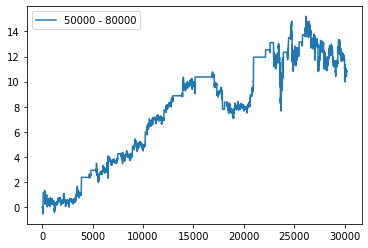

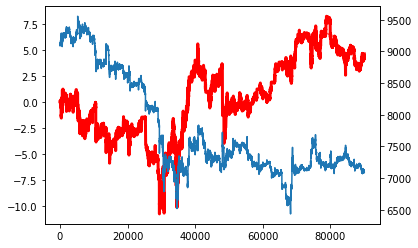

<Figure size 6000x6000 with 0 Axes>

test period= 2019-11-01 13:41:00  -  2020-01-03 01:41:00
total pl=4.6053542375,num trade=180,win rate=0.75, pl_stability=199.9095, num_buy=108, num_sell=72
strategy performance=920.6540629415064
accuracy= 0.36241111111111113
f1= 0.26145282655888497
buy/sell accuracy= 0.16018506085693174


,i,dt,action,holding_side,holding_price,holding_size,order_side,order_price,order_size,total_pl,total_fee,num_trade
0,0,2019-11-01 13:41:00,i:0 Move to next,,0.0,0.00,0,0,0.0,0.000000,0.000000,0
1,1,2019-11-01 13:42:00,i:1 Move to next,,0.0,0.00,0,0,0.0,0.000000,0.000000,0
2,2,2019-11-01 13:43:00,i:2 Move to next,,0.0,0.00,0,0,0.0,0.000000,0.000000,0
3,3,2019-11-01 13:44:00,i:3 Move to next,,0.0,0.00,0,0,0.0,0.000000,0.000000,0
4,4,2019-11-01 13:45:00,i:4 Move to next,,0.0,0.00,0,0,0.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
90500,89995,2020-01-03 01:36:00,i:89995 Move to next,sell,7109.5,0.01,0,0,0.0,4.380354,11.073047,179
90501,89996,2020-01-03 01:37:00,i:89996 Move to next,sell,7109.5,0.01,0,0,0.0,4.385354,11.073047,179
90502,89997,2020-01-03 01:38:00,i:89997 Move to next,sell,7109.5,0.01,0,0,0.0,4.385354,11.073047,179
90503,89998,2020-01-03 01:39:00,i:89998 Move to next,sell,7109.5,0.01,0,0,0.0,4.425354,11.073047,179


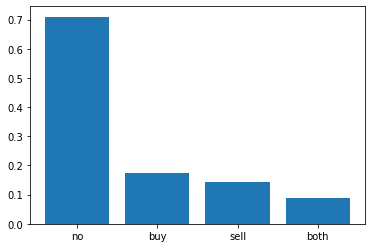

In [19]:
'''
Opt Sim Lgb
'''

import time
num_term = 1500
upper_kijun = 0.7
corr_kijun = 0.7
from_ind = 100000
to_ind = 244000
production_data_len = 0 #set 0 when testing

train_len = 50000
test_len = 90000
opt_len = 30000
test_start_ind = 50000 #should be larger than train_len
valid_size = 0.1
num_loop = 1
num_opt_trial = 3

kijun_ratio =0.0075
kijun_period = 300
pt_ratio = kijun_ratio
lc_ratio = 0.03
random_state = None
lgb_random_state = None


#params = {'objective': 'multiclass', 'num_class':4, 'learning_rate':0.1, 'boosting': 'gbdt', 'num_iterations':1000,'early_stopping_rounds':50, 'device_type':'gpu', 'metric':'multi_logloss'}

params = {'objective': 'multiclass', 'num_class':4, 'learning_rate':0.1, 'boosting': 'gbdt', 'num_iterations':1000,'early_stopping_rounds':50, 'device_type':'gpu', 'metric':'multi_logloss', 'silent':True, 
             'bagging_fraction': 0.5464994333645159, 'bagging_freq': 54, 'feature_fraction': 0.8356564342064352, 'lambda_l1': 80, 'lambda_l2': 33, 'max_bin': 198, 'max_depth': 8, 
          'min_data_in_leaf': 110, 'min_gain_to_split': 11, 'min_sum_hessian_in_leaf': 5.990205544715848, 'num_leaves': 641}

verbose_eval = 0

start = time.time()
OneMinMarketData.initialize_for_bot(num_term, from_ind, to_ind, kijun_ratio, kijun_period, production_data_len)
df = OneMinMarketData.genrate_df_from_dict()
df = OneMinMarketData.remove_cols_contains_nan2(df)
#df = OneMinMarketData.remove_all_correlated_cols4(df, corr_kijun)
df2 = OneMinMarketData.remove_price_dependent_cols2(df, corr_kijun)
print('len df2=',len(df2), df2['dt'].iloc[0], ' - ', df2['dt'].iloc[-1])

sim = Sim()
ac = SimAccount()
ac2 = SimAccount()
start_ind_log = 0
end_ind_log = 0

opt_params = {}

for i in range(num_loop):
    best_opt_params = None
    best_opt_ac = None
    current_best_performance = 9999 #assumed min optimization
    best_model = None
    for j in range(num_opt_trial):
        print('opt calc no.=',j)
        lgbmodel = LgbModel()
        #catmodel = CatboostModel()
        train_df = df2.iloc[test_start_ind - train_len + (test_len * i):(test_len * i) + test_start_ind].copy()
        test_df = df2.iloc[kijun_period + (test_len * i) + test_start_ind:kijun_period + test_start_ind + (test_len * i) + test_len].copy()
        #train_xb, test_xb, train_yb, test_yb, valid_xb, valid_yb, opt_xb, opt_yb = lgbmodel.generate_bpsp_data(train_df, test_df, valid_size, opt_len, random_state)
        train_xb, test_xb, train_yb, test_yb, valid_xb, valid_yb, opt_xb, opt_yb = lgbmodel.generate_bpsp_data2(train_df, test_df, opt_len, valid_size, random_state)

        if list(train_xb.columns) == list(test_xb.columns) == list(valid_xb.columns):
            pass
        else:
            print('train col, test col, valid col are not matched!')

        model = lgbmodel.train_params_with_validations(train_xb, train_yb, valid_xb, valid_yb, params, verbose_eval)
        print(model.best_score)
        #model = catmodel.param_train(train_xb, train_yb, cat_params)
        prediction = lgbmodel.bpsp_prediction(model, train_xb, upper_kijun)
        #prediction = lgbmodel.bpsp_prediction2(model, train_xb)
        #prediction = catmodel.predict(model, train_xb, train_yb)
        print('train accuracy={}'.format(lgbmodel.calc_bpsp_accuracy(prediction, train_yb)))

        prediction = lgbmodel.bpsp_prediction(model, valid_xb, upper_kijun)
        #prediction = lgbmodel.bpsp_prediction2(model, test_xb)
        #prediction = catmodel.predict(model, test_xb, test_yb)
        print('valid accuracy={}'.format(lgbmodel.calc_bpsp_accuracy(prediction, valid_yb)))

        optsim = OptunaSim()
        opt_params, best_ac = optsim.start_opt_sim(model, opt_xb, opt_yb, df2, pt_ratio, lc_ratio)
        print('opt trial no.', j)
        print('current opt pl=', best_ac.total_pl, ', current opt stability=', best_ac.pl_stability)
        if current_best_performance > -best_ac.total_pl * best_ac.pl_stability:
            best_opt_params = copy.copy(opt_params)
            best_opt_ac = copy.copy(best_ac)
            best_model = copy.copy(model)
            current_best_performance = copy.copy(-best_ac.total_pl * best_ac.pl_stability)

    print('opt pl=', best_opt_ac.total_pl)
    print('opt params:', opt_params)
    plt.plot(best_opt_ac.total_pl_log, label=str((test_len * i) + test_start_ind) + ' - ' + str((test_len * i) + test_start_ind + opt_len))
    plt.legend()

    if best_opt_params['pred_method'] == 0:
        prediction = lgbmodel.bpsp_prediction(best_model, test_xb, best_opt_params['upper_kijun'])
    elif best_opt_params['pred_method'] == 1:
        prediction = lgbmodel.bpsp_prediction2(best_model, test_xb)
    elif best_opt_params['pred_method'] == 2:
        prediction = lgbmodel.bpsp_prediction2_kai(best_model, test_xb)
    elif best_opt_params['pred_method'] == 3:
        prediction = lgbmodel.bpsp_prediction3(best_model, test_xb, best_opt_params['upper_kijun'])
    elif best_opt_params['pred_method'] == 4:
        prediction = lgbmodel.bpsp_prediction4(best_model, test_xb)
    print('test accuracy={}'.format(lgbmodel.calc_bpsp_accuracy(prediction, test_yb)))

    start_ind = OneMinMarketData.check_matched_dt(test_xb, df2)
    last_day = True if i == num_loop -1 else False
    if best_opt_params['avert_onemine'] == 0:
        ac = sim.sim_model_pred_onemin(start_ind, prediction, pt_ratio, lc_ratio, ac, last_day)
    else:
        ac = sim.sim_model_pred_onemin_avert(start_ind, prediction, pt_ratio, lc_ratio, ac, ac2, int(best_opt_params['avert_period_kijun']), best_opt_params['avert_val_kijun']/10000, last_day)
    print('i=',i)
    print('total pl={},num trade={},win rate={}, pl_stability={}, num_buy={}, num_sell={}'.format(ac.total_pl,ac.num_trade,ac.win_rate, ac.pl_stability, ac.num_buy,ac.num_sell))
    print('strategy performance={}'.format(ac.total_pl * ac.pl_stability))

    if i == 0:
        start_ind_log = start_ind
    else:
        end_ind_log = start_ind

if end_ind_log == 0:
    end_ind_log = start_ind_log

with open('/content/drive/My Drive/Model/bpsp_cols.csv', 'w') as file:
    writer = csv.writer(file, lineterminator='\n')
    writer.writerow(train_xb)

with open('/content/drive/My Drive/Model/lgb_bpsp_model.dat', 'wb') as f:
    pickle.dump(model, f)

config = {'num_term':num_term, 'kijun_period':kijun_period, 'pt_ratio':pt_ratio, 'lc_ratio':lc_ratio, 'pred_method':opt_params['pred_method'], 'upper_kijun':opt_params['upper_kijun'], 'avert_onemine':opt_params['avert_onemine'], 
            'avert_period_kijun':opt_params['avert_period_kijun'], 'avert_val_kijun':opt_params['avert_val_kijun']/10000.0}
pd.DataFrame(config,index=['0']).to_csv('/content/drive/My Drive/Model/bpsp_config.csv')

fig, ax1 = plt.subplots()
plt.figure(figsize=(30,30),dpi=200)
ax1.plot(ac.performance_total_pl_log,color='red',linewidth = 3.0,label='pl')
ax2 = ax1.twinx()
ax2.plot(OneMinMarketData.ohlc.close[start_ind_log:end_ind_log + test_len])
plt.show()
print('test period=', OneMinMarketData.ohlc.dt[start_ind_log], ' - ', OneMinMarketData.ohlc.dt[end_ind_log + test_len])
print('total pl={},num trade={},win rate={}, pl_stability={}, num_buy={}, num_sell={}'.format(ac.total_pl,ac.num_trade,ac.win_rate, ac.pl_stability, ac.num_buy,ac.num_sell))
print('strategy performance={}'.format(ac.total_pl * ac.pl_stability))

lgbmodel.eval_multi_score(prediction, test_yb)

ac.log_data_df


In [0]:
importance = pd.DataFrame(model.feature_importance(), index=list(train_xb.columns), columns=['importance'])
print(importance.sort_values('importance', ascending=False)[:50])
plt.plot(importance.sort_values('importance', ascending=True).values)

In [0]:
plt.plot(OneMinMarketData.ohlc.close)

normal cut data
calculating all index dict
completed non makairi diff index. time= 109.20327425003052
future_side allocation in Market Data:
no: 0.3469 buy: 0.2624 sell: 0.3007 both: 0.09
completed calc makairi diff index. time= 43.86627697944641
completed generate df from dict. time= 31.860731601715088
removed  205 cols contains nan.
completed remove cols contains nan. time= 1.7866051197052002
removing all price dependent columns..


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning:

invalid value encountered in true_divide



removed 334 colums remaining col=1989
len df2= 142199 2019-09-27 15:21:00  -  2020-01-04 09:19:00


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:148: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:153: UserWarning:

Found `early_stopping_rounds` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:842: UserWarning:

silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.



defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.5934891312728294)])})
train accuracy=0.4932
valid accuracy=0.5083
test accuracy=0.3576
i= 0
total pl=5.832604409374998,num trade=31,win rate=0.871, pl_stability=33.6266, num_buy=7, num_sell=24
strategy performance=196.13065543228933


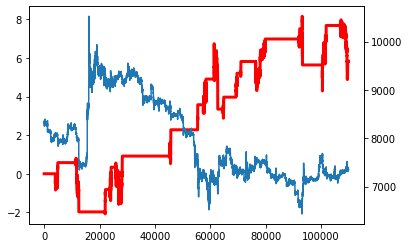

<Figure size 6000x6000 with 0 Axes>

test period= 2019-10-15 05:01:00  -  2019-12-30 14:21:00
total pl=5.832604409374998,num trade=31,win rate=0.871, pl_stability=33.6266, num_buy=7, num_sell=24
strategy performance=196.13065543228933
accuracy= 0.3576
f1= 0.1461471851989188
buy/sell accuracy= 0.01619704942121847


,i,dt,action,holding_side,holding_price,holding_size,order_side,order_price,order_size,total_pl,total_fee,num_trade
0,0,2019-10-15 05:01:00,i:0 Move to next,,0.0,0.0,0,0,0.0,0.000000,0.000000,0
1,1,2019-10-15 05:02:00,i:1 Move to next,,0.0,0.0,0,0,0.0,0.000000,0.000000,0
2,2,2019-10-15 05:03:00,i:2 Move to next,,0.0,0.0,0,0,0.0,0.000000,0.000000,0
3,3,2019-10-15 05:04:00,i:3 Move to next,,0.0,0.0,0,0,0.0,0.000000,0.000000,0
4,4,2019-10-15 05:05:00,i:4 Move to next,,0.0,0.0,0,0,0.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
110088,109995,2019-12-30 14:16:00,i:109995 Move to next,,0.0,0.0,0,0,0.0,5.832604,1.487733,31
110089,109996,2019-12-30 14:17:00,i:109996 Move to next,,0.0,0.0,0,0,0.0,5.832604,1.487733,31
110090,109997,2019-12-30 14:18:00,i:109997 Move to next,,0.0,0.0,0,0,0.0,5.832604,1.487733,31
110091,109998,2019-12-30 14:19:00,i:109998 Move to next,,0.0,0.0,0,0,0.0,5.832604,1.487733,31


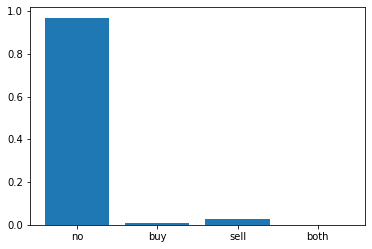

In [17]:
'''
Opt Sim Lgb non opt sim
'''


import time
num_term = 1500
upper_kijun = 0.7
corr_kijun = 0.7
from_ind = 100000
to_ind = 244000
production_data_len = 0 #set 0 when testing

train_len = 25000
test_len = 110000
opt_len = 1
test_start_ind = 25000 #should be larger than train_len
valid_size = 0.1
num_loop = 1

kijun_ratio =0.0075
kijun_period = 300
pt_ratio = kijun_ratio
lc_ratio = 0.03
random_state = None
lgb_random_state = None

avert_period_kijun = 908
avert_val_kijun = -63/10000.0

pred_method = 0
avert_onemine = 0

params = {'objective': 'multiclass', 'num_class':4, 'learning_rate':0.1, 'boosting': 'gbdt', 'num_iterations':1000,'early_stopping_rounds':50, 'device_type':'gpu', 'metric':'multi_logloss', 'silent':True, 
             'bagging_fraction': 0.5464994333645159, 'bagging_freq': 54, 'feature_fraction': 0.8356564342064352, 'lambda_l1': 80, 'lambda_l2': 33, 'max_bin': 198, 'max_depth': 8, 
          'min_data_in_leaf': 110, 'min_gain_to_split': 11, 'min_sum_hessian_in_leaf': 5.990205544715848, 'num_leaves': 641}
verbose_eval = 0

start = time.time()
OneMinMarketData.initialize_for_bot(num_term, from_ind, to_ind, kijun_ratio, kijun_period, production_data_len)
df = OneMinMarketData.genrate_df_from_dict()
df = OneMinMarketData.remove_cols_contains_nan2(df)
#df = OneMinMarketData.remove_all_correlated_cols4(df, corr_kijun)
df2 = OneMinMarketData.remove_price_dependent_cols2(df, corr_kijun)
print('len df2=',len(df2), df2['dt'].iloc[0], ' - ', df2['dt'].iloc[-1])

sim = Sim()
ac = SimAccount()
ac2 = SimAccount()
start_ind_log = 0
end_ind_log = 0

for i in range(num_loop):
    lgbmodel = LgbModel()
    #catmodel = CatboostModel()
    train_df = df2.iloc[test_start_ind - train_len + (test_len * i):(test_len * i) + test_start_ind].copy()
    test_df = df2.iloc[kijun_period + (test_len * i) + test_start_ind:kijun_period + test_start_ind + (test_len * i) + test_len].copy()
    #train_xb, test_xb, train_yb, test_yb, valid_xb, valid_yb, opt_xb, opt_yb = lgbmodel.generate_bpsp_data(train_df, test_df, valid_size, opt_len, random_state)
    train_xb, test_xb, train_yb, test_yb, valid_xb, valid_yb, opt_xb, opt_yb = lgbmodel.generate_bpsp_data2(train_df, test_df, opt_len, valid_size, random_state)

    if list(train_xb.columns) == list(test_xb.columns) == list(valid_xb.columns):
        pass
    else:
        print('train col, test col, valid col are not matched!')

    model = lgbmodel.train_params_with_validations(train_xb, train_yb, valid_xb, valid_yb, params, verbose_eval)
    print(model.best_score)

    prediction = lgbmodel.bpsp_prediction(model, train_xb, upper_kijun)
    #prediction = lgbmodel.bpsp_prediction4(model, test_xb)
    print('train accuracy={}'.format(lgbmodel.calc_bpsp_accuracy(prediction, train_yb)))

    prediction = lgbmodel.bpsp_prediction(model, valid_xb, upper_kijun)
    #prediction = lgbmodel.bpsp_prediction4(model, test_xb)
    print('valid accuracy={}'.format(lgbmodel.calc_bpsp_accuracy(prediction, valid_yb)))

    if pred_method == 0:
        prediction = lgbmodel.bpsp_prediction(model, test_xb, upper_kijun)
    elif pred_method == 1:
        prediction = lgbmodel.bpsp_prediction2(model, test_xb)
    elif pred_method == 2:
        prediction = lgbmodel.bpsp_prediction2_kai(model, test_xb)
    elif pred_method == 3:
        prediction = lgbmodel.bpsp_prediction3(model, test_xb, upper_kijun)
    elif pred_method == 4:
        prediction = lgbmodel.bpsp_prediction4(model, test_xb)
    else:
        print('invalid pred method!', params['pred_method'])
    print('test accuracy={}'.format(lgbmodel.calc_bpsp_accuracy(prediction, test_yb)))

    start_ind = OneMinMarketData.check_matched_dt(test_xb, df2)
    last_day = True if i == num_loop -1 else False
    #ac = sim.sim_model_pred_onemin_avert(start_ind, prediction, pt_ratio, lc_ratio, ac, ac2, avert_period_kijun, avert_val_kijun, last_day)
    if avert_onemine == 0:
        ac = sim.sim_model_pred_onemin(start_ind, prediction, pt_ratio, lc_ratio, ac, last_day)
    elif avert_onemine == 1:
        ac = sim.sim_model_pred_onemin_avert(start_ind, prediction, pt_ratio, lc_ratio, ac, ac2, avert_period_kijun, avert_val_kijun, last_day)
    print('i=',i)
    print('total pl={},num trade={},win rate={}, pl_stability={}, num_buy={}, num_sell={}'.format(ac.total_pl,ac.num_trade,ac.win_rate, ac.pl_stability, ac.num_buy,ac.num_sell))
    print('strategy performance={}'.format(ac.total_pl * ac.pl_stability))

    if i == 0:
        start_ind_log = start_ind
    else:
        end_ind_log = start_ind

if end_ind_log == 0:
    end_ind_log = start_ind_log

with open('/content/drive/My Drive/Model/bpsp_cols.csv', 'w') as file:
    writer = csv.writer(file, lineterminator='\n')
    writer.writerow(train_xb)

with open('/content/drive/My Drive/Model/lgb_bpsp_model.dat', 'wb') as f:
    pickle.dump(model, f)

fig, ax1 = plt.subplots()
plt.figure(figsize=(30,30),dpi=200)
ax1.plot(ac.performance_total_pl_log,color='red',linewidth = 3.0,label='pl')
ax2 = ax1.twinx()
ax2.plot(OneMinMarketData.ohlc.close[start_ind_log:end_ind_log + test_len])
plt.show()
print('test period=', OneMinMarketData.ohlc.dt[start_ind_log], ' - ', OneMinMarketData.ohlc.dt[end_ind_log + test_len])
print('total pl={},num trade={},win rate={}, pl_stability={}, num_buy={}, num_sell={}'.format(ac.total_pl,ac.num_trade,ac.win_rate, ac.pl_stability, ac.num_buy,ac.num_sell))
print('strategy performance={}'.format(ac.total_pl * ac.pl_stability))

lgbmodel.eval_multi_score(prediction, test_yb)

ac.log_data_df


In [0]:
    '''
Opt Sim Xgb
'''


import time
num_term = 1500
upper_kijun = 0.7
corr_kijun = 0.7
from_ind = 100000
to_ind = 244000
production_data_len = 0 #set 0 when testing

train_len = 55000
test_len = 2000
opt_len = 4000
test_start_ind = 85000 #should be larger than train_len
valid_size = 0.1
num_loop = 5
num_opt_trial = 1

kijun_ratio =0.0075
kijun_period = 300
pt_ratio = kijun_ratio
lc_ratio = 0.03
random_state = None
lgb_random_state = None

params = {'objective': 'multi:softmax', 'num_class':4, 'eval_metric':'mlogloss', 'booster': 'gbtree', 'learning_rate': 0.1, 'num_iterations': 1000,
          'verbosity':0, 'verbose_eval': False, 'tree_method':'gpu_hist'}

start = time.time()
OneMinMarketData.initialize_for_bot(num_term, from_ind, to_ind, kijun_ratio, kijun_period, production_data_len)
df = OneMinMarketData.genrate_df_from_dict()
df = OneMinMarketData.remove_cols_contains_nan2(df)
#df = OneMinMarketData.remove_all_correlated_cols4(df, corr_kijun)
df2 = OneMinMarketData.remove_price_dependent_cols2(df, corr_kijun)
print('len df2=',len(df2), df2['dt'].iloc[0], ' - ', df2['dt'].iloc[-1])

sim = Sim()
ac = SimAccount()
ac2 = SimAccount()
start_ind_log = 0
end_ind_log = 0

opt_params = {}

for i in range(num_loop):
    best_opt_params = None
    best_opt_ac = None
    current_best_performance = 9999 #assumed min optimization
    best_model = None
    for j in range(num_opt_trial):
        print('opt calc no.=',j)
        lgbmodel = LgbModel()
        xgbmodel = XgbModel()
        train_df = df2.iloc[test_start_ind - train_len + (test_len * i):(test_len * i) + test_start_ind].copy()
        test_df = df2.iloc[kijun_period + (test_len * i) + test_start_ind:kijun_period + test_start_ind + (test_len * i) + test_len].copy()
        #train_xb, test_xb, train_yb, test_yb, valid_xb, valid_yb, opt_xb, opt_yb = lgbmodel.generate_bpsp_data(train_df, test_df, valid_size, opt_len, random_state)
        train_xb, test_xb, train_yb, test_yb, valid_xb, valid_yb, opt_xb, opt_yb = lgbmodel.generate_bpsp_data2(train_df, test_df, opt_len, valid_size, random_state)

        if list(train_xb.columns) == list(test_xb.columns) == list(valid_xb.columns):
            pass
        else:
            print('train col, test col, valid col are not matched!')

        #model = lgbmodel.train_params_with_validations(train_xb, train_yb, valid_xb, valid_yb, params, verbose_eval)
        model = xgbmodel.train_valid_with_params(train_xb, train_yb, valid_xb, valid_yb, params)
        print('best_score=', model.best_score)
        #model = catmodel.param_train(train_xb, train_yb, cat_params)
        prediction = xgbmodel.bpsp_prediction(model, train_xb, train_yb)
        #prediction = lgbmodel.bpsp_prediction2(model, train_xb)
        #prediction = catmodel.predict(model, train_xb, train_yb)
        print('train accuracy={}'.format(lgbmodel.calc_bpsp_accuracy(prediction, train_yb)))

        prediction = xgbmodel.bpsp_prediction(model, valid_xb, valid_yb)
        #prediction = lgbmodel.bpsp_prediction2(model, test_xb)
        #prediction = catmodel.predict(model, test_xb, test_yb)
        print('valid accuracy={}'.format(lgbmodel.calc_bpsp_accuracy(prediction, valid_yb)))

        optsim = OptunaSimXgb()
        opt_params, best_ac = optsim.start_opt_sim(model, opt_xb, opt_yb, df2, pt_ratio, lc_ratio)
        if current_best_performance > -best_ac.total_pl * best_ac.pl_stability:
            best_opt_params = copy.copy(opt_params)
            best_opt_ac = copy.copy(best_ac)
            best_model = copy.copy(model)

    print('opt pl=', best_opt_ac.total_pl)
    print('opt params:', opt_params)
    plt.plot(best_opt_ac.total_pl_log, label=str((test_len * i) + test_start_ind) + ' - ' + str((test_len * i) + test_start_ind + opt_len))
    plt.legend()

    prediction = xgbmodel.bpsp_prediction(best_model, test_xb, test_yb)
    print('test accuracy={}'.format(lgbmodel.calc_bpsp_accuracy(prediction, test_yb)))

    start_ind = OneMinMarketData.check_matched_dt(test_xb, df2)
    last_day = True if i == num_loop -1 else False
    if best_opt_params['avert_onemine'] == 0:
        ac = sim.sim_model_pred_onemin(start_ind, prediction, pt_ratio, lc_ratio, ac, last_day)
    else:
        ac = sim.sim_model_pred_onemin_avert(start_ind, prediction, pt_ratio, lc_ratio, ac, ac2, int(best_opt_params['avert_period_kijun']), best_opt_params['avert_val_kijun']/10000, last_day)
    print('i=',i)
    print('total pl={},num trade={},win rate={}, pl_stability={}, num_buy={}, num_sell={}'.format(ac.total_pl,ac.num_trade,ac.win_rate, ac.pl_stability, ac.num_buy,ac.num_sell))
    print('strategy performance={}'.format(ac.total_pl * ac.pl_stability))

    if i == 0:
        start_ind_log = start_ind
    else:
        end_ind_log = start_ind

if end_ind_log == 0:
    end_ind_log = start_ind_log

with open('/content/drive/My Drive/Model/bpsp_cols.csv', 'w') as file:
    writer = csv.writer(file, lineterminator='\n')
    writer.writerow(train_xb)

with open('/content/drive/My Drive/Model/lgb_bpsp_model.dat', 'wb') as f:
    pickle.dump(model, f)

config = {'num_term':num_term, 'kijun_period':kijun_period, 'pt_ratio':pt_ratio, 'lc_ratio':lc_ratio, 'pred_method':opt_params['pred_method'], 'upper_kijun':opt_params['upper_kijun']/100.0, 'avert_onemine':opt_params['avert_onemine'], 
            'avert_period_kijun':opt_params['avert_period_kijun'], 'avert_val_kijun':opt_params['avert_val_kijun']/10000}
pd.DataFrame(config,index=['0']).to_csv('/content/drive/My Drive/Model/bpsp_config.csv')

fig, ax1 = plt.subplots()
plt.figure(figsize=(30,30),dpi=200)
ax1.plot(ac.performance_total_pl_log,color='red',linewidth = 3.0,label='pl')
ax2 = ax1.twinx()
ax2.plot(OneMinMarketData.ohlc.close[start_ind_log:end_ind_log + test_len])
plt.show()
print('test period=', OneMinMarketData.ohlc.dt[start_ind_log], ' - ', OneMinMarketData.ohlc.dt[end_ind_log + test_len])
print('total pl={},num trade={},win rate={}, pl_stability={}, num_buy={}, num_sell={}'.format(ac.total_pl,ac.num_trade,ac.win_rate, ac.pl_stability, ac.num_buy,ac.num_sell))
print('strategy performance={}'.format(ac.total_pl * ac.pl_stability))


ac.log_data_df


normal cut data
calculating all index dict
completed non makairi diff index. time= 116.69953727722168
future_side allocation in Market Data:
no: 0.5066 buy: 0.1963 sell: 0.2506 both: 0.0466
completed calc makairi diff index. time= 33.39101696014404
completed generate df from dict. time= 29.429059982299805
removed  205 cols contains nan.
completed remove cols contains nan. time= 2.188913106918335
removing all price dependent columns..


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning:

invalid value encountered in true_divide



removed 334 colums remaining col=1989
len df2= 142199 2019-09-19 16:21:00  -  2019-12-27 10:19:00


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:148: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:153: UserWarning:

Found `early_stopping_rounds` in params. Will use it instead of argument



train accuracy=1.0
valid accuracy=0.9992
opt pl= 2.2428548875
opt params: {'avert_onemine': 1, 'upper_kijun': 0.8, 'avert_period_kijun': 984, 'avert_val_kijun': 68, 'pred_method': 1}
test accuracy=0.4438
i= 0
total pl=-0.10666375,num trade=1,win rate=1.0, pl_stability=0, num_buy=1, num_sell=1
strategy performance=-0.0
train accuracy=0.9864
valid accuracy=0.9845
opt pl= 1.9708941125000004
opt params: {'avert_onemine': 1, 'upper_kijun': 0.6, 'avert_period_kijun': 993, 'avert_val_kijun': 493, 'pred_method': 0}
test accuracy=0.2188
i= 1
total pl=-0.10666375,num trade=1,win rate=1.0, pl_stability=0, num_buy=1, num_sell=1
strategy performance=-0.0
train accuracy=0.8625
valid accuracy=0.854


KeyboardInterrupt: ignored

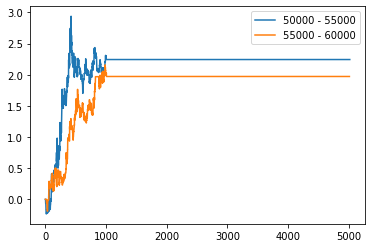

In [15]:
'''
Opt Sim Refit Lgb
'''

import time
num_term = 1500
upper_kijun = 0.7
corr_kijun = 0.7
from_ind = 100000
to_ind = 244000
production_data_len = 0 #set 0 when testing

train_len = 25000
test_len = 5000
opt_len = 5000
test_start_ind = 50000 #should be larger than train_len
valid_size = 0.1
num_loop = 17

kijun_ratio =0.01
kijun_period = 300
pt_ratio = kijun_ratio
lc_ratio = 0.01
random_state = None
lgb_random_state = None

params = {'objective': 'multiclass', 'num_class':4, 'learning_rate':0.1, 'boosting': 'gbdt', 'num_iterations':1000,'early_stopping_rounds':50, 'device_type':'gpu', 'metric':'multi_logloss'}

verbose_eval = 0

start = time.time()
OneMinMarketData.initialize_for_bot(num_term, from_ind, to_ind, kijun_ratio, kijun_period, production_data_len)
df = OneMinMarketData.genrate_df_from_dict()
df = OneMinMarketData.remove_cols_contains_nan2(df)
#df = OneMinMarketData.remove_all_correlated_cols4(df, corr_kijun)
df2 = OneMinMarketData.remove_price_dependent_cols2(df, corr_kijun)
print('len df2=',len(df2), df2['dt'].iloc[0], ' - ', df2['dt'].iloc[-1])

sim = Sim()
ac = SimAccount()
ac2 = SimAccount()
start_ind_log = 0
end_ind_log = 0

opt_params = {}
refit_model = None
for i in range(num_loop):
    best_opt_params = None
    best_opt_ac = None
    current_best_performance = 9999 #assumed min optimization
    
    lgbmodel = LgbModel()
    train_df = df2.iloc[test_start_ind - train_len + (test_len * i):(test_len * i) + test_start_ind].copy()
    test_df = df2.iloc[kijun_period + (test_len * i) + test_start_ind:kijun_period + test_start_ind + (test_len * i) + test_len].copy()
    #train_xb, test_xb, train_yb, test_yb, valid_xb, valid_yb, opt_xb, opt_yb = lgbmodel.generate_bpsp_data(train_df, test_df, valid_size, opt_len, random_state)
    train_xb, test_xb, train_yb, test_yb, valid_xb, valid_yb, opt_xb, opt_yb = lgbmodel.generate_bpsp_data2(train_df, test_df, opt_len, valid_size, random_state)

    if list(train_xb.columns) == list(test_xb.columns) == list(valid_xb.columns):
        pass
    else:
        print('train col, test col, valid col are not matched!')

    if i == 0:
        refit_model = lgbmodel.train_params_with_validations(train_xb, train_yb, valid_xb, valid_yb, params, verbose_eval)
    else:
        refit_model = lgbmodel.train_refit(refit_model, train_xb, train_yb, 0.1)
    #model = catmodel.param_train(train_xb, train_yb, cat_params)
    prediction = lgbmodel.bpsp_prediction(refit_model, train_xb, upper_kijun)
    #prediction = lgbmodel.bpsp_prediction2(model, train_xb)
    #prediction = catmodel.predict(model, train_xb, train_yb)
    print('train accuracy={}'.format(lgbmodel.calc_bpsp_accuracy(prediction, train_yb)))

    prediction = lgbmodel.bpsp_prediction(refit_model, valid_xb, upper_kijun)
    #prediction = lgbmodel.bpsp_prediction2(model, test_xb)
    #prediction = catmodel.predict(model, test_xb, test_yb)
    print('valid accuracy={}'.format(lgbmodel.calc_bpsp_accuracy(prediction, valid_yb)))

    optsim = OptunaSim()
    opt_params, best_ac = optsim.start_opt_sim(refit_model, opt_xb, opt_yb, df2, pt_ratio, lc_ratio)

    print('opt pl=', best_ac.total_pl)
    print('opt params:', opt_params)
    plt.plot(best_ac.total_pl_log, label=str((test_len * i) + test_start_ind) + ' - ' + str((test_len * i) + test_start_ind + opt_len))
    plt.legend()

    if opt_params['pred_method'] == 0:
        prediction = lgbmodel.bpsp_prediction(refit_model, test_xb, opt_params['upper_kijun'])
    elif opt_params['pred_method'] == 1:
        prediction = lgbmodel.bpsp_prediction2(refit_model, test_xb)
    elif opt_params['pred_method'] == 2:
        prediction = lgbmodel.bpsp_prediction2_kai(refit_model, test_xb)
    elif opt_params['pred_method'] == 3:
        prediction = lgbmodel.bpsp_prediction3(refit_model, test_xb, opt_params['upper_kijun'])
    elif opt_params['pred_method'] == 4:
        prediction = lgbmodel.bpsp_prediction4(refit_model, test_xb)
    print('test accuracy={}'.format(lgbmodel.calc_bpsp_accuracy(prediction, test_yb)))

    start_ind = OneMinMarketData.check_matched_dt(test_xb, df2)
    last_day = True if i == num_loop -1 else False
    if opt_params['avert_onemine'] == 0:
        ac = sim.sim_model_pred_onemin(start_ind, prediction, pt_ratio, lc_ratio, ac, last_day)
    else:
        ac = sim.sim_model_pred_onemin_avert(start_ind, prediction, pt_ratio, lc_ratio, ac, ac2, int(opt_params['avert_period_kijun']), opt_params['avert_val_kijun']/10000, last_day)
    print('i=',i)
    print('total pl={},num trade={},win rate={}, pl_stability={}, num_buy={}, num_sell={}'.format(ac.total_pl,ac.num_trade,ac.win_rate, ac.pl_stability, ac.num_buy,ac.num_sell))
    print('strategy performance={}'.format(ac.total_pl * ac.pl_stability))

    if i == 0:
        start_ind_log = start_ind
    else:
        end_ind_log = start_ind

if end_ind_log == 0:
    end_ind_log = start_ind_log

with open('/content/drive/My Drive/Model/bpsp_cols.csv', 'w') as file:
    writer = csv.writer(file, lineterminator='\n')
    writer.writerow(train_xb)

with open('/content/drive/My Drive/Model/lgb_bpsp_model.dat', 'wb') as f:
    pickle.dump(model, f)

config = {'num_term':num_term, 'kijun_period':kijun_period, 'pt_ratio':pt_ratio, 'lc_ratio':lc_ratio, 'pred_method':opt_params['pred_method'], 'upper_kijun':opt_params['upper_kijun'], 'avert_onemine':opt_params['avert_onemine'], 
            'avert_period_kijun':opt_params['avert_period_kijun'], 'avert_val_kijun':opt_params['avert_val_kijun']/10000.0}
pd.DataFrame(config,index=['0']).to_csv('/content/drive/My Drive/Model/bpsp_config.csv')

fig, ax1 = plt.subplots()
plt.figure(figsize=(30,30),dpi=200)
ax1.plot(ac.performance_total_pl_log,color='red',linewidth = 3.0,label='pl')
ax2 = ax1.twinx()
ax2.plot(OneMinMarketData.ohlc.close[start_ind_log:end_ind_log + test_len])
plt.show()
print('test period=', OneMinMarketData.ohlc.dt[start_ind_log], ' - ', OneMinMarketData.ohlc.dt[end_ind_log + test_len])
print('total pl={},num trade={},win rate={}, pl_stability={}, num_buy={}, num_sell={}'.format(ac.total_pl,ac.num_trade,ac.win_rate, ac.pl_stability, ac.num_buy,ac.num_sell))
print('strategy performance={}'.format(ac.total_pl * ac.pl_stability))

lgbmodel.eval_multi_score(prediction, test_yb)

ac.log_data_df


In [0]:
    dir(model.booster)

In [0]:
dtest = xgb.DMatrix(test_xb, label=test_yb)
pred = model.predict(dtest, output_margin=True)

In [0]:
for p in pred:
    print(p)

In [0]:
for op in opt_ac_list:
    print(op.total_pl)

In [0]:
prediction = lgbmodel.bpsp_prediction(model, opt_xb,0.7)

In [0]:
best_opt_ac.pl_stability

0.8336

In [0]:
best_opt_ac.total_pl

0.718735759375

In [0]:
'''
train data長いほうがいい
corr removeしないほうがいい
num_termは適切なものがある。（少なすぎても多すぎてもだめ）
train / valid split (?)に大きく影響される。lgb seedはnoneでも結果は変わらない。
valid sizeを極端に小さくしたら（１）結果の変動は小さくなる。
train dataのindex orderにも影響され、index orderがdecending / ascendingの場合は学習が失敗して取引がなされない。
'''